In [3777]:
import pandas as pd
import numpy as np
from scipy.stats import entropy
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

In [3778]:
concept_drift = []

In [3779]:
import warnings
warnings.filterwarnings('ignore')

an_df = pd.DataFrame( {
    "Coordinates": {},
    "Cluster Index": {},
    "Chunk1":{}
})

#data selected as first window
data = pd.read_excel('data2colsD.xlsx',header=None).values
# Number of clusters
num_clusters = 6
gmm = GaussianMixture(n_components=num_clusters, random_state=42)
gmm.fit(data)
cluster_assignments = gmm.predict(data)
#cluster_asasignments

#Calculate covariance matrices
covariance_matrices = gmm.covariances_
# Calculate the number of points in each cluster
cluster_counts = np.bincount(cluster_assignments)
print(cluster_counts)
print(sum(cluster_counts))

# Calculate the entropy of each cluster
cluster_entropies = []
cluster_centers = []


from scipy.stats import multivariate_normal

cluster_entropies = []


for cluster_idx in range(num_clusters):
    cluster_data = data[cluster_assignments == cluster_idx]
    cluster_centers.append(gmm.means_[cluster_idx])
    # Calculate the determinant of the covariance matrix
    covariance_det = np.linalg.det(covariance_matrices[cluster_idx])
    # Calculate the entropy
    entropy = 0.5 *(len(covariance_matrices[cluster_idx])) * np.log2(2 * np.pi * np.exp(1)) + np.log2(abs(covariance_det))
    cluster_entropies.append(entropy)
cluster_centers = np.asarray(cluster_centers)
cluster_entropies = np.asarray(cluster_entropies)

[804 808 501 301 302 506]
3222


In [3780]:
cluster_data = data[cluster_assignments == 0]

In [3781]:
cluster_data

array([[ 3.47260476, 23.40138507],
       [ 6.0990481 , 25.43129536],
       [ 4.25072476, 23.80758082],
       ...,
       [ 4.1       , 26.        ],
       [ 4.9       , 24.        ],
       [ 1.        , 22.6       ]])

In [3782]:
import scipy.io
scipy.io.savemat('my_array.mat', {'arr': cluster_data})

[[3.93437722 3.70222034]
 [3.70222034 3.86433049]]
[2.75712529 0.44381061]


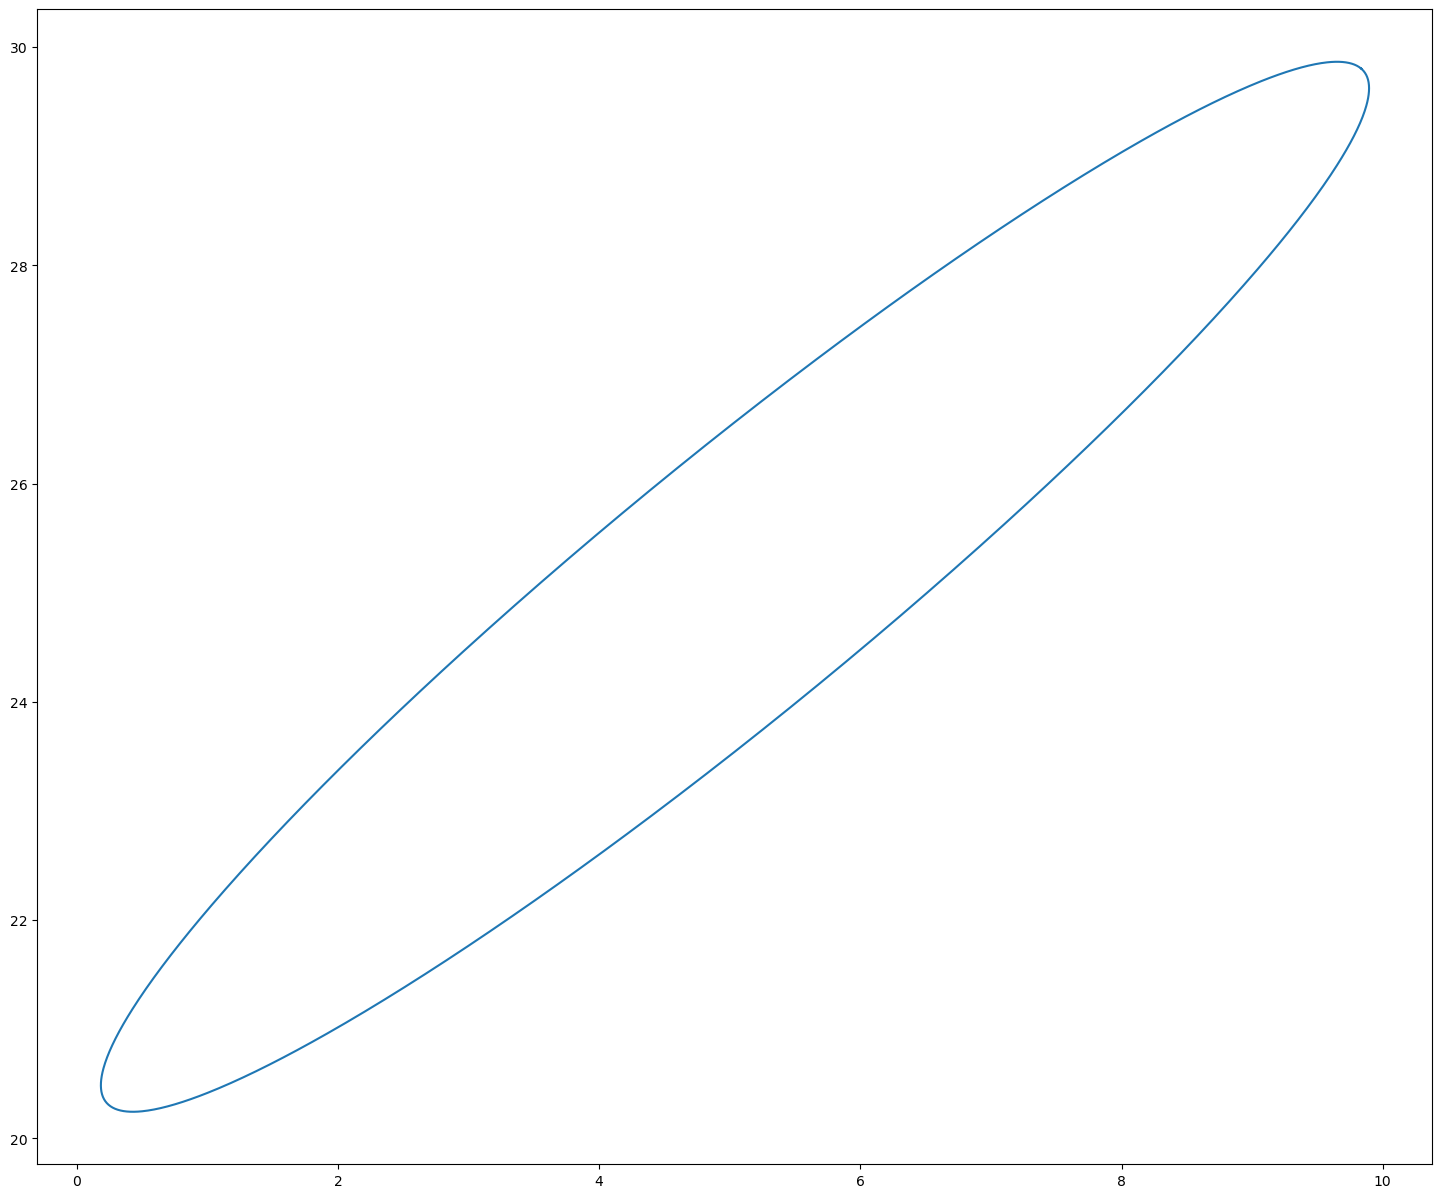

In [3783]:
center = cluster_centers[0][:, None]
cov = covariance_matrices[0]
val, rot = np.linalg.eig(cov)
val = np.sqrt(val)
center = cluster_centers[0][:, None]
#plt.scatter(center[0], center[1], c='red', marker='X', label='Center')
t = np.linspace(0, 2.0 * np.pi, 1000)
xy = np.stack((np.cos(t), np.sin(t)), axis=-1)
scaling_factor = np.sqrt(5.991)  # For a 2D ellipse and 95% confidence
plt.plot(*(rot @ (scaling_factor* val * xy).T + center))
#     plt.annotate(degrees(np.arctan2(rot[1, 0], rot[0, 0])), xy=center)
print(cov)
print(val)
#plt.annotate(0, xy=center)

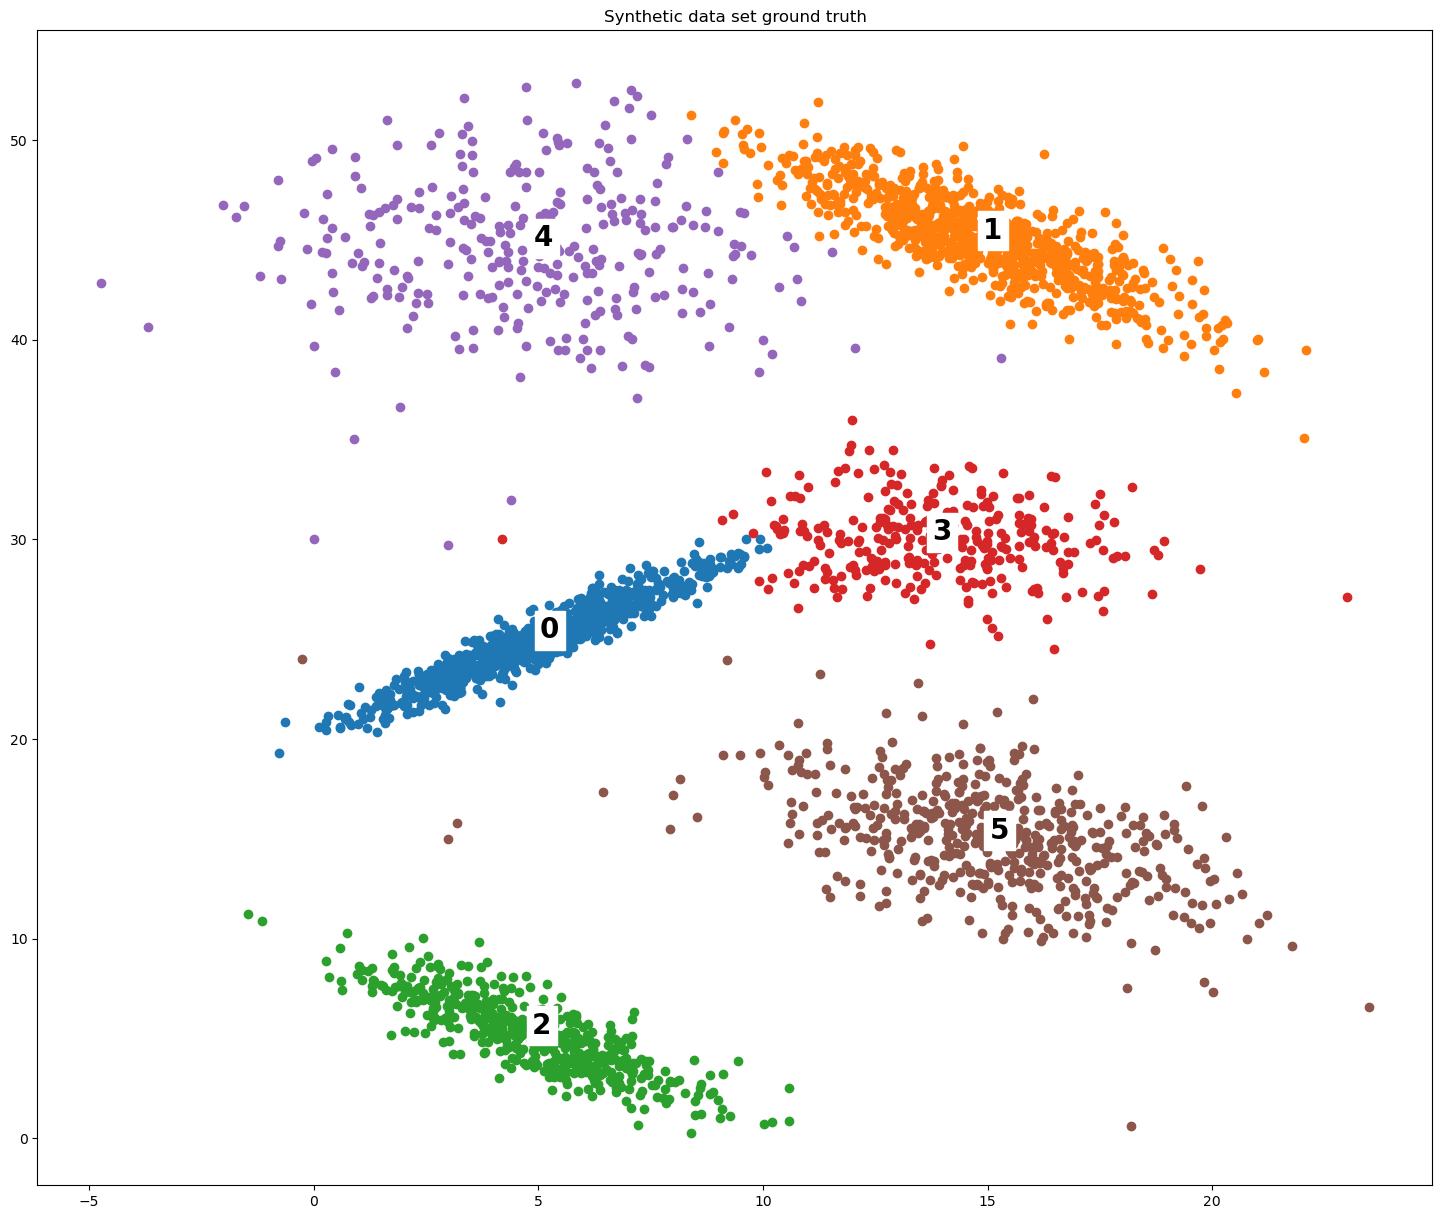

In [3784]:
# ploting ellipse function
plt.rcParams["figure.figsize"] = (18,15)

for i in range(num_clusters):
    cluster_data = data[cluster_assignments == i]
    
    # Plot the cluster's data points #, c=[cmap(cluster_label)]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1])
                
    cov = covariance_matrices[i]
    val, rot = np.linalg.eig(cov)
    val = np.sqrt(val)
    center = cluster_centers[i][:, None]
    #plt.scatter(center[0], center[1], c='red', marker='X', label='Center')
    t = np.linspace(0, 2.0 * np.pi, 1000)
    xy = np.stack((np.cos(t), np.sin(t)), axis=-1)
    scaling_factor = np.sqrt(5.991)  # For a 2D ellipse and 95% confidence
    #plt.plot(*(rot @ (scaling_factor* val * xy).T + center))
#     plt.annotate(degrees(np.arctan2(rot[1, 0], rot[0, 0])), xy=center)
    plt.annotate(i, xy=center,size=20, weight='bold',backgroundcolor='#FFFFFF')
    plt.title("Synthetic data set ground truth")
plt.savefig('Alldataclusters0.png',bbox_inches='tight')

In [3785]:
true_cluster_counts = cluster_counts

In [3786]:
true_labels = cluster_assignments

In [3787]:
len(cluster_assignments)

3222

def split_dataframe_into_chunks(df, chunk_size):
    # Calculate the total number of chunks required
    total_chunks = len(df) // chunk_size + (1 if len(df) % chunk_size > 0 else 0)

    # Create an empty list to store the resulting DataFrames
    df_list = []
    df = df.sample(frac=1)
    # Split the DataFrame into chunks and append them to the list
    for i in range(total_chunks):
        start_idx = i * chunk_size
        end_idx = (i + 1) * chunk_size
        df_chunk = df.iloc[start_idx:end_idx]
        df_list.append(df_chunk)

    return df_list

In [3789]:
len(data)

3222

dataframe = pd.read_excel('data2colsD.xlsx',header=None)
dataframe = dataframe.sample(frac=1,random_state=42)

3222/179

In [3792]:
# total_chunks=18
# chunk_size = 179
# df_list=[]
# for i in range(total_chunks):
#     start_idx = i * chunk_size
#     end_idx = (i + 1) * chunk_size
#     df_chunk = dataframe.iloc[start_idx:end_idx]
#     df_list.append(df_chunk)

def create_random_samples(df, n, sample_size):
    samples = []
    for i in range(n):
        sample_df = df.sample(n=sample_size, replace=False, random_state=None)
        samples.append(sample_df)
    return samples

dataframe = pd.read_excel('data2colsD.xlsx',header=None)
data_stream = create_random_samples(dataframe,total_chunks,chunk_size)
for i in range(total_chunks):
    data_stream[i].to_csv(f'data_stream{i}.csv', header=False,index=False)

# First  data chunk

In [3796]:
import pandas as pd
import numpy as np
from scipy.stats import entropy
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

an_df = pd.DataFrame( {
    "Coordinates": { },
    "Cluster Index": {},
    "Chunk1" :{ }
})

#data selected as first window
data = pd.read_csv('data_stream0.csv',header=None).values
# Number of clusters
num_clusters = 8
gmm = GaussianMixture(n_components=num_clusters, random_state=42)
gmm.fit(data)
cluster_assignments = gmm.predict(data)
#cluster_asasignments

#Calculate covariance matrices
covariance_matrices = gmm.covariances_
# Calculate the number of points in each cluster
cluster_counts = np.bincount(cluster_assignments)
print(cluster_counts)
concept_drift.append(cluster_counts.tolist())
print(sum(cluster_counts))

# Calculate the entropy of each cluster
cluster_entropies = []
cluster_centers = []


from scipy.stats import multivariate_normal

cluster_entropies = []


for cluster_idx in range(num_clusters):
    cluster_data = data[cluster_assignments == cluster_idx]
    cluster_centers.append(gmm.means_[cluster_idx])
    # Calculate the determinant of the covariance matrix
    covariance_det = np.linalg.det(covariance_matrices[cluster_idx])
    # Calculate the entropy
    entropy = 0.5 *(len(covariance_matrices[cluster_idx])) * np.log2(2 * np.pi * np.exp(1)) + np.log2(abs(covariance_det))
    cluster_entropies.append(entropy)
cluster_centers = np.asarray(cluster_centers)
cluster_entropies = np.asarray(cluster_entropies)

[20 29 41  7 42 22 16  2]
179


In [3797]:
len(cluster_assignments)

179

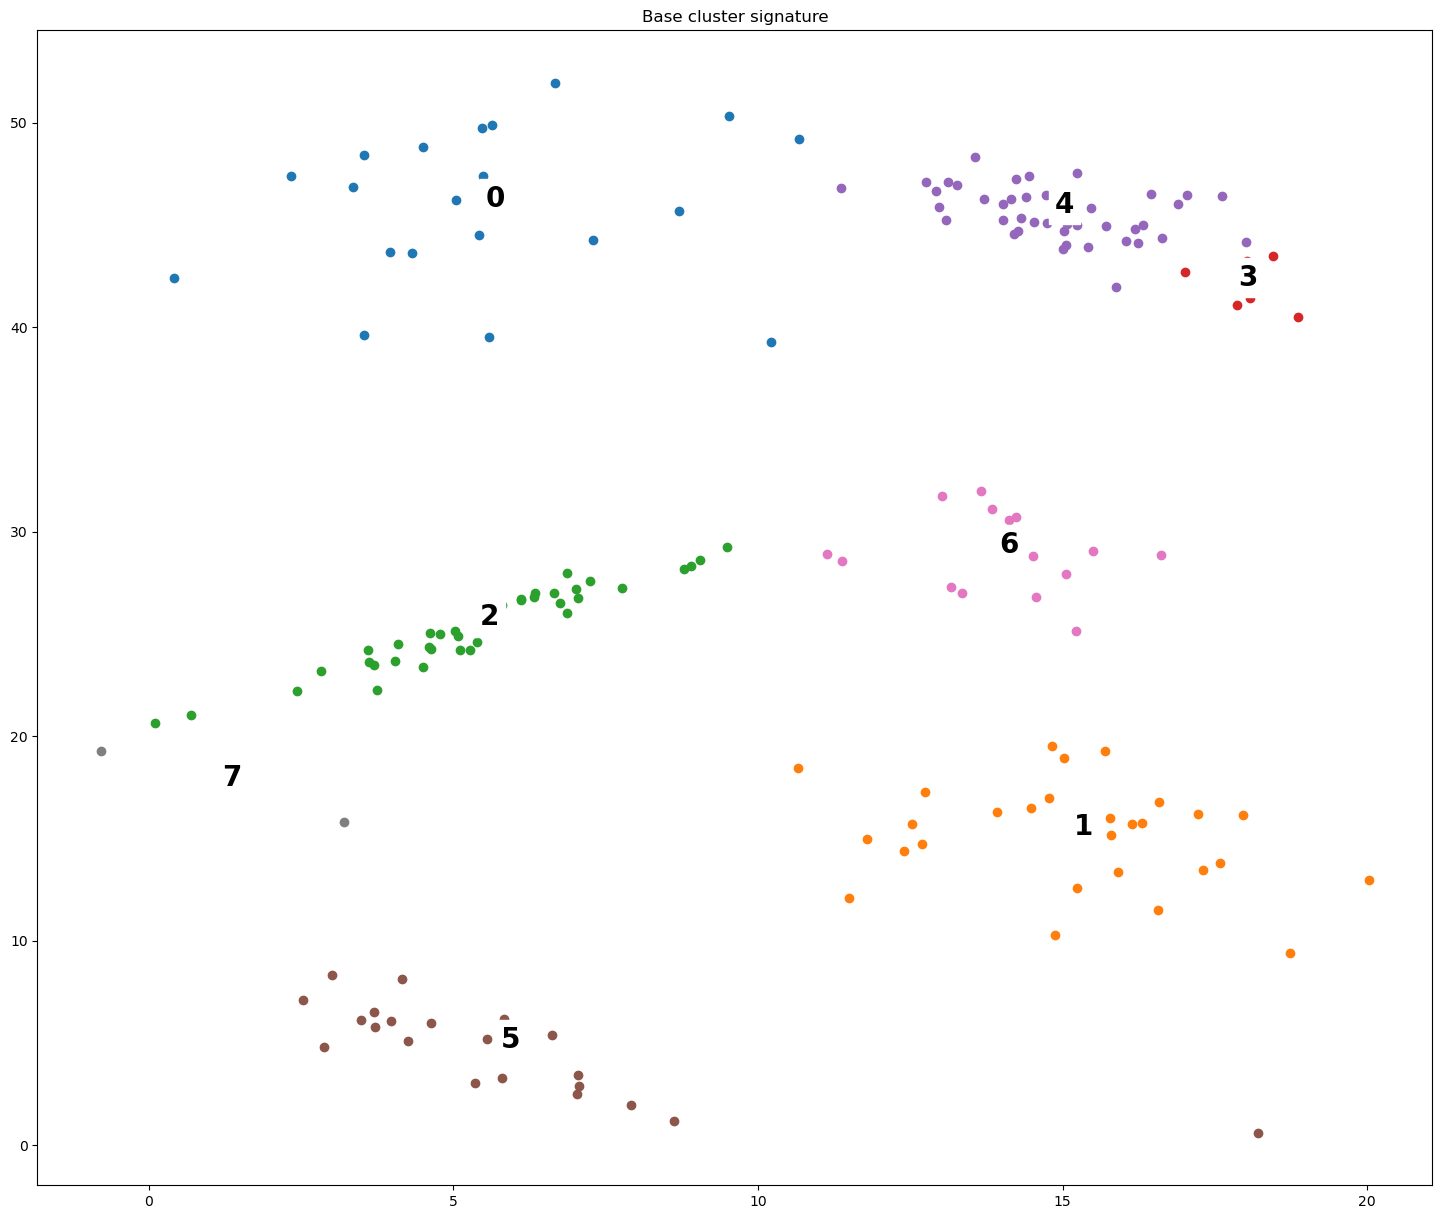

In [3798]:
plt.rcParams["figure.figsize"] = (18,15)

for i in range(num_clusters):
    cluster_data = data[cluster_assignments == i]
    
    # Plot the cluster's data points #, c=[cmap(cluster_label)]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1])
                
    cov = covariance_matrices[i]
    val, rot = np.linalg.eig(cov)
    val = np.sqrt(val)
    center = cluster_centers[i][:, None]
    plt.scatter(center[0], center[1], c='green', marker='*', label='Center')
    t = np.linspace(0, 2.0 * np.pi, 1000)
    xy = np.stack((np.cos(t), np.sin(t)), axis=-1)
    scaling_factor = np.sqrt(5.991)  # For a 2D ellipse and 95% confidence
    # plt.plot(*(rot @ (scaling_factor* val * xy).T + center))
    plt.annotate(i, xy=center,size=20, weight='bold',backgroundcolor='#FFFFFF')
    plt.title("Base cluster signature")
plt.savefig('Alldataclusters0.png',bbox_inches='tight')

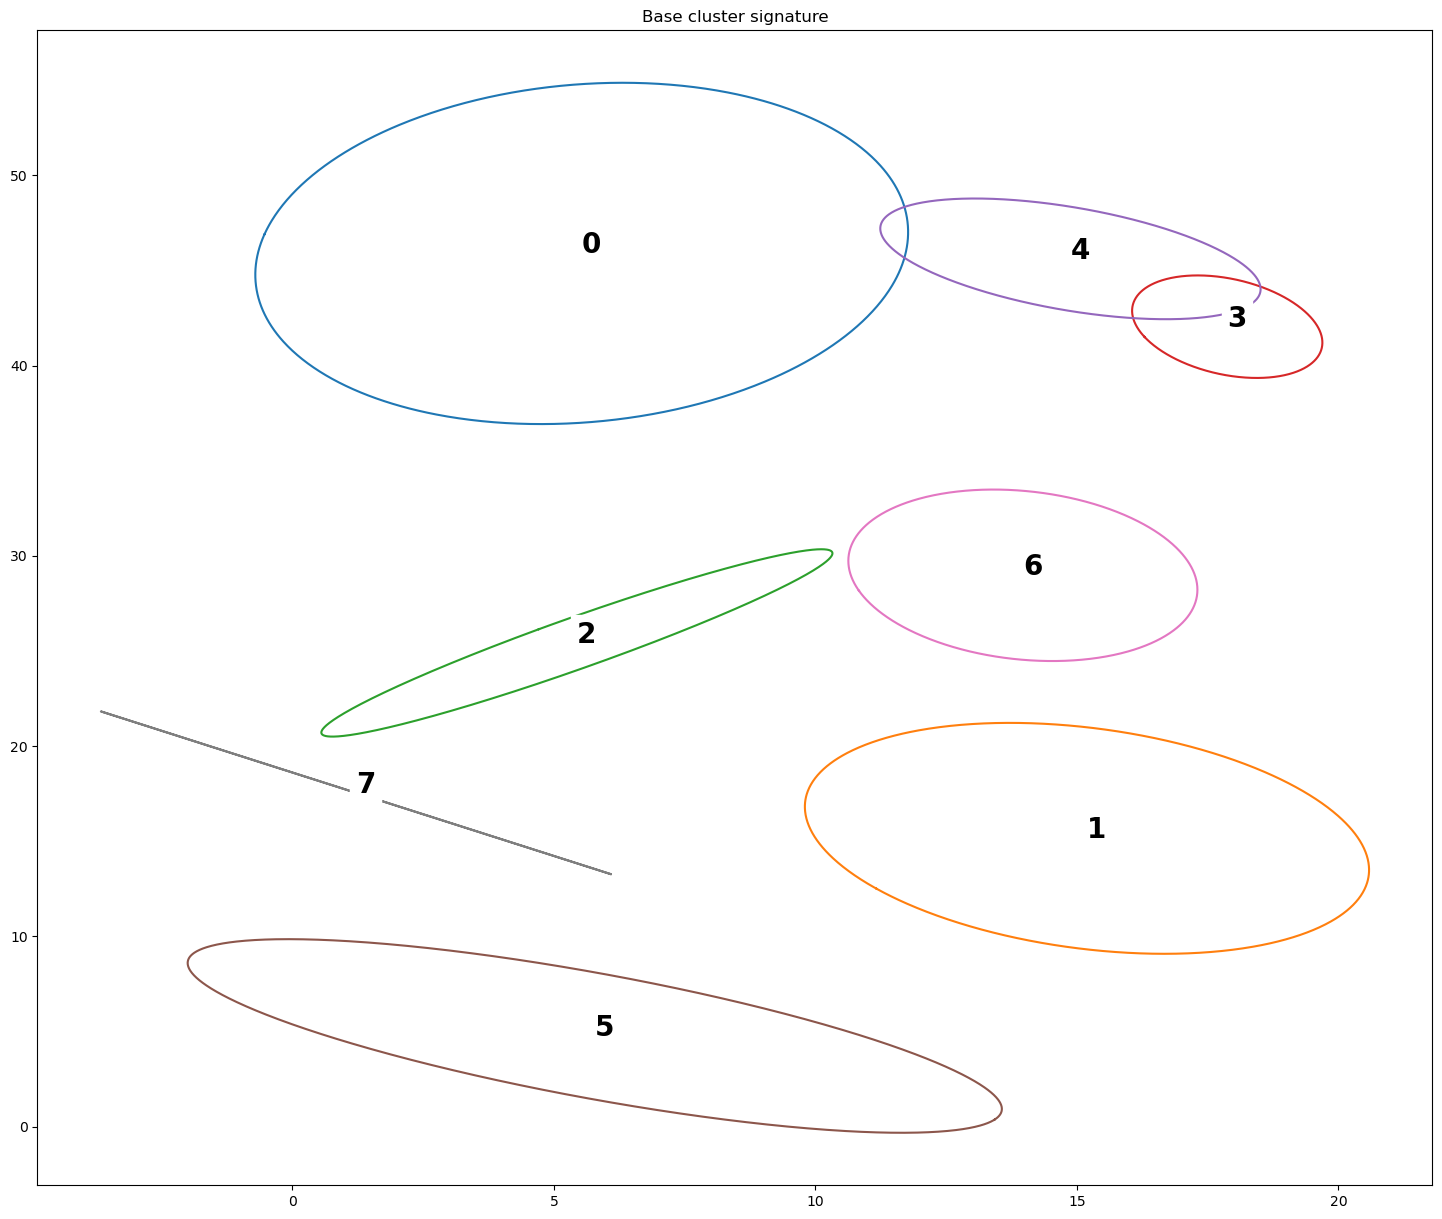

In [3799]:
# ploting ellipse function
plt.rcParams["figure.figsize"] = (18,15)

for i in range(num_clusters):
    cluster_data = data[cluster_assignments == i]
    
    # Plot the cluster's data points #, c=[cmap(cluster_label)]
    # plt.scatter(cluster_data[:, 0], cluster_data[:, 1])
                
    cov = covariance_matrices[i]
    val, rot = np.linalg.eig(cov)
    val = np.sqrt(val)
    center = cluster_centers[i][:, None]
    plt.scatter(center[0], center[1], c='green', marker='*', label='Center')
    t = np.linspace(0, 2.0 * np.pi, 1000)
    xy = np.stack((np.cos(t), np.sin(t)), axis=-1)
    scaling_factor = np.sqrt(5.991)  # For a 2D ellipse and 95% confidence
    plt.plot(*(rot @ (scaling_factor* val * xy).T + center))
    plt.annotate(i, xy=center,size=20, weight='bold',backgroundcolor='#FFFFFF')
    plt.title("Base cluster signature")
plt.savefig('Alldataclusters0.png',bbox_inches='tight')

In [3800]:
global_cluster_assignment = cluster_assignments

In [3801]:
len(global_cluster_assignment)

179

In [3802]:
global_cluster_assignment

array([3, 6, 5, 4, 0, 5, 0, 7, 6, 2, 4, 5, 1, 2, 2, 0, 6, 3, 2, 0, 4, 6,
       5, 4, 2, 2, 4, 4, 4, 4, 2, 2, 6, 0, 5, 4, 5, 4, 4, 1, 2, 2, 4, 2,
       4, 5, 1, 0, 2, 4, 4, 0, 4, 3, 0, 2, 6, 0, 4, 1, 5, 2, 1, 7, 2, 4,
       4, 0, 4, 1, 4, 1, 5, 5, 2, 2, 2, 0, 1, 4, 1, 2, 4, 0, 0, 2, 5, 4,
       0, 4, 4, 2, 1, 4, 1, 4, 4, 2, 1, 2, 2, 2, 2, 0, 0, 0, 2, 2, 6, 2,
       1, 1, 6, 3, 4, 1, 2, 5, 3, 1, 2, 0, 6, 2, 4, 1, 2, 2, 1, 1, 1, 5,
       2, 4, 4, 2, 1, 6, 1, 5, 4, 6, 6, 1, 4, 5, 0, 4, 2, 5, 4, 4, 4, 3,
       5, 1, 6, 5, 1, 3, 2, 5, 1, 1, 4, 6, 6, 1, 5, 6, 2, 1, 4, 2, 2, 5,
       0, 4, 5], dtype=int64)

In [3803]:
max(global_cluster_assignment)+1

8

In [3804]:
#Functions
chunk_index = 0
#fuunction to calculate mahalanobis distance
from scipy.spatial.distance import mahalanobis
def calculate_mahalanobis_distance(cluster_data, cluster_center, covariance_matrix):
    distances = []
    inverse_cov_matrix = np.linalg.inv(covariance_matrix)
    for point in cluster_data:
        distance = mahalanobis(point, cluster_center, inverse_cov_matrix)
        distances.append((point, distance))
    return distances

def calculate_entropy_after_merge(cluster1, cluster2):
    # mreged covariance of two different data window
    n1 = cluster_counts[cluster1]
    n2 = cluster_counts2[cluster2]
    m1 = cluster_centers[cluster1]
    m2 = cluster_centers2[cluster2]
    covariance1 = covariance_matrices[cluster1]
    covariance2 = covariance_matrices2[cluster2]
    n=n1+n2
    m = (n1*m1 + n2*m2) / n

    merged_cov = (n1*covariance1 + n2*covariance2 + n1 * np.dot(np.transpose(m1-m) , (m1-m)) + n2 * np.dot(np.transpose(m2-m),(m2-m))) / n
    # Calculate the determinant of the covariance matrix
    covariance_det = np.linalg.det(merged_cov)
    # Calculate the entropy
    merged_entropy = 0.5 *(len(merged_cov)) * np.log2(2 * np.pi * np.exp(1)) + np.log2(abs(covariance_det))
    return merged_entropy, m, merged_cov, n

def merge_clusters():
    global an_df

    
    n_clusters = len(cluster_centers2)
    combined_clusters = []
    def distance(center1, center2): return math.sqrt(sum((x1 - x2) ** 2 for x1, x2 in zip(center1, center2)))
    
    def find_nearest_clusters(center_index):
        distances = [(distance(cluster_centers2[center_index], cluster_centers[i]), i) for i in range(len(cluster_centers))]
        distances.sort()
        return [i for _, i in distances[0:4]] 
    
    merged_centers = []
    merged_covariance = []
    merged_entropies = []
    merged_cluster_counts = []
    nearest_clusters = []
    
    for i in range(n_clusters):
        nearest_clusters.append(find_nearest_clusters(i))
        
    for i in range(n_clusters):
        global global_cluster_assignment
        global cluster_data
    
        nearest_cluster = nearest_clusters[i]   #nearest cluster index 
        current_entropy = cluster_entropies2[i]
        lowest_merged_center = None
        lowest_merged_cov = None
        lowest_num = None
        lowest_merged_entropy = None
        
        best_merge_candidate = None
#        print(nearest_cluster)
        min_delta = None
        for j in nearest_cluster: # j is index of base chunks
            e1 = cluster_entropies[j]
            e2 = cluster_entropies2[i]
            n2 = cluster_counts2[i]
            merged_entropy , merged_center, merged_cov, num = calculate_entropy_after_merge(j,i)
            delta_e1 = ((merged_entropy - e1)/e1)*100
            delta_e2 = ((merged_entropy - e2)/e2) * 100
#            print(f'Delta e1: {delta_e1:.3f}', end=' ')
#            print(f'Delta e2: {delta_e2:.3f}', end=' ')
#            print("Entropy base",end=' ')
#            print(f'{cluster_entropies[j]:.3f}', end='   ')
            lowest_entropy_after_merge = None
            # if(lowest_entropy_after_merge is None):
            if (delta_e1 <= 10 and delta_e2 <= 10) or (delta_e1 <= 10 and n2 < 10):
                lowest_entropy_after_merge = merged_entropy
                lowest_merged_center = merged_center
                lowest_merged_cov = merged_cov
                lowest_num = num                
                best_merge_candidate = j
                break
            # else:
            #     if(merged_entropy < lowest_entropy_after_merge):
            #         lowest_entropy_after_merge = merged_entropy
            #         lowest_merged_center = merged_center
            #         lowest_merged_cov = merged_cov
            #         lowest_num = num                
            #         best_merge_candidate = j
        print()
        if best_merge_candidate is not None:
            merged_centers.append(lowest_merged_center)
            merged_covariance.append(lowest_merged_cov)
            merged_entropies.append(lowest_entropy_after_merge)
            merged_cluster_counts.append(lowest_num)
            
            cluster_centers[best_merge_candidate] = lowest_merged_center
            covariance_matrices[best_merge_candidate]=lowest_merged_cov
            cluster_entropies[best_merge_candidate] = lowest_entropy_after_merge
            np.put(cluster_counts,best_merge_candidate,lowest_num)

#            print('-> New data Chunks {0}th index Cluster merges with {1}th index Cluster of Base data, {2}'.format(i,best_merge_candidate,cluster_counts2[i]))
            cluster_data = data[cluster_assignments == i]
            mahalonobis_distance = calculate_mahalanobis_distance(cluster_data, lowest_merged_center, lowest_merged_cov)
            sorted_mahalonobis_distance = sorted(mahalonobis_distance, key=lambda x: x[1],reverse=True)
#            print(sorted_mahalonobis_distance[0:5])
            print()
    
                
            center = lowest_merged_center
            covariance_matrix = lowest_merged_cov
            num_points = len(cluster_data)
            # Calculate the inverse of the covariance matrix
            inv_covariance_matrix = np.linalg.inv(covariance_matrix)
            
            # j is the index of base clusters
            temp_cluster_assignment = np.full(len(cluster_data),j)
            global_cluster_assignment = np.append(global_cluster_assignment, temp_cluster_assignment)
            
            mahalanobis_distances = []
            for point in cluster_data:
                diff = point - center
                target_coordinates = np.array(point)
                maha_distance = np.sqrt(np.dot(diff.T, np.dot(inv_covariance_matrix, diff)))
                # logic to check if the point is already a anomaly
                if(len(an_df) > 0 and len(an_df.loc[(an_df['Coordinates'].apply(lambda x: np.all(np.array(x) == target_coordinates)))]) > 0):
                    anml = an_df.loc[(an_df['Coordinates'].apply(lambda x: np.all(np.array(x) == target_coordinates)))]
                    anml_index = anml.index[0]
                    an_df.at[anml_index , f"Chunk{chunk_index}"] = float('%.3f'%(maha_distance))
                else:
                    if maha_distance > 3:
                        anomaly = pd.Series({"Coordinates" : point , "Cluster Index": int(best_merge_candidate), f"Chunk{chunk_index}" : float('%.3f'%(maha_distance))})
                        an_df = pd.concat([an_df, pd.DataFrame([anomaly])],ignore_index = True)
                mahalanobis_distances.append(maha_distance)
            
        else:
            #Edit global_cluster_assignments
            temp_cluster_assignment = np.full(len(cluster_data), (max(global_cluster_assignment)+1) )
            global_cluster_assignment = np.append(global_cluster_assignment, temp_cluster_assignment)
            #
            
            print('Not Merged {0} index new cluster'.format(i))
            new_centers.append(cluster_centers2[i])
            new_entropies.append(cluster_entropies2[i])
            new_covariance.append(covariance_matrices2[i])
            new_counts.append(cluster_counts2[i])
            print()
            print()
    return merged_centers, merged_entropies,merged_covariance, merged_cluster_counts

# cluster_centers = cluster_centers[]  
# cluster_entropies = cluster_entropies2[]
import math

In [3805]:
num_clusters

8

In [3806]:
an_df

Empty DataFrame
Columns: [Coordinates, Cluster Index, Chunk1]
Index: []

In [3807]:
data_temp = pd.read_csv(f'data_stream{0}.csv',header=None).values

In [3808]:
len(data_temp)

179

In [3809]:
len_data_stream=18

[11 31 27 44 11 28 23  4]
179











Not Merged 5 index new cluster






[28 17 21 25 20 23 20 25]
358











Not Merged 5 index new cluster






[49 22 26 23 20  7 27  5]
537
















[13 43 28 30 11 16  8 30]
716
















[42 44 24 21 28 15  1  4]
895
















[10 43 23 17 23 23 33  7]
1074
















[17 17 39 42 31 12 11 10]
1253
















[35  2 29 14 16 22 40 21]
1432
















[27 14 55 15 36 10 11 11]
1611
















[26 46 44 25 16 12  5  5]
1790
















[14 17  5 23 45 50 13 12]
1969
















[ 6  5 53 30 38 15 14 18]
2148
















[20 29 13 33 44 19  9 12]
2327
















[17 28 44 33 16 12 18 11]
2506
















[35  7 27 26 11  9 39 25]
2685
















[ 2 33 30 32 20 14 43  5]
2864
















[25 31 16 34 18 22 18 15]
3043


















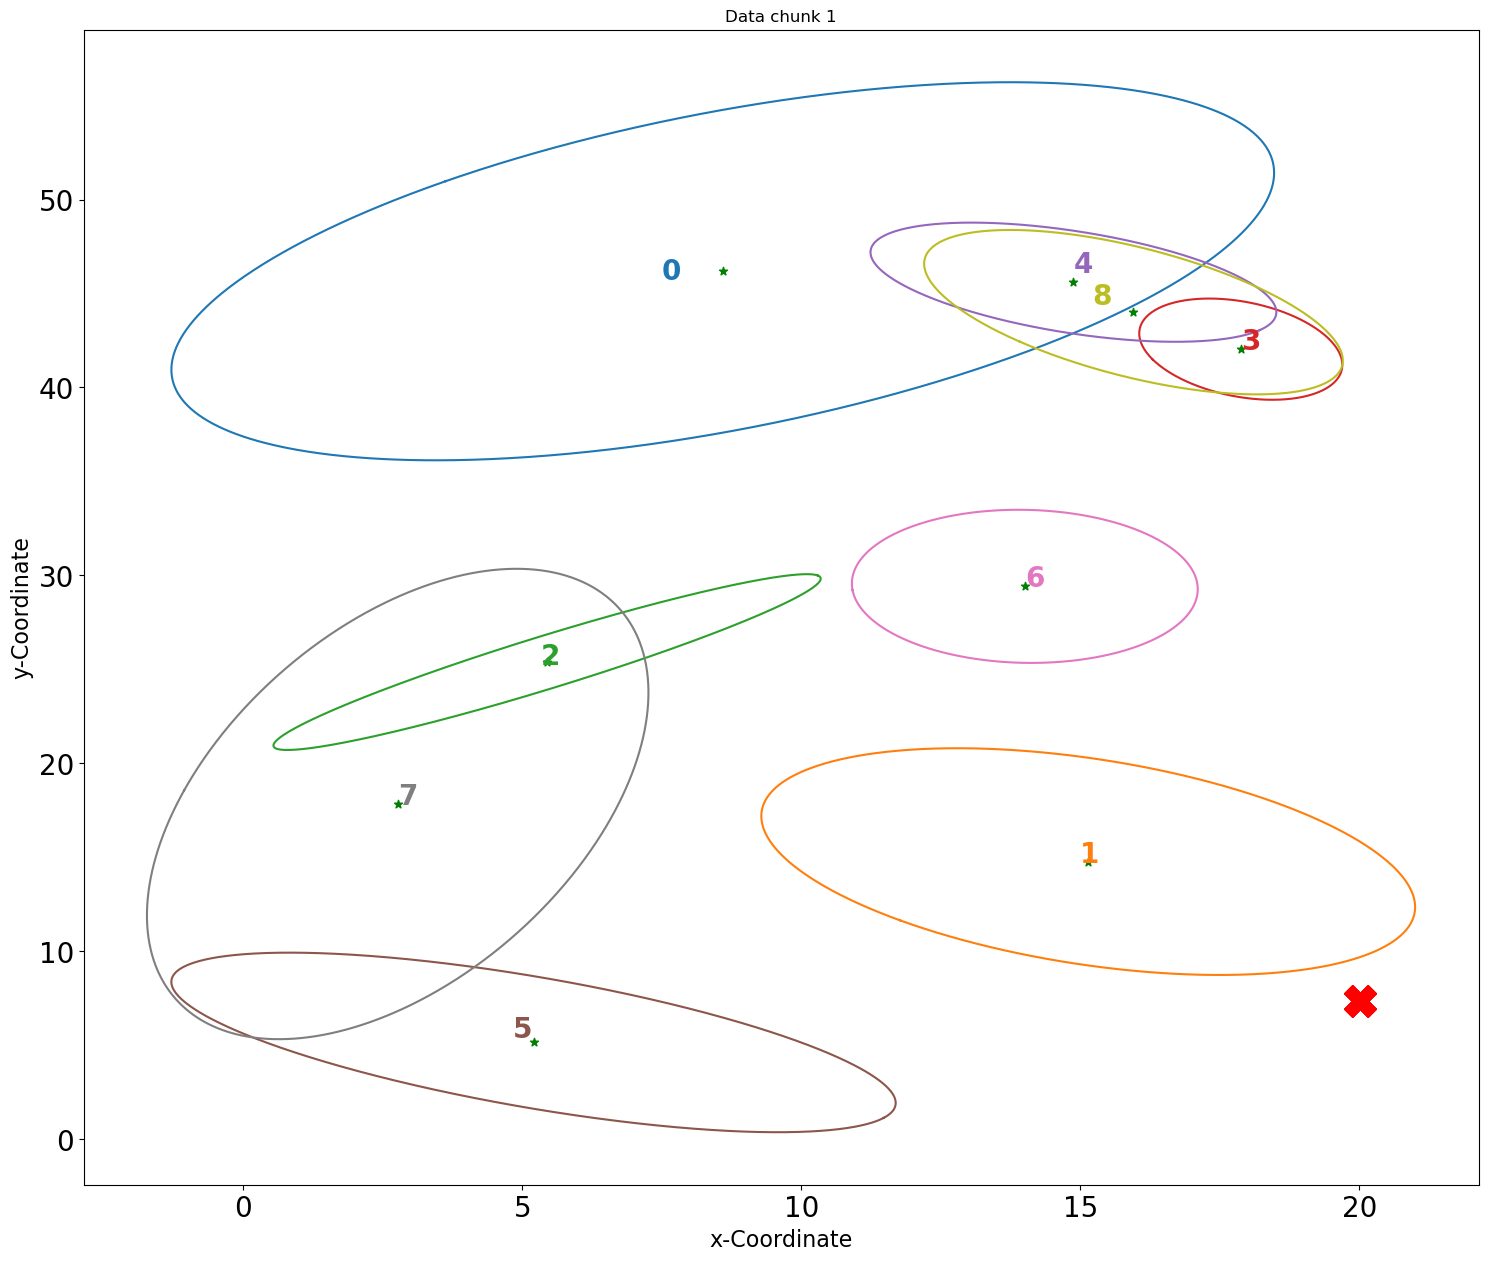

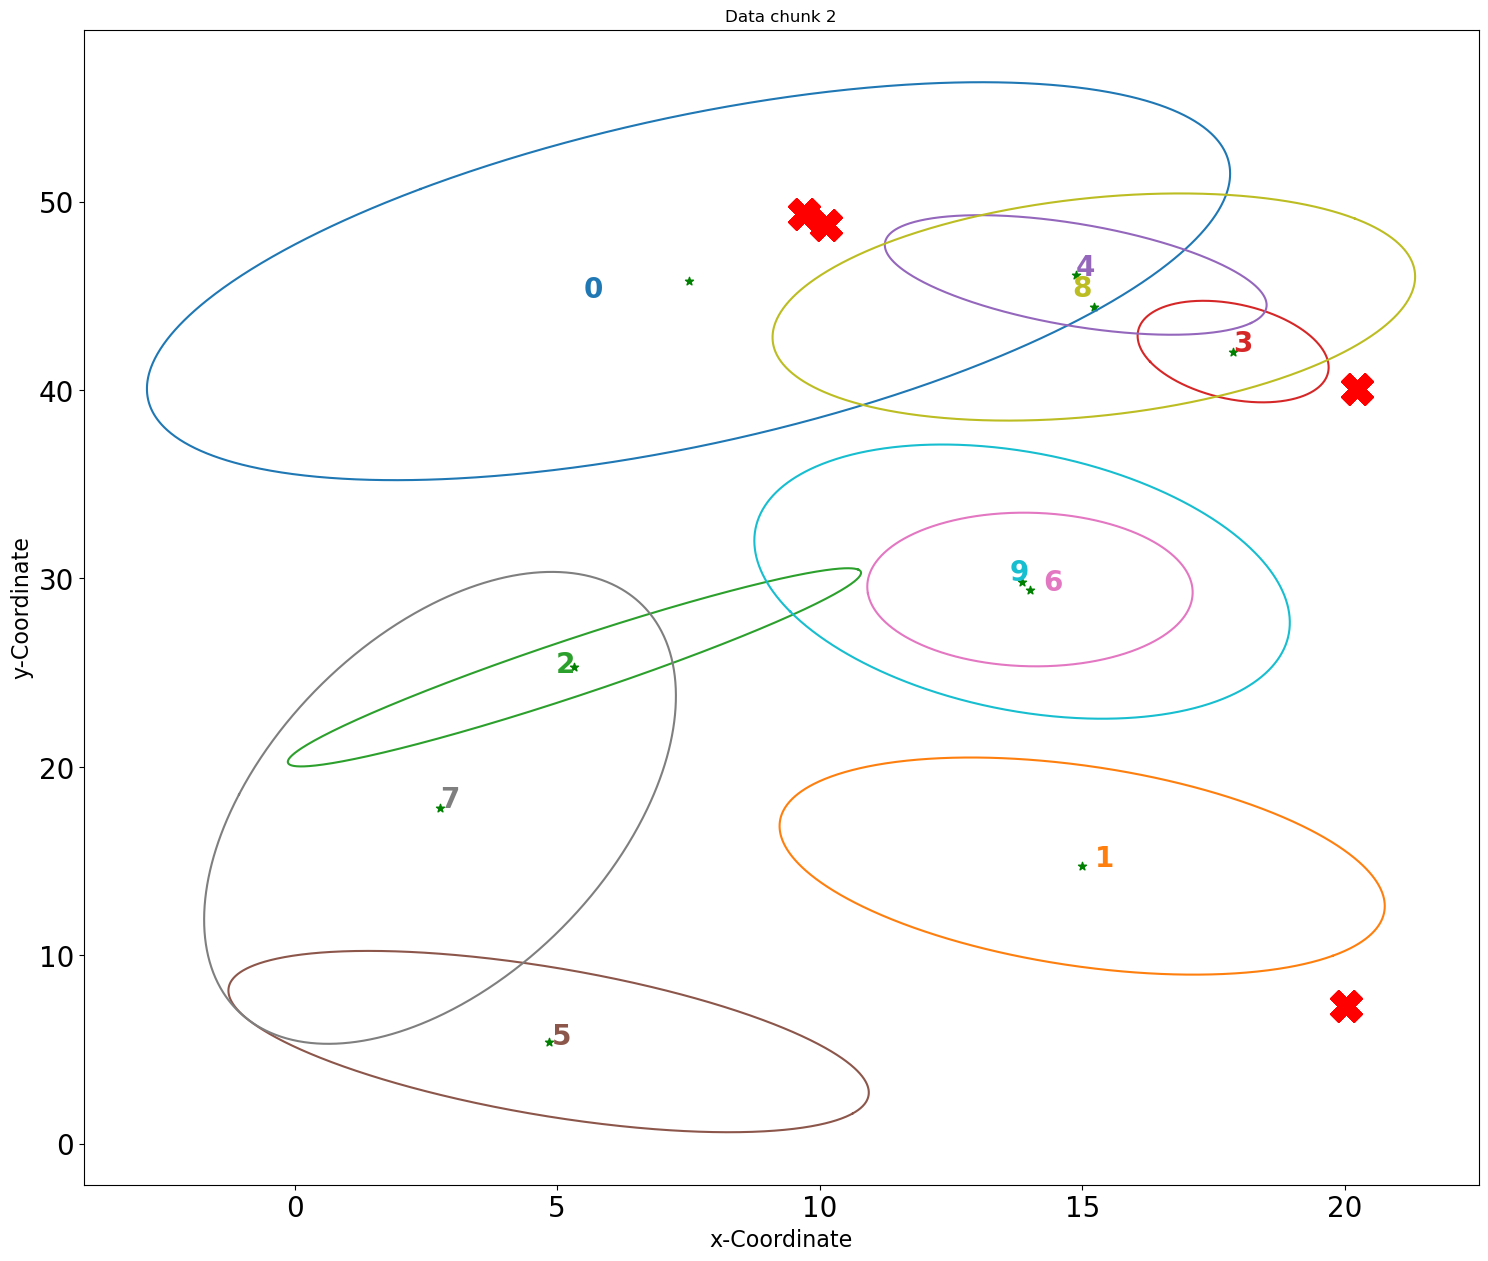

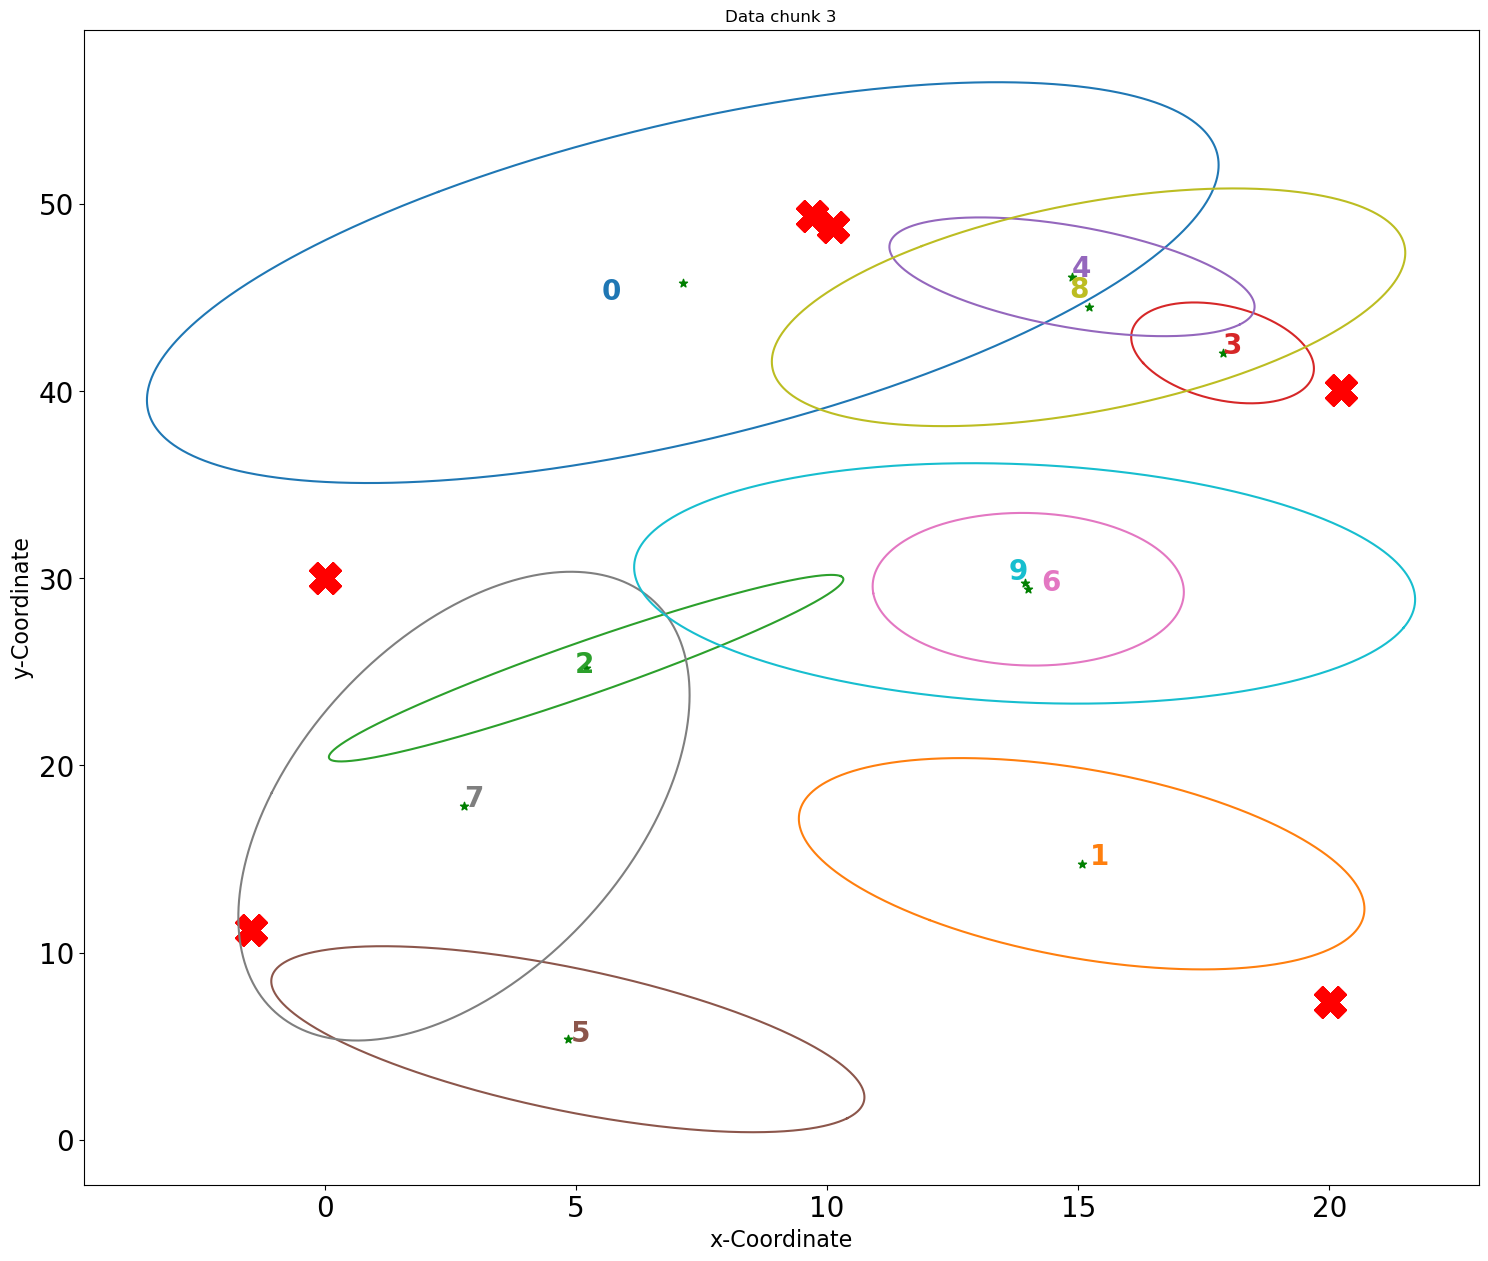

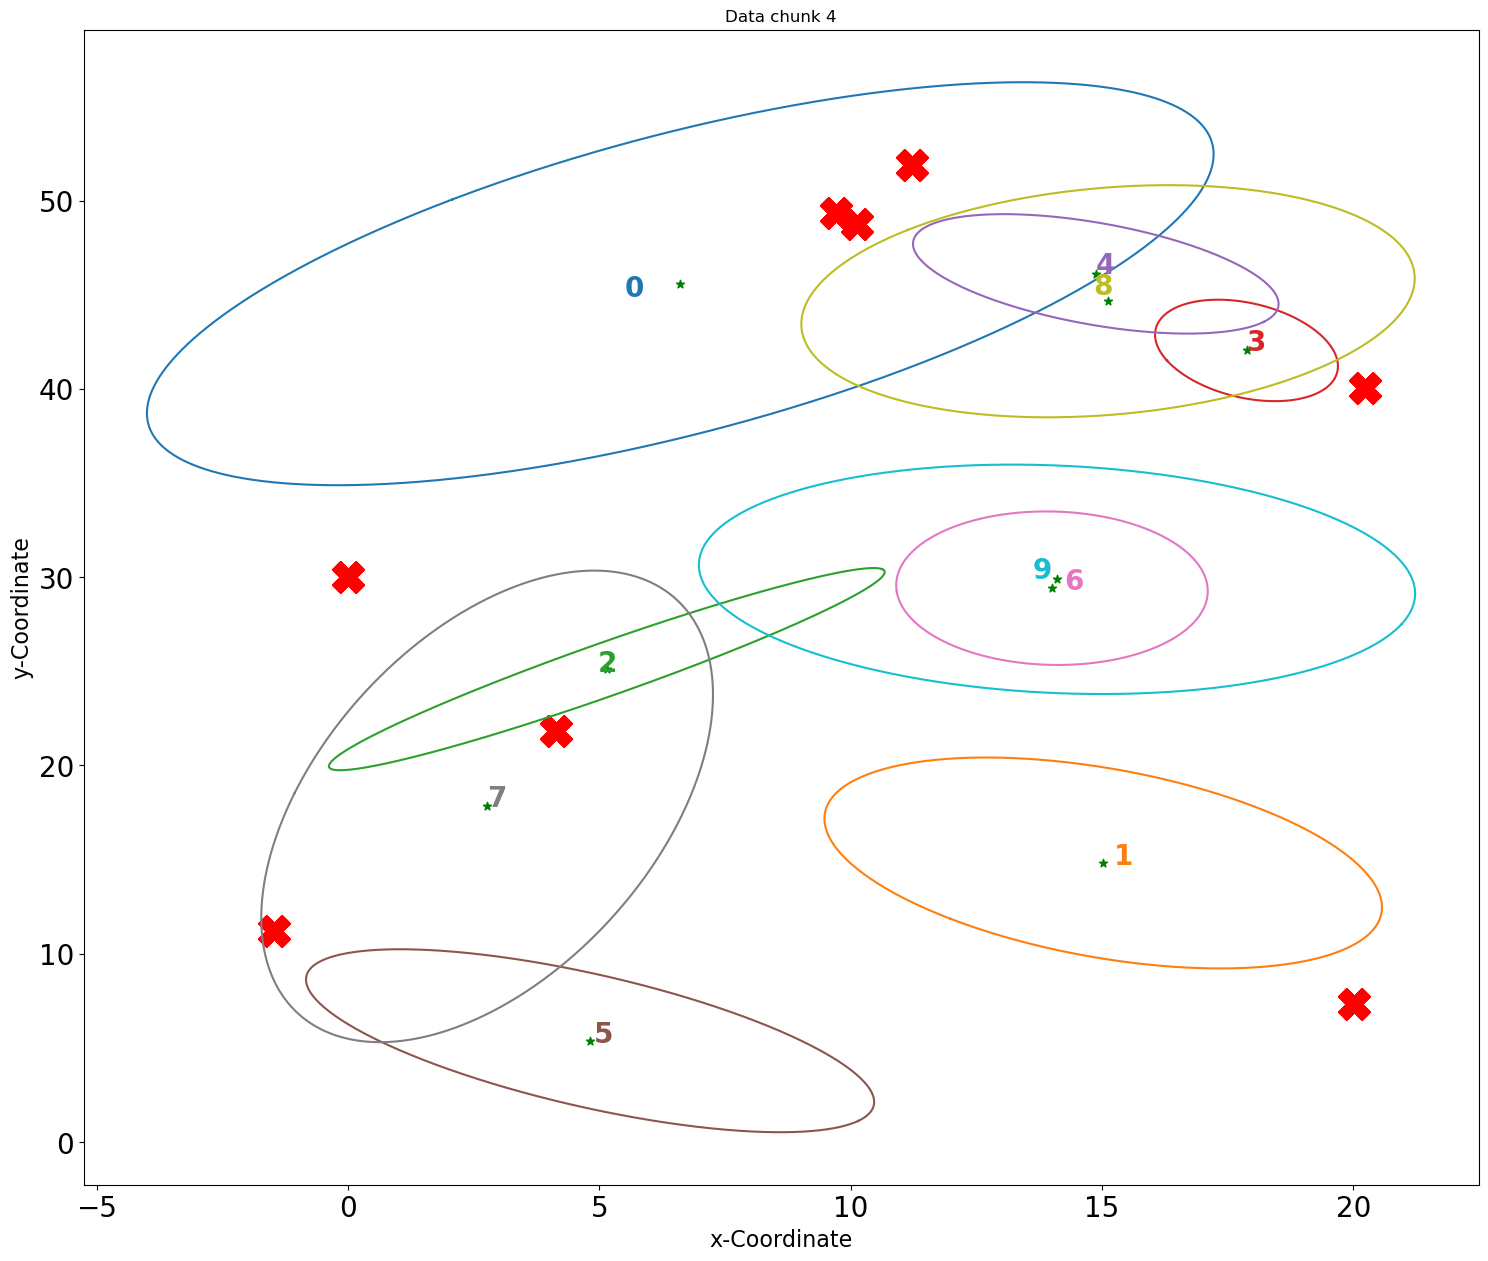

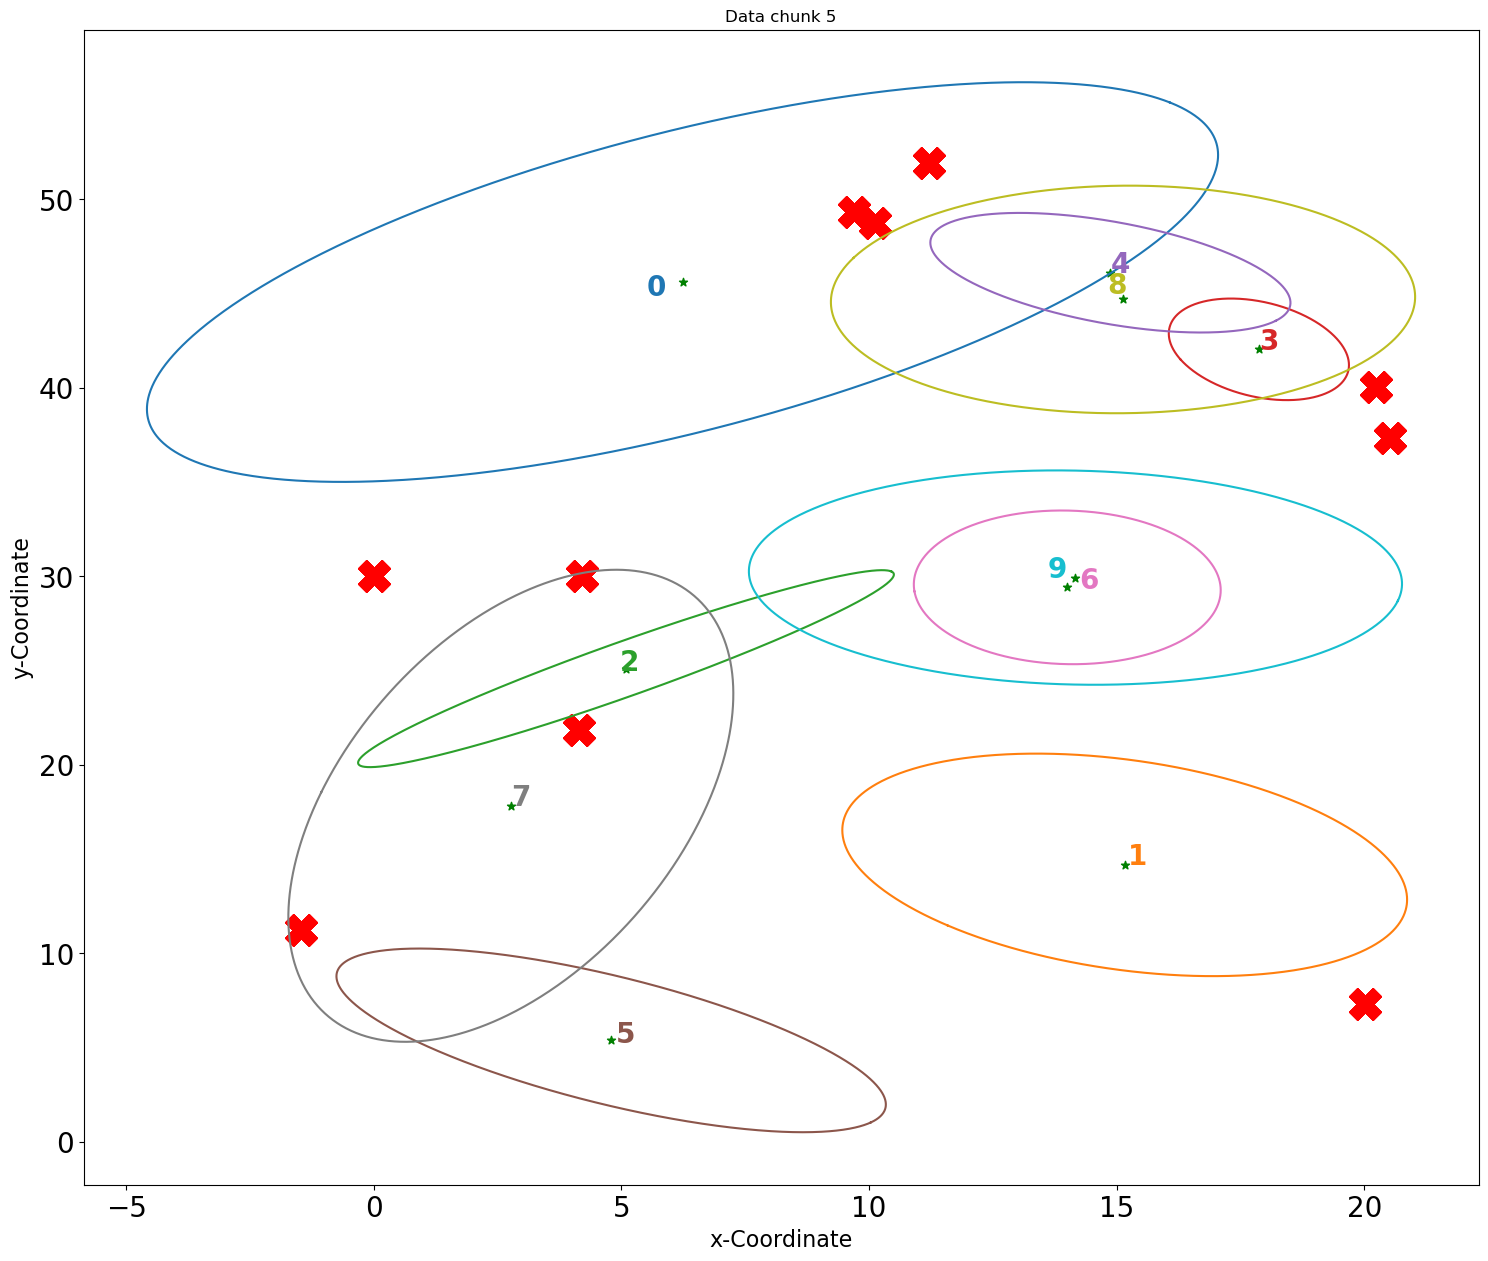

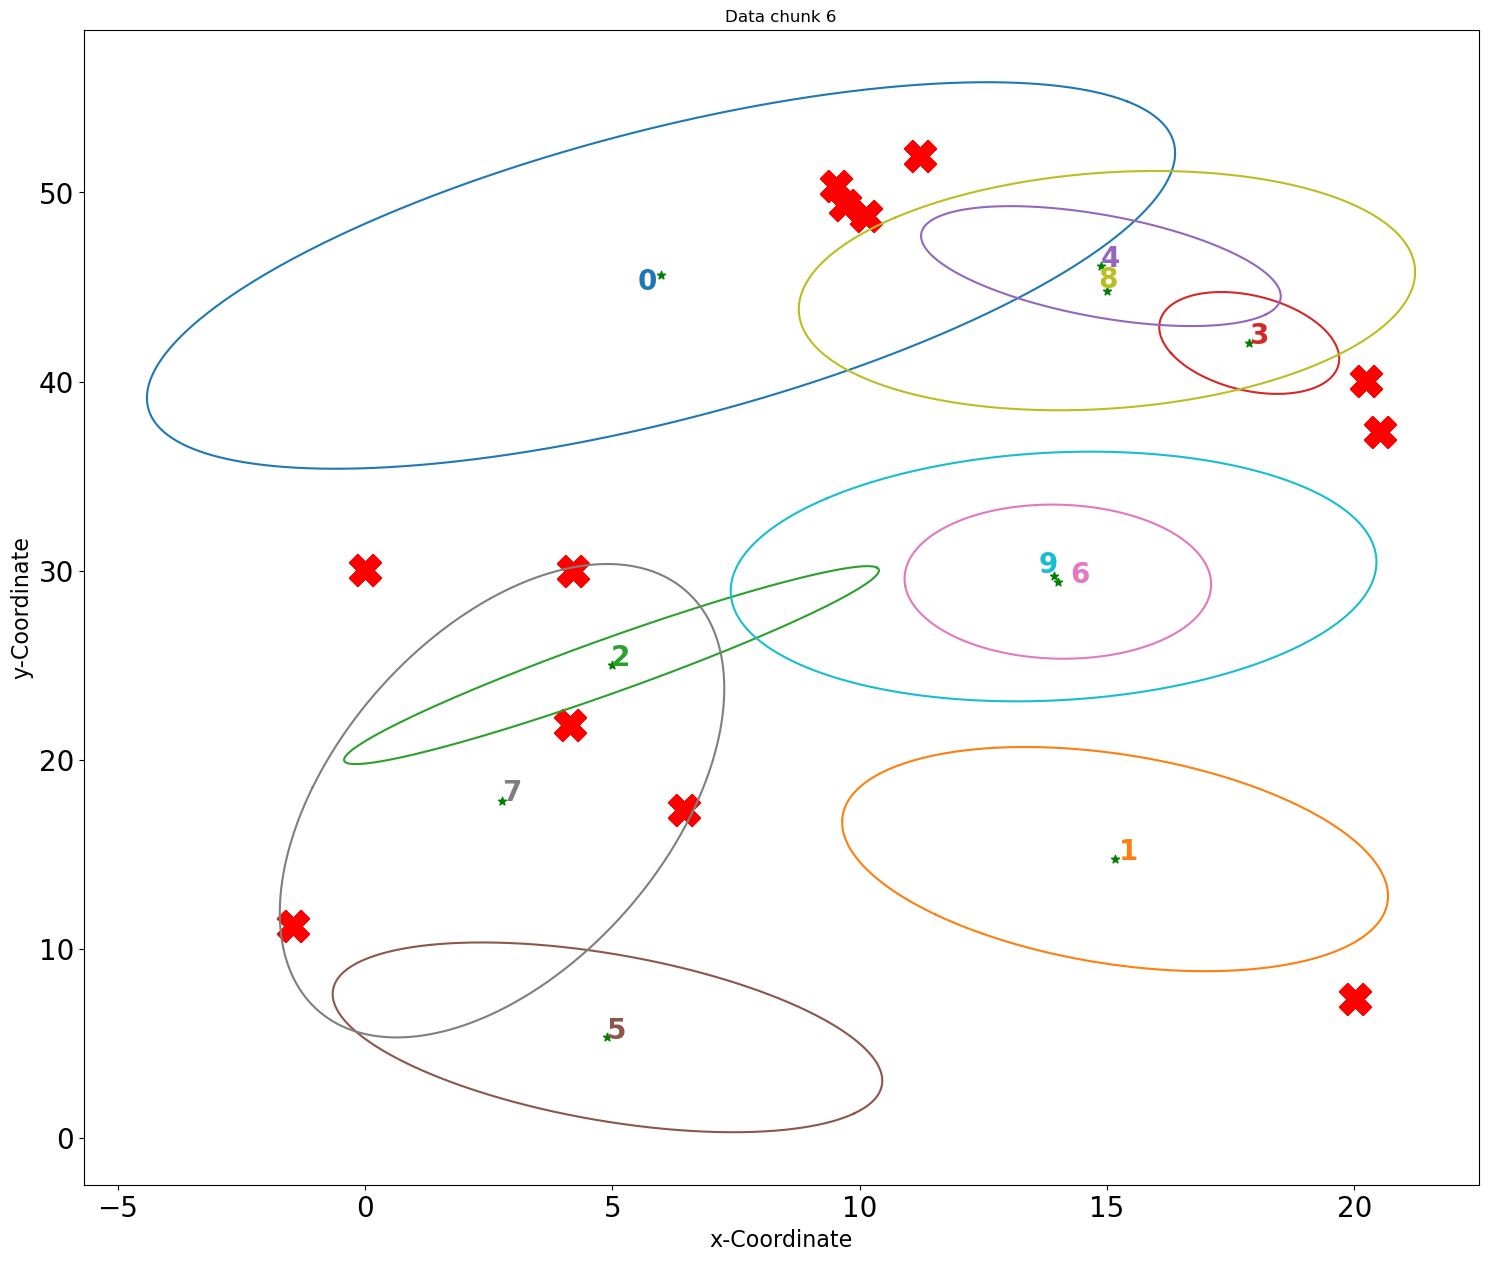

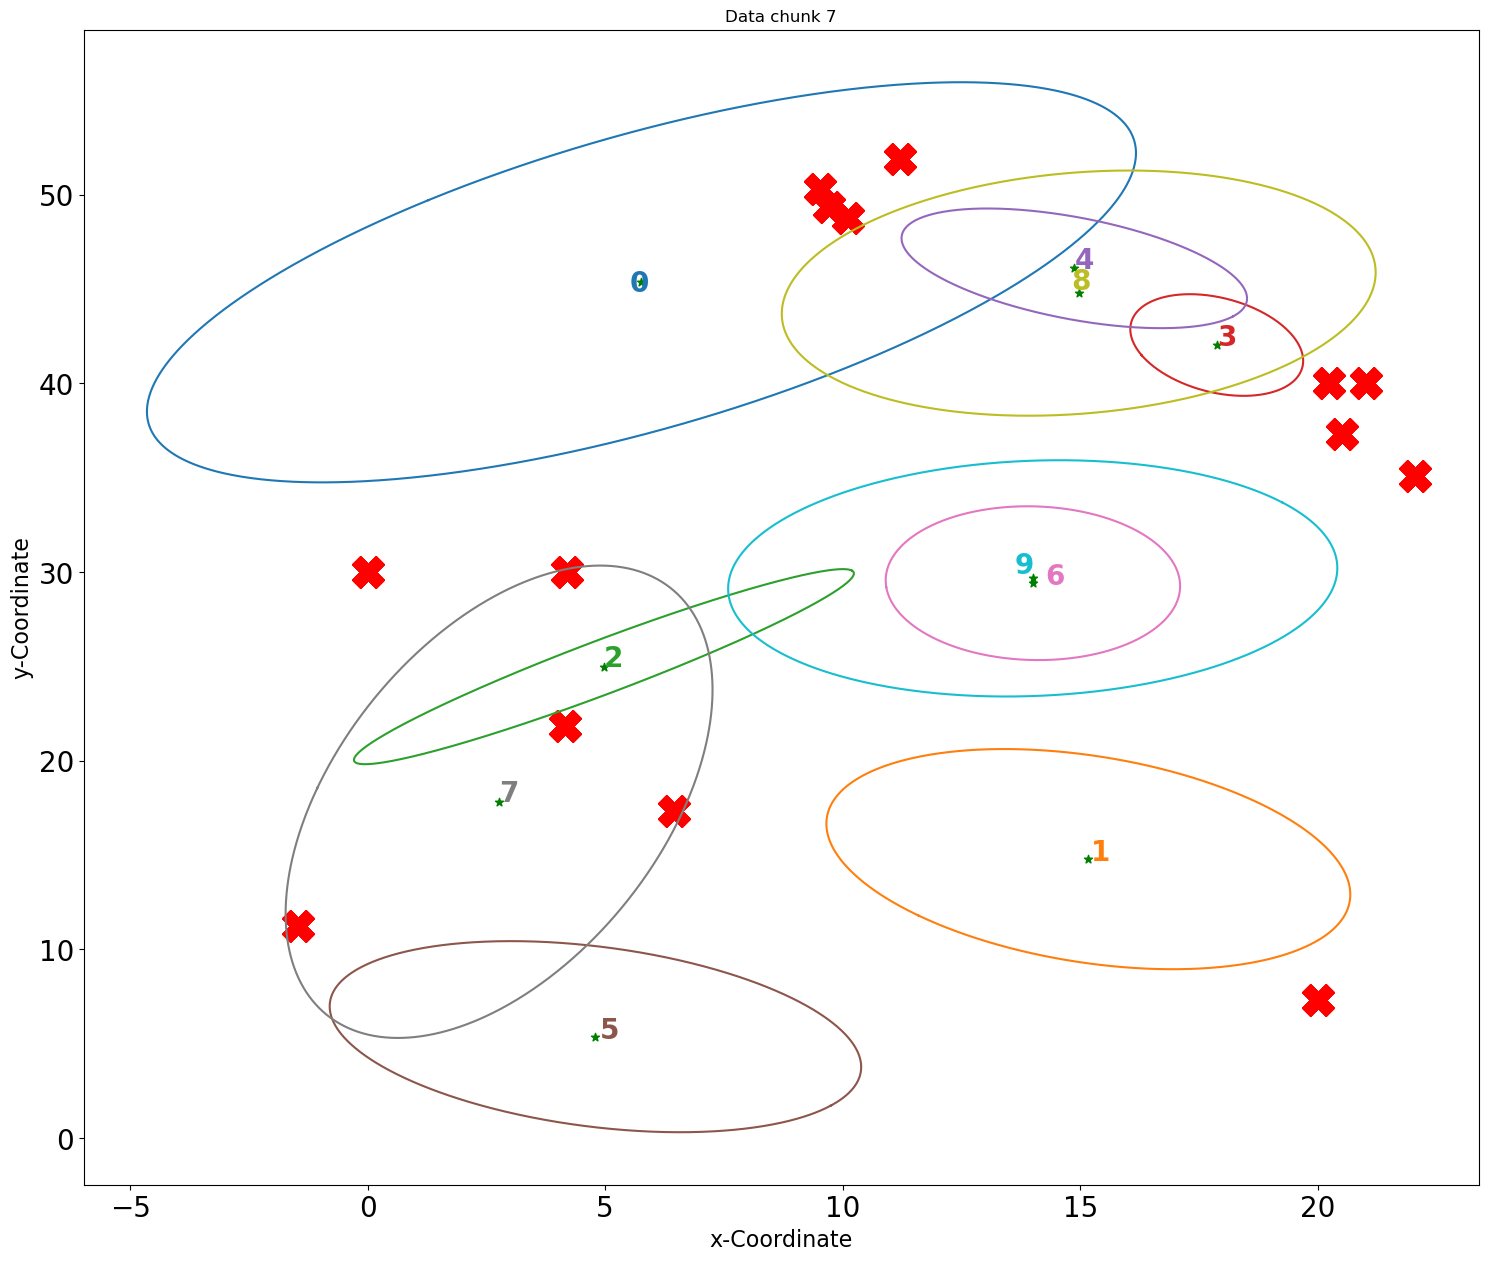

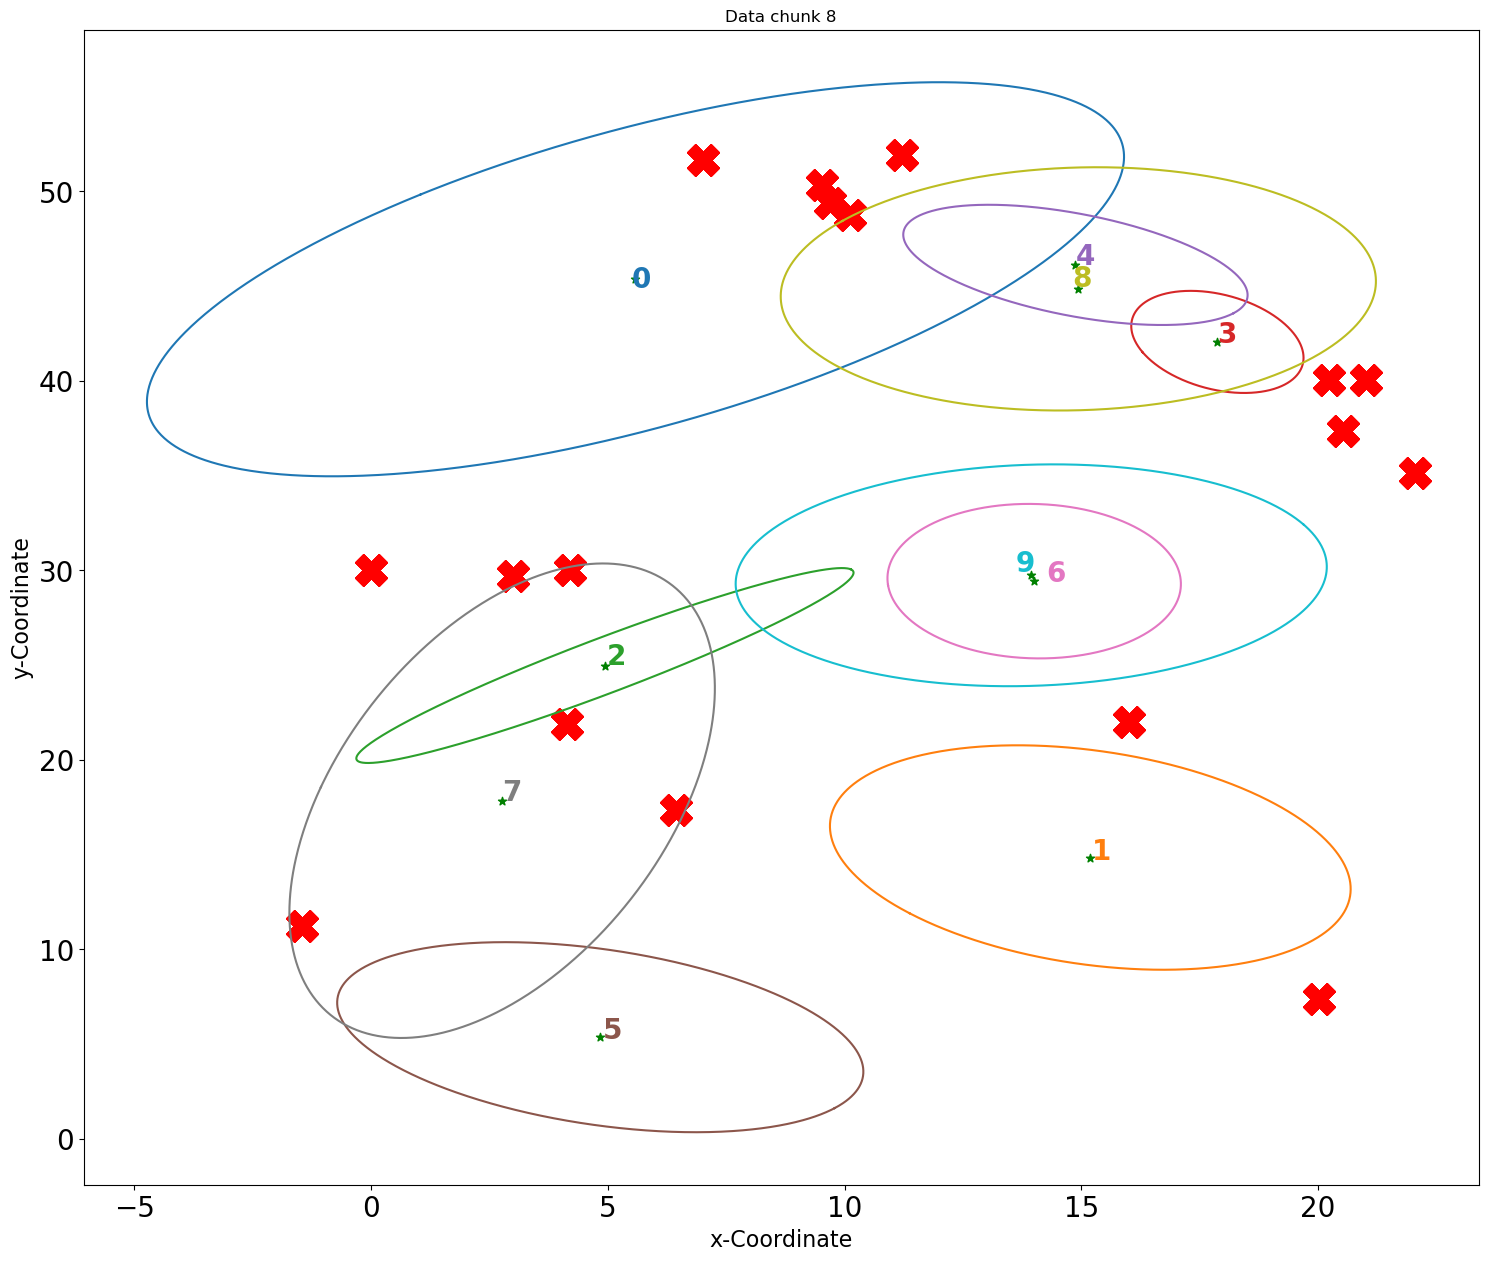

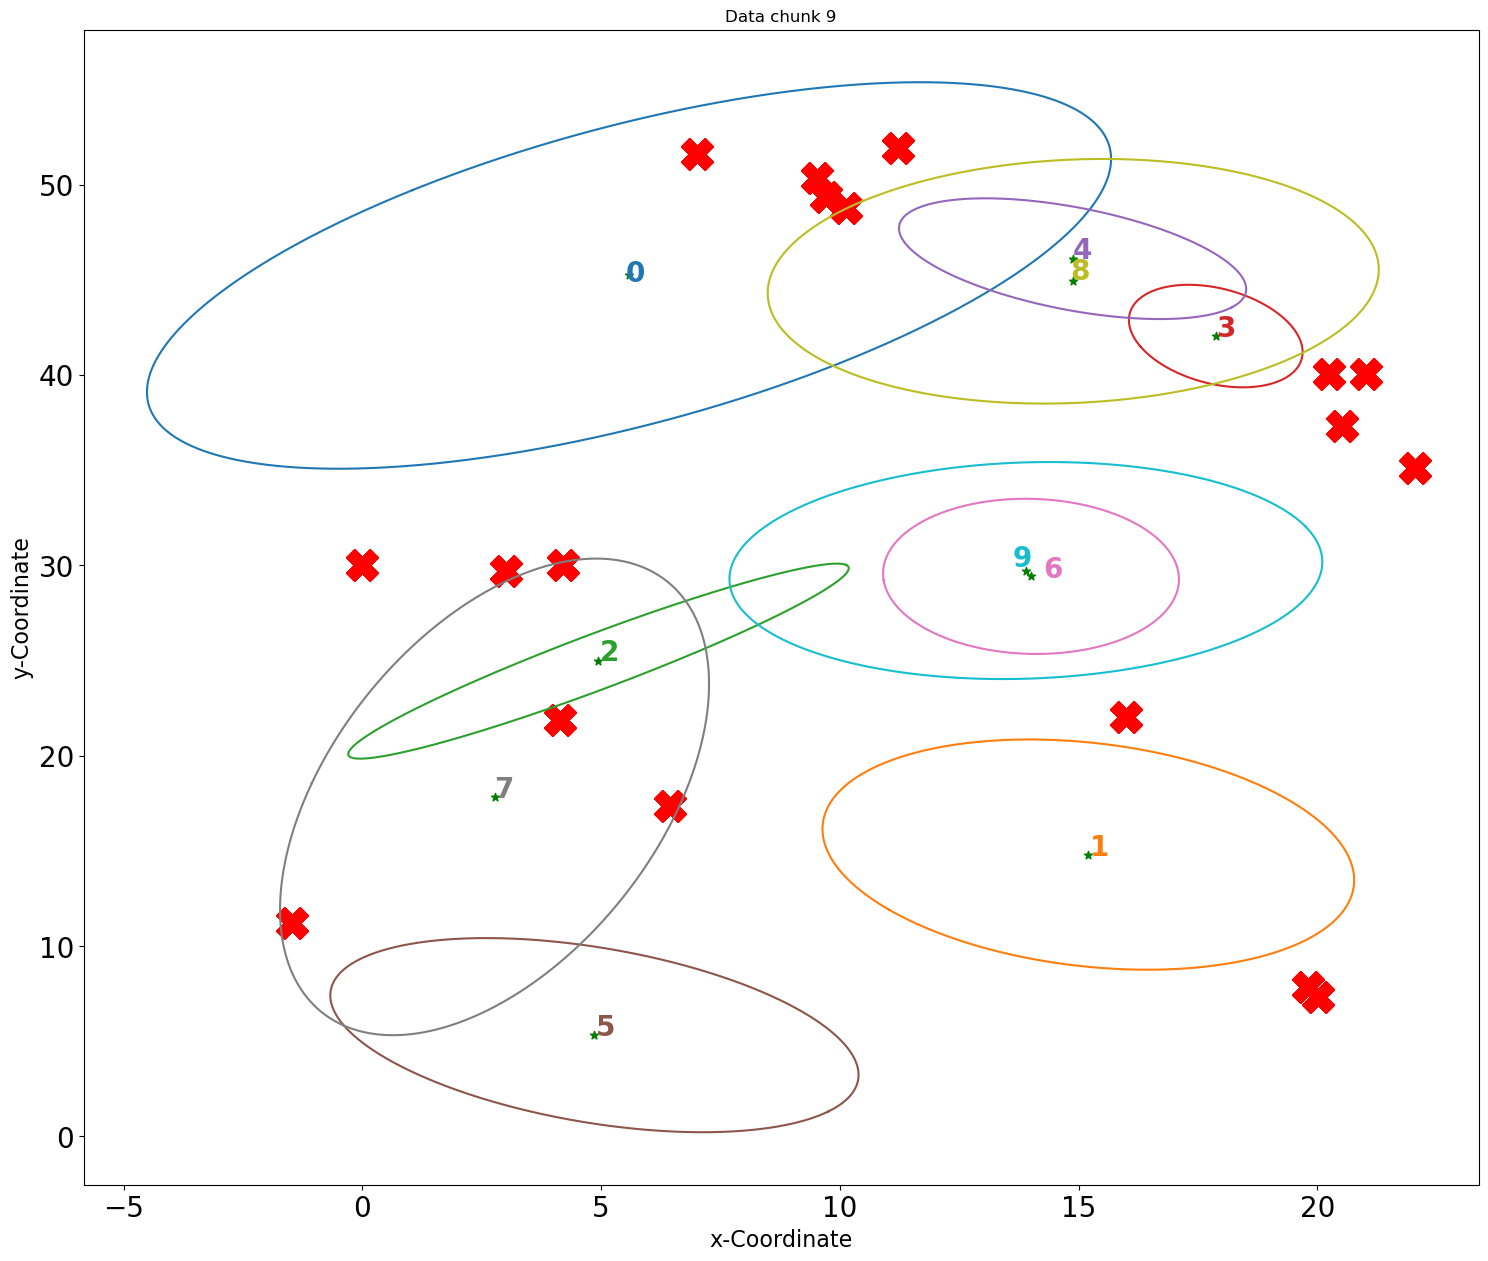

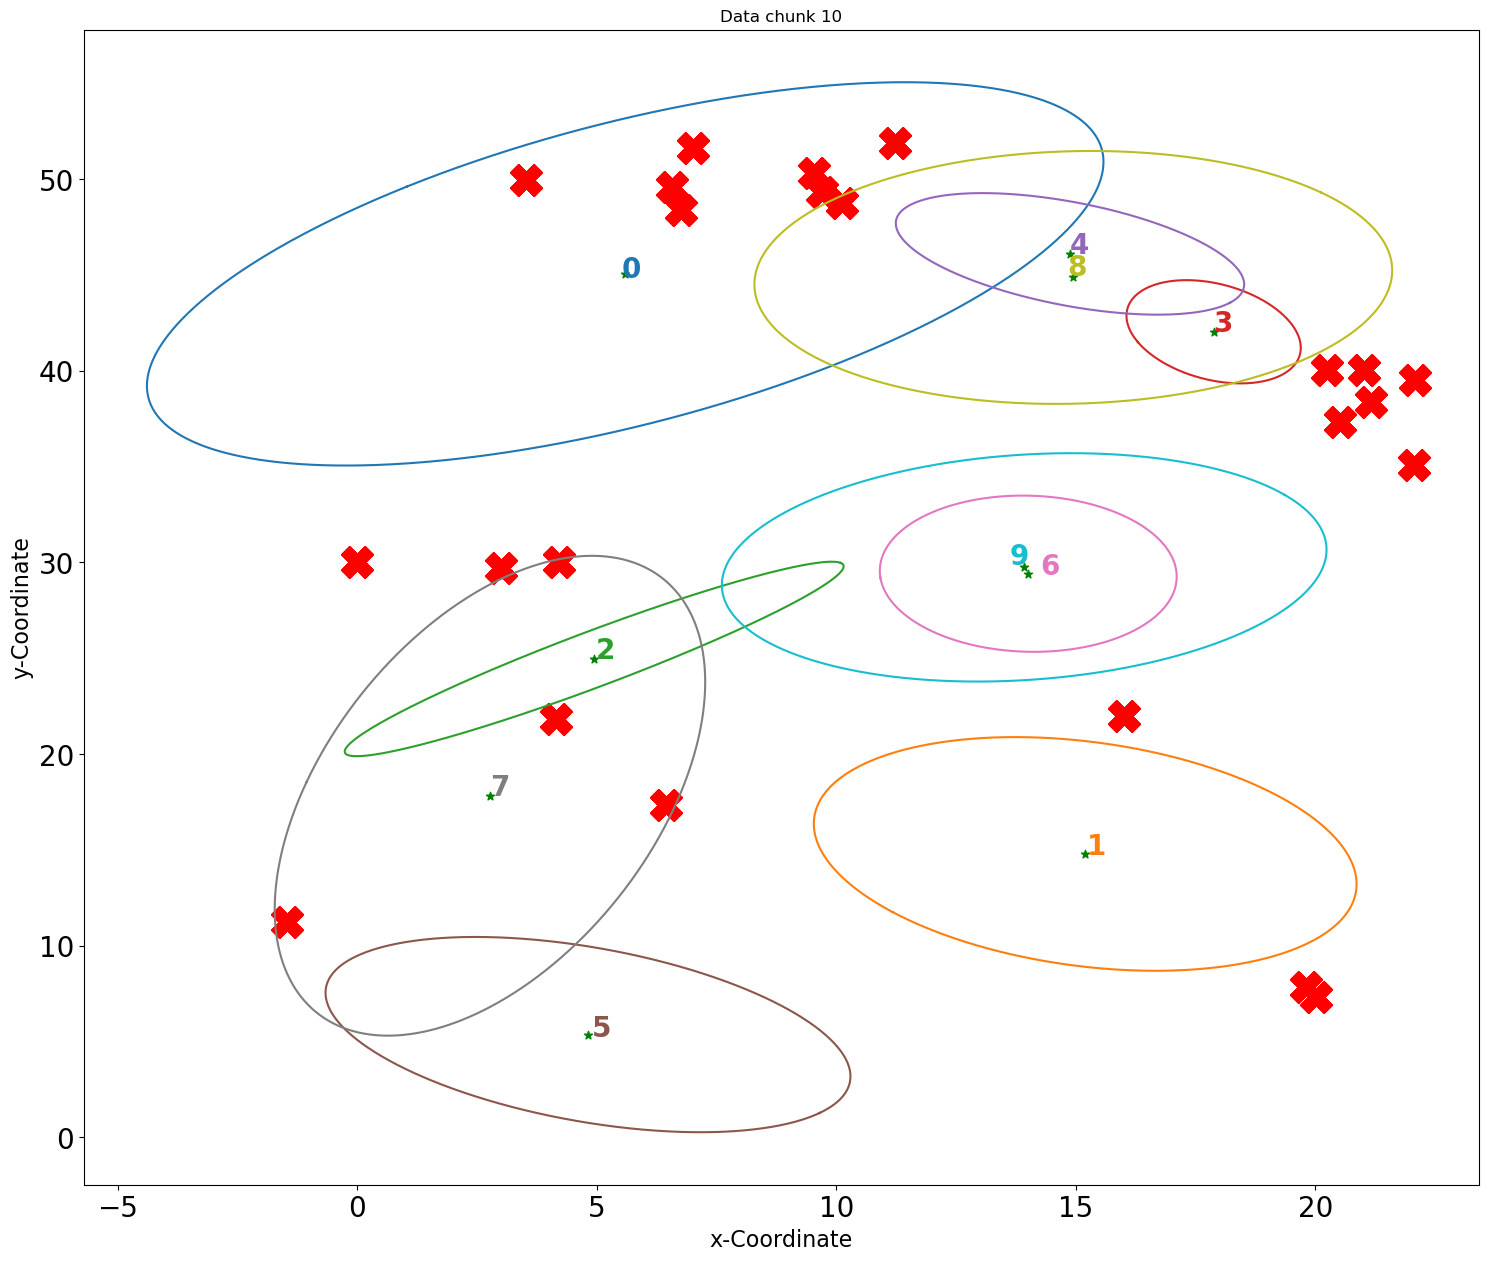

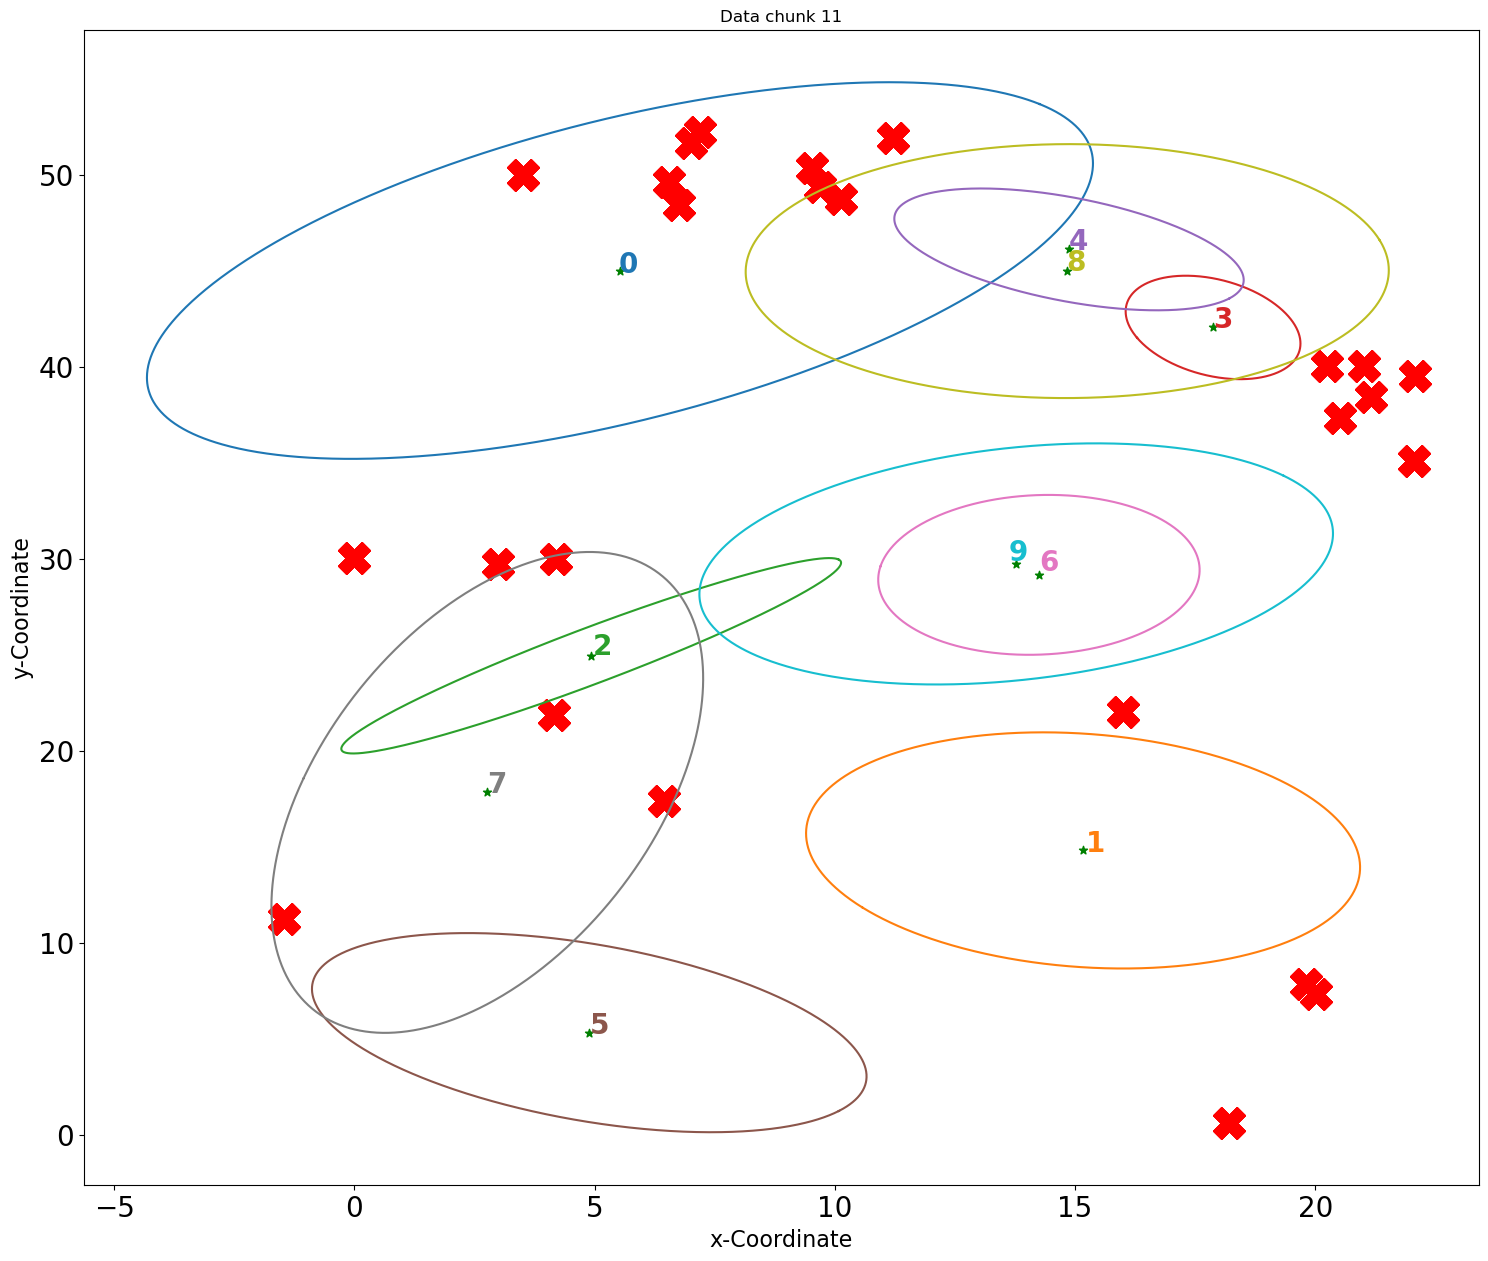

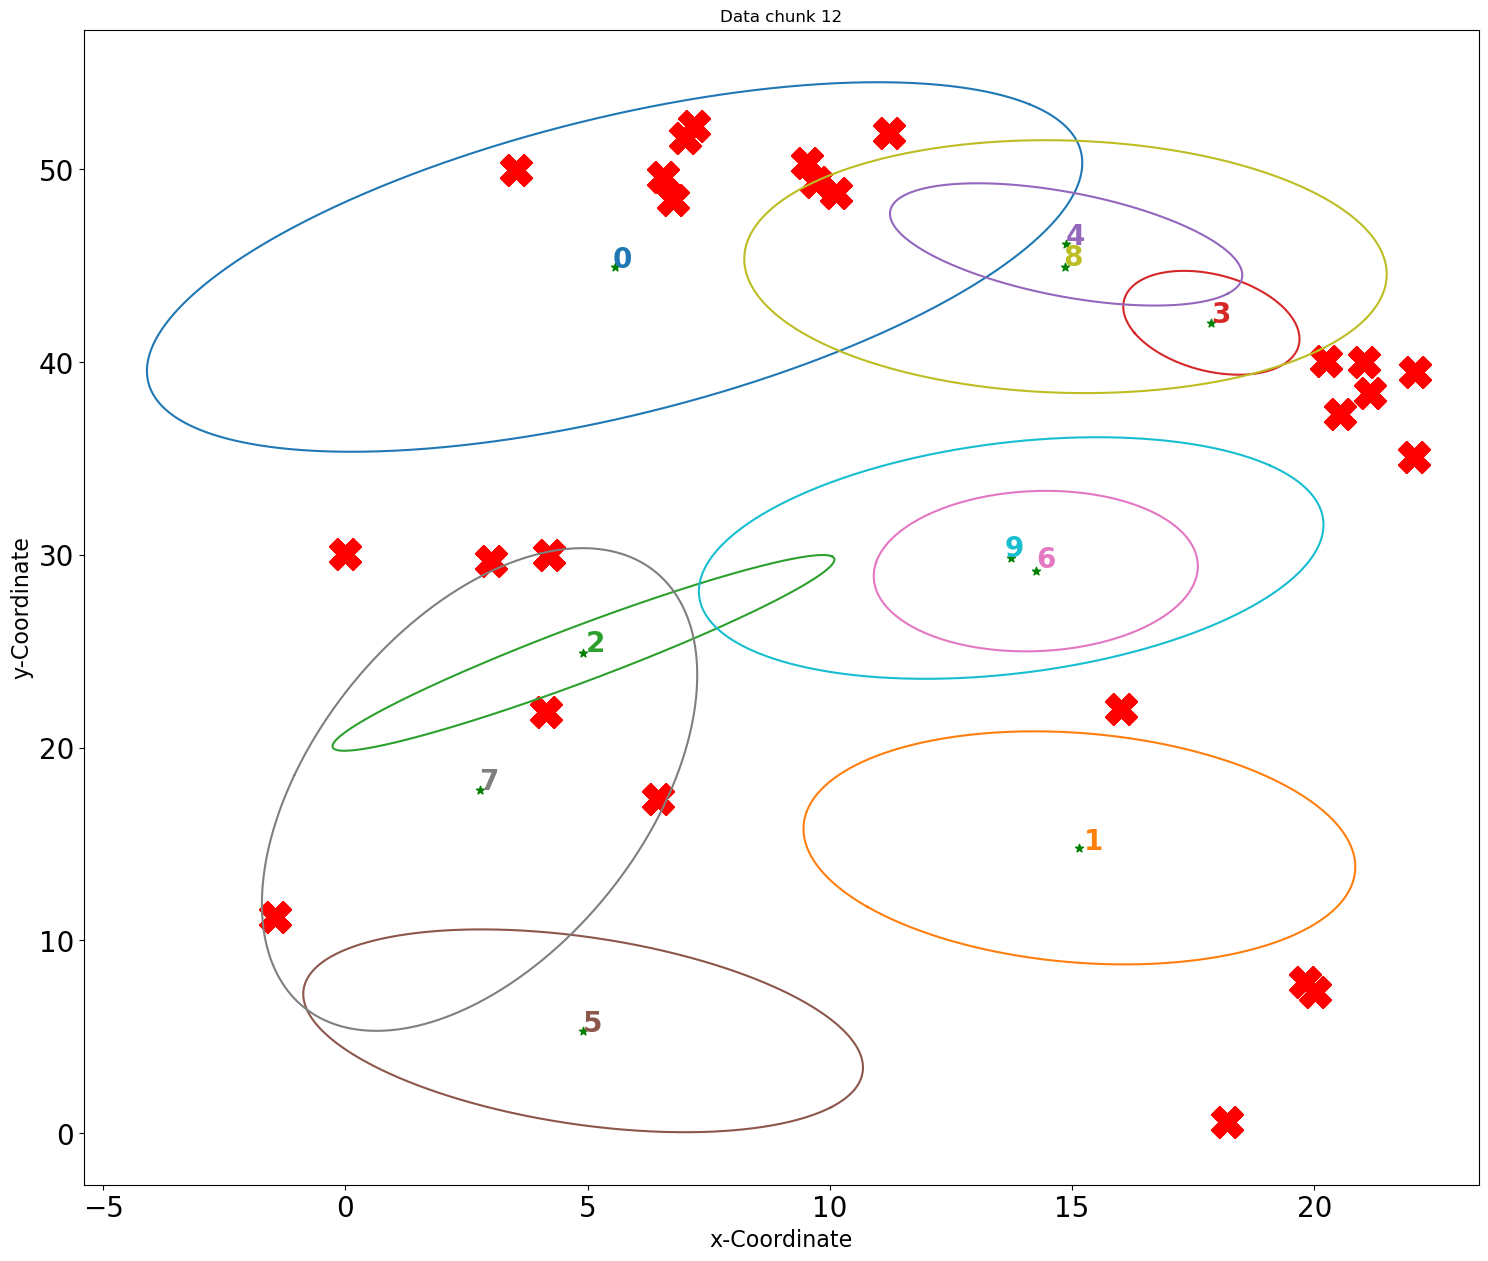

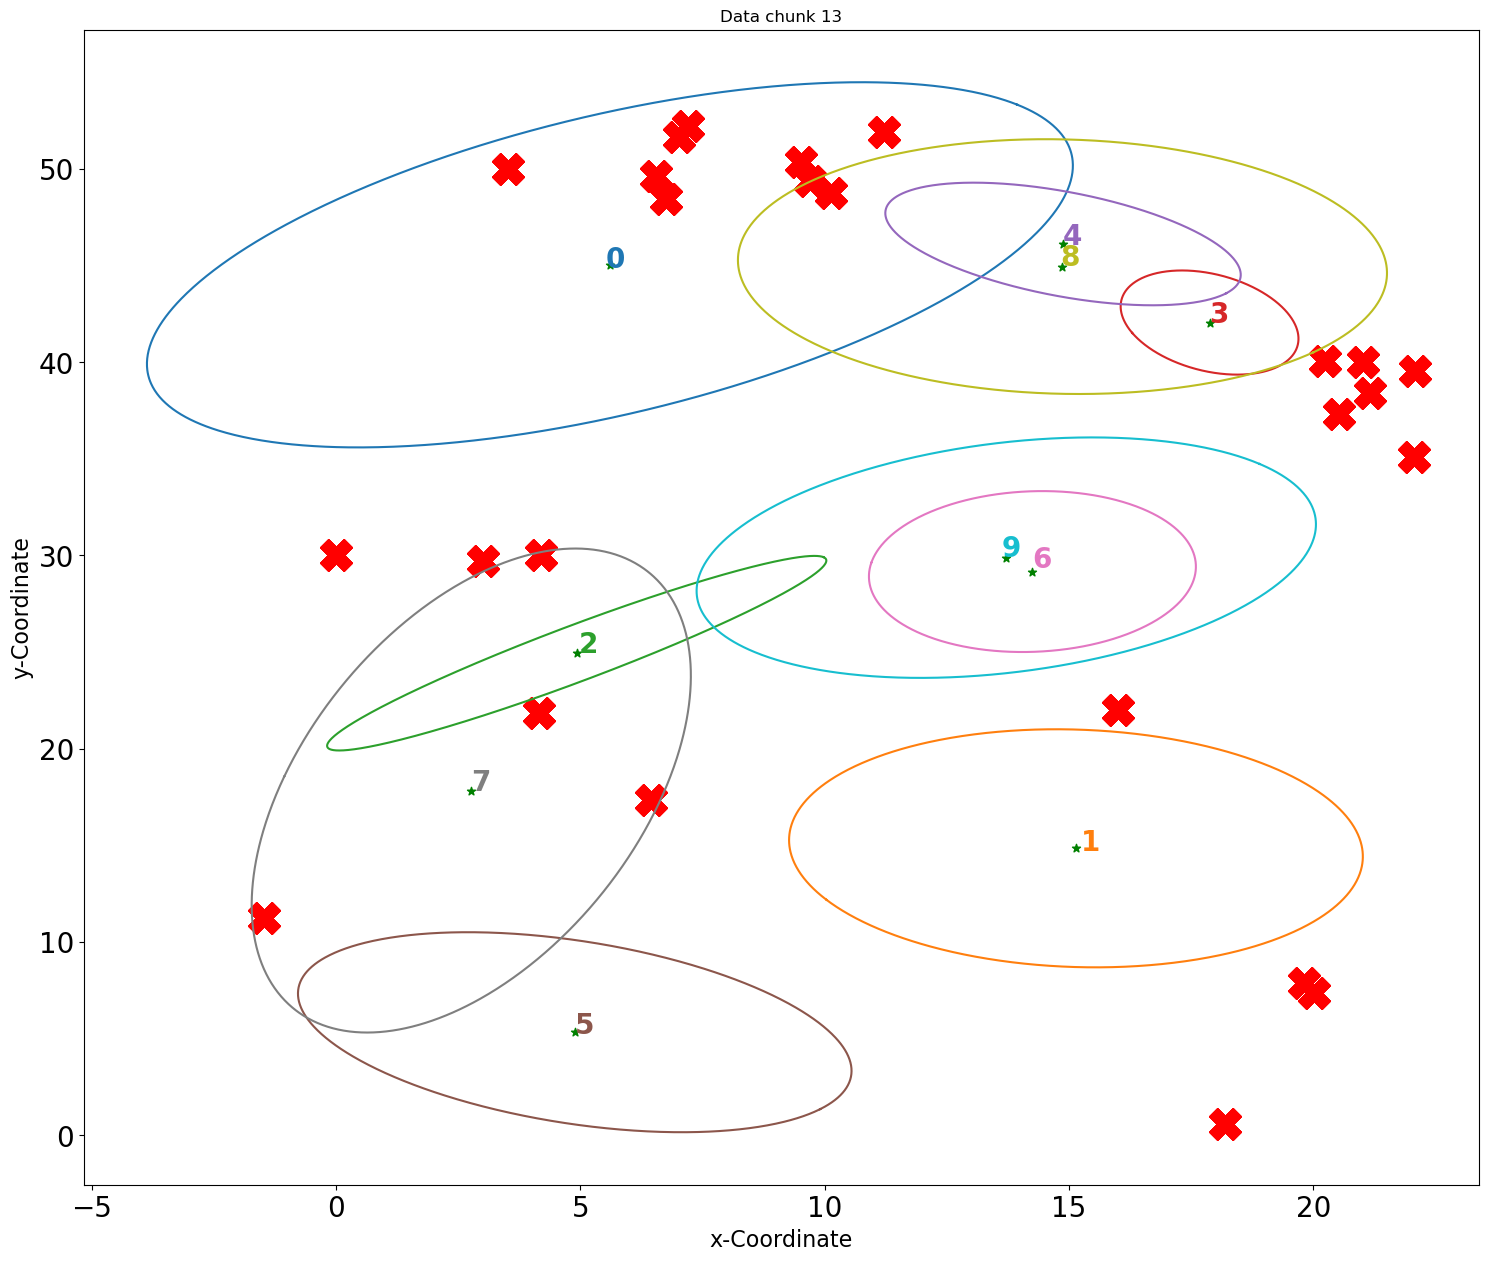

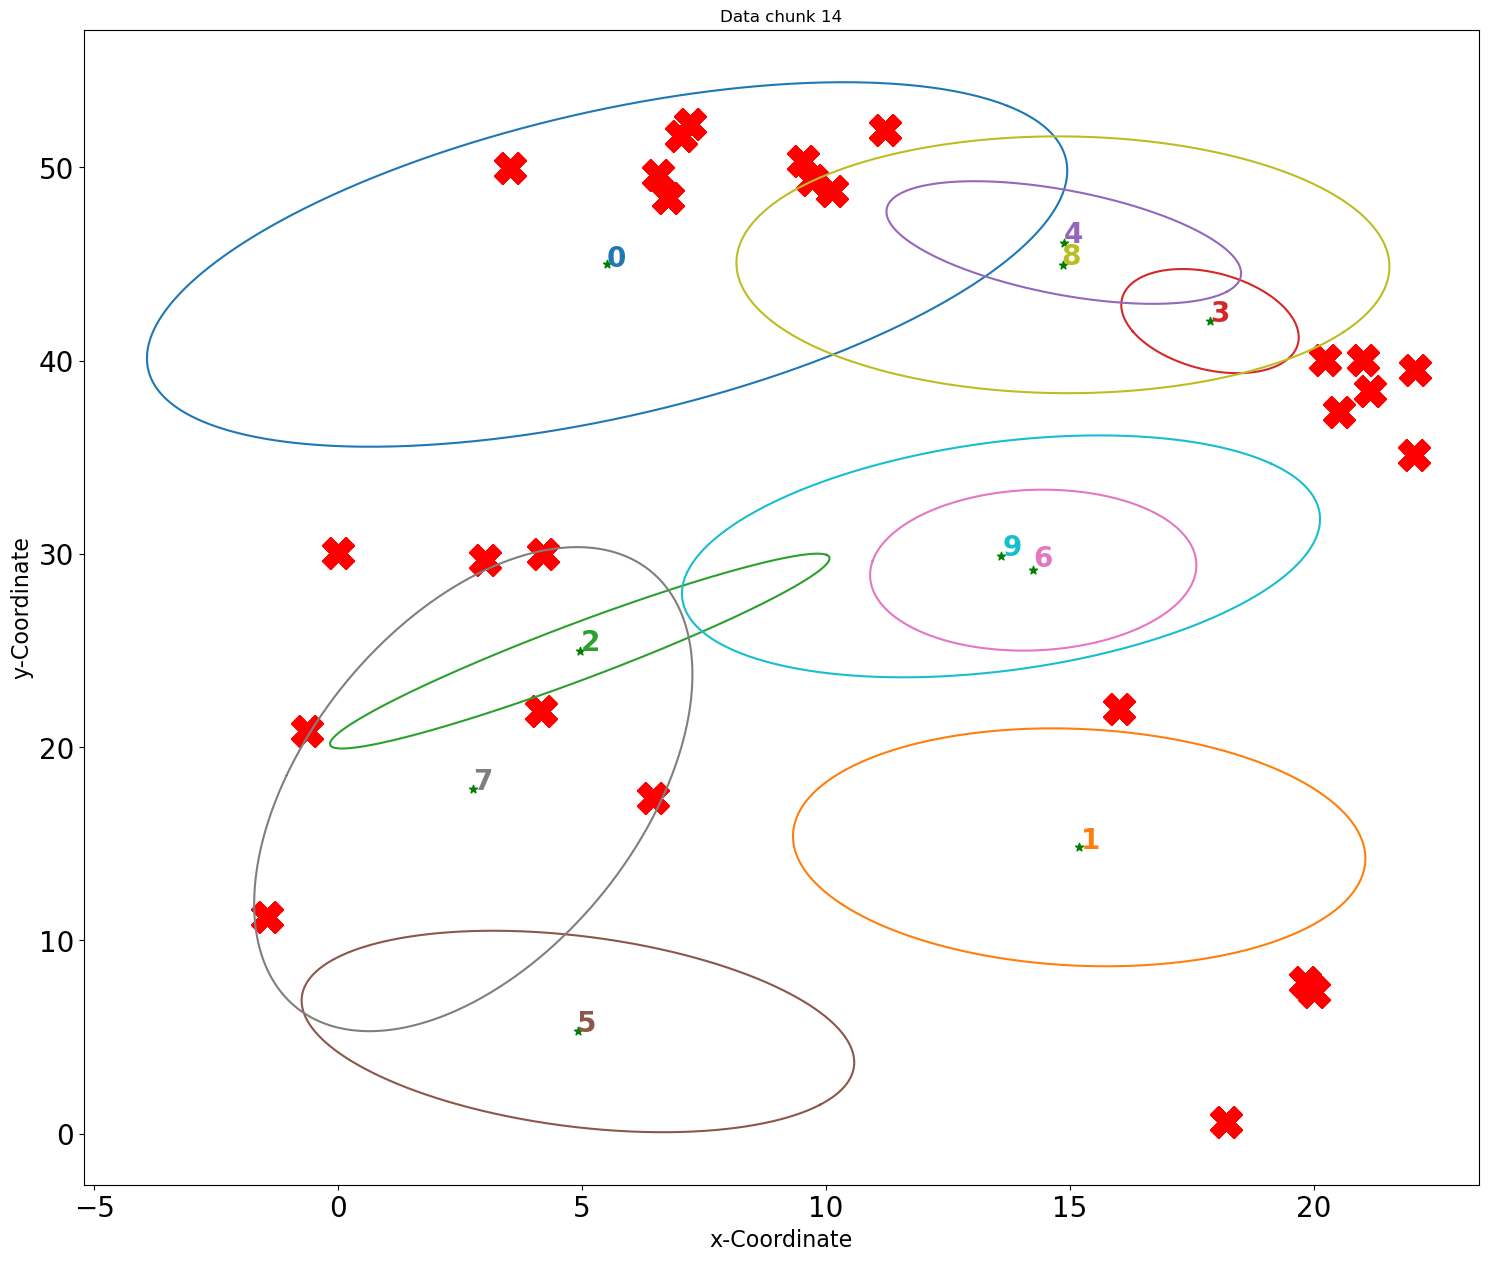

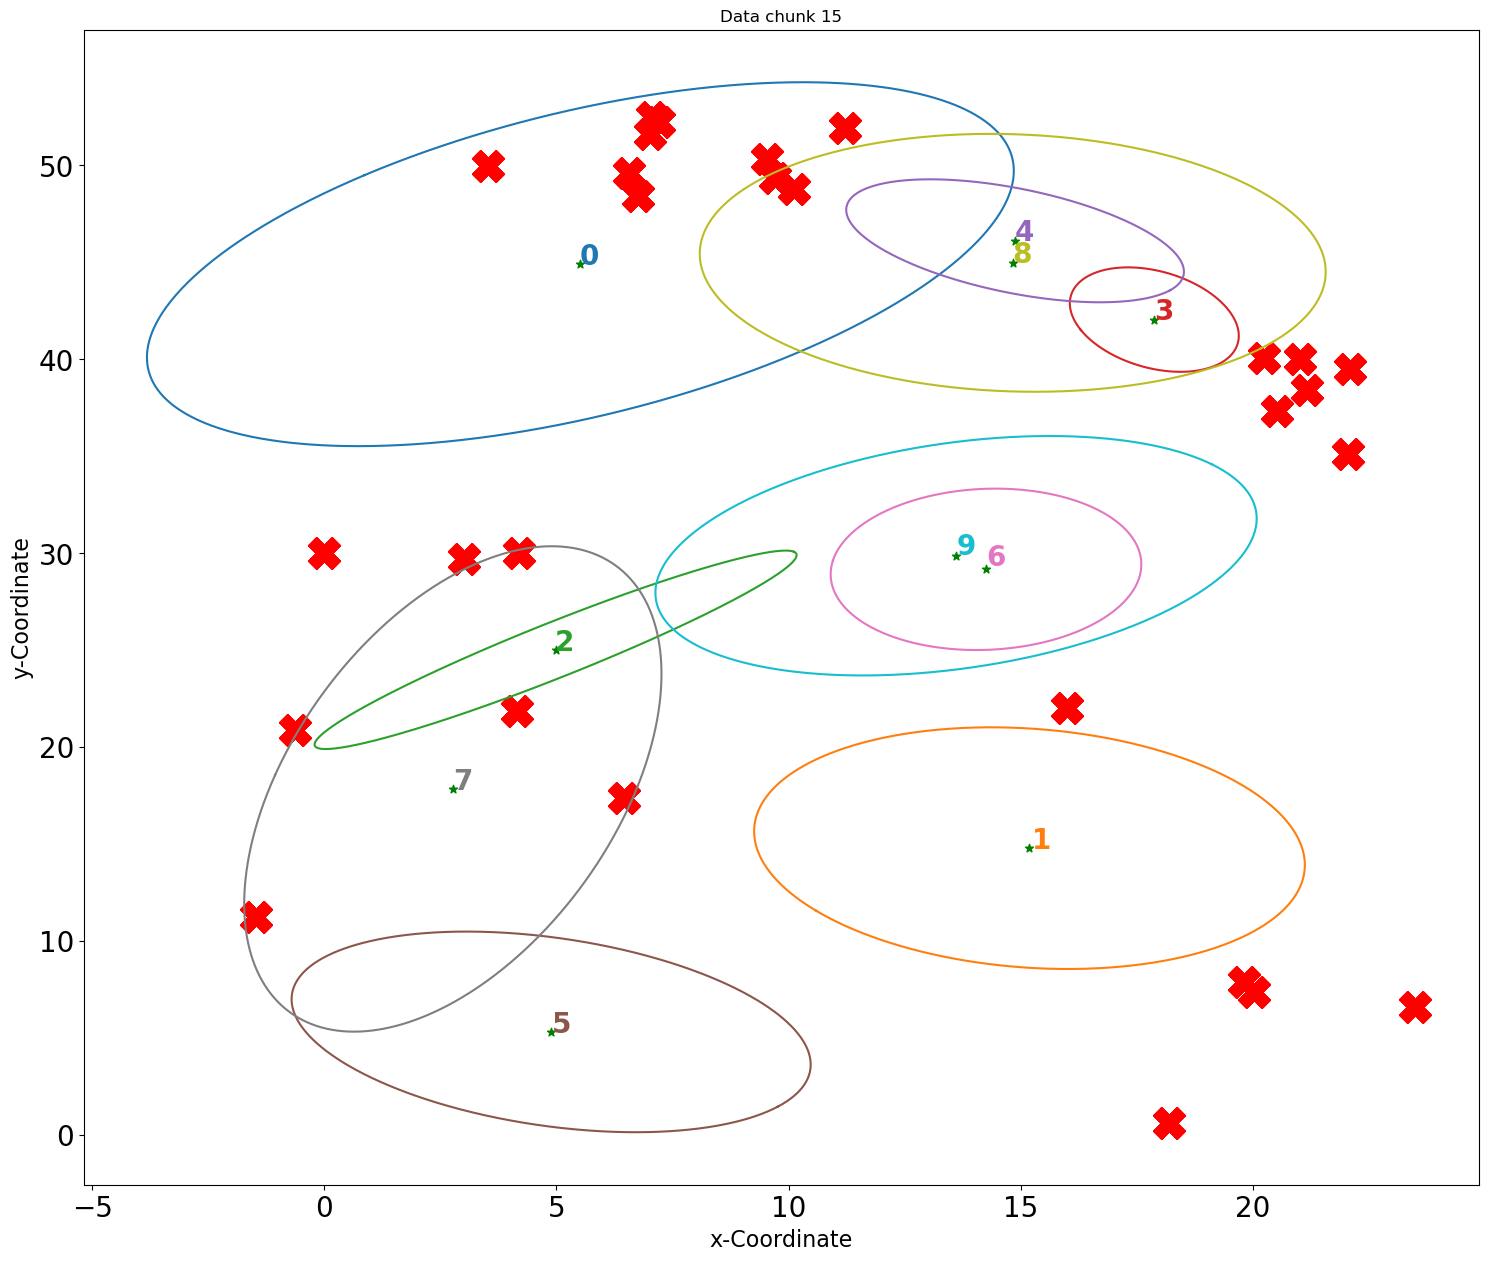

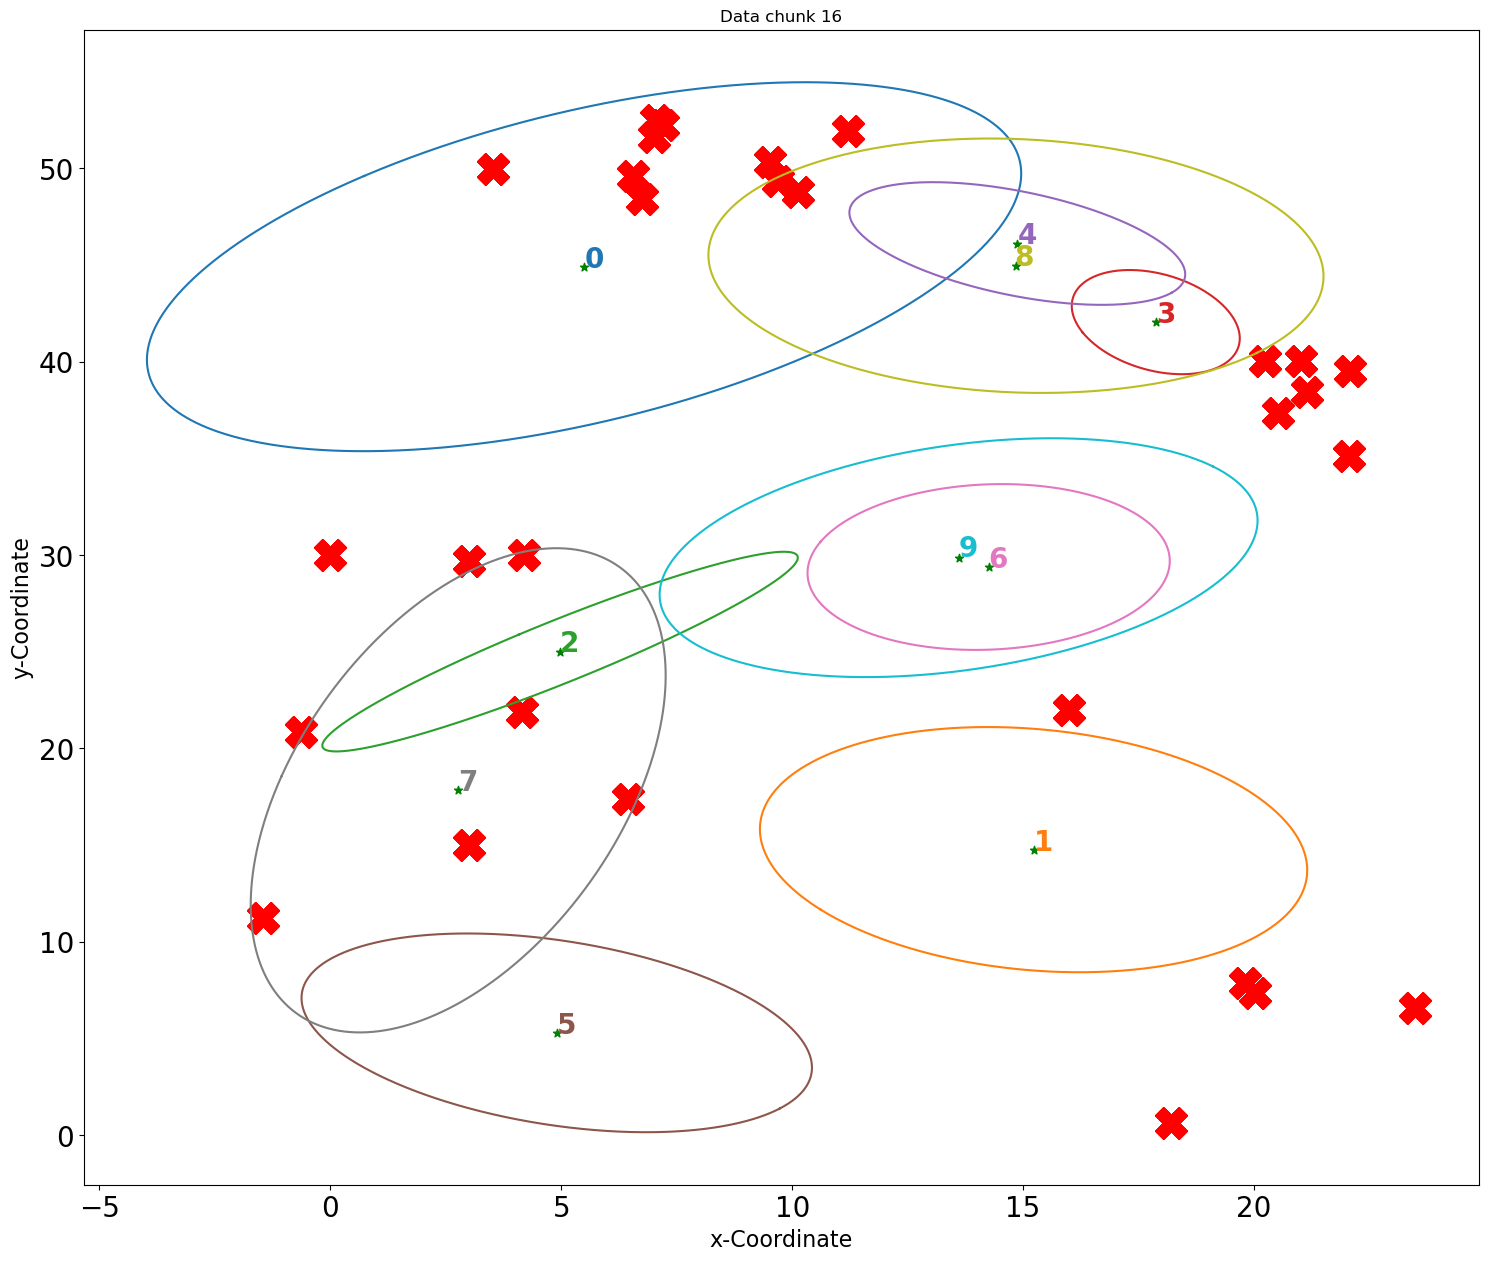

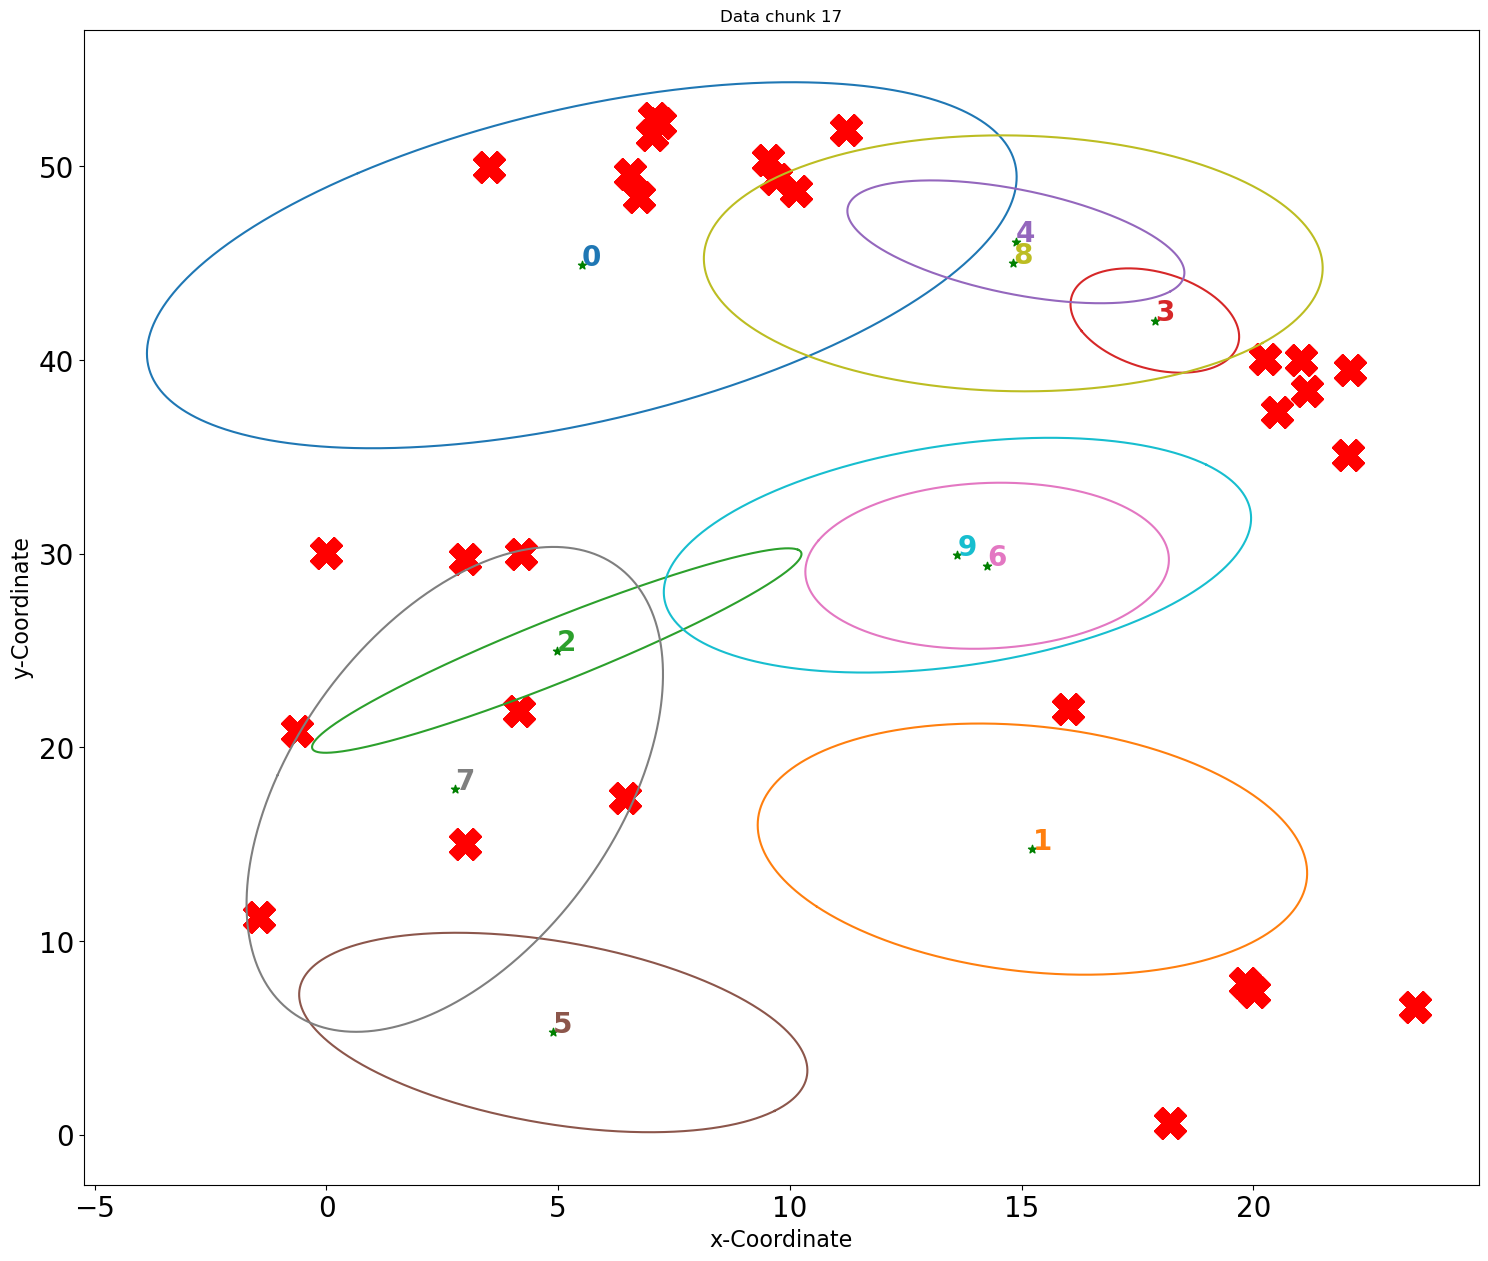

In [3810]:
#chunk indexes
for chunk_index in range(1,len_data_stream): 

    data = pd.read_csv(f'data_stream{chunk_index}.csv',header=None).values
    #data = data_stream[chunk_index].values
    # Number of clusters
    num_clusters = num_clusters
    gmm = GaussianMixture(n_components=num_clusters, random_state=42)
    gmm.fit(data)

    cluster_assignments = gmm.predict(data)
    #Calculate covariance matrices
    covariance_matrices2 = gmm.covariances_
    # Calculate the number of points in each cluster
    cluster_counts2 = np.bincount(cluster_assignments)
    print(cluster_counts2)
    print(sum(cluster_counts))

    # Calculate the entropy of each cluster
    cluster_entropies2 = []
    cluster_centers2 = []


    from scipy.stats import multivariate_normal

    cluster_entropies2 = []
    cluster_data = []

    for cluster_idx in range(num_clusters):
        cluster_data = data[cluster_assignments == cluster_idx]
        cluster_centers2.append(gmm.means_[cluster_idx])
        # Calculate the determinant of the covariance matrix
        covariance_det = np.linalg.det(covariance_matrices2[cluster_idx])
        # Calculate the entropy
        entropy = 0.5 * (len(covariance_matrices2)) * np.log2(2 * np.pi * np.exp(1)) + np.log2(abs(covariance_det))
        cluster_entropies2.append(entropy)
    cluster_centers2 = np.asarray(cluster_centers2)
    cluster_entropies2 = np.asarray(cluster_entropies2)

    new_centers = []
    new_entropies = []
    new_covariance = []
    new_counts = []

    merged_centers = []
    merged_entropies = []
    merged_cluster_counts = []
    maha_distance = []
    merged_covariance = []
    merged_centers, merged_entropies, merged_covariance,merged_cluster_counts = merge_clusters()
    
    # logic to traverse anomalies dataframe and find mahalonobis distance
    for index, row in an_df.iterrows():
        anomaly_cluster_index = int(row["Cluster Index"])
        center = cluster_centers[anomaly_cluster_index]
        covariance_matrix = covariance_matrices[anomaly_cluster_index]
        # Calculate the inverse of the covariance matrix
        inv_covariance_matrix = np.linalg.inv(covariance_matrix)
        # Calculate Mahalanobis distances for anomaly point
        difference = row["Coordinates"] - center
        maha_distance = np.sqrt(np.dot(difference.T, np.dot(inv_covariance_matrix, difference)))
        an_df.at[index ,f"Chunk{chunk_index}"] = float('%.3f'%(maha_distance))

    if len(new_centers) != 0:
        cluster_centers = np.append(cluster_centers , new_centers, axis =0)
        covariance_matrices = np.append(covariance_matrices,new_covariance, axis=0)
        cluster_entropies = np.append(cluster_entropies,new_entropies,axis=0)
        cluster_counts = np.append(cluster_counts,new_counts,axis=0)



    # ploting ellipse function
    plt.figure()
    plt.title(f"Data chunk {chunk_index}")
    plt.rcParams["figure.figsize"] = (18,15)

    for i in range(len(cluster_centers)):
        cluster_data = data[cluster_assignments == i]

        # Plot the cluster's data points #, c=[cmap(cluster_label)]
        # plt.scatter(cluster_data[:, 0], cluster_data[:, 1])

        x_cord = an_df["Coordinates"].apply(lambda x: x[0])
        y_cord = an_df["Coordinates"].apply(lambda x: x[1])
        # if chunk_index ==1:
        plt.scatter(x_cord, y_cord, c='red', s=500, marker='X') # s=500,
        cov = covariance_matrices[i]
        val, rot = np.linalg.eig(cov)
        val = np.sqrt(val)
        center = cluster_centers[i][:, None]
        plt.scatter(center[0], center[1], c='green', marker='*', label='Center')
        t = np.linspace(0, 2.0 * np.pi, 1000)
        xy = np.stack((np.cos(t), np.sin(t)), axis=-1)
        scaling_factor = np.sqrt(5.991)  # For a 2D ellipse and 95% confidence
        # plt.plot(*(rot @ (scaling_factor * val * xy).T + center))
        # plt.annotate(i, xy=center, size=20, weight='bold',backgroundcolor='#FFFFFF')

        # Plot the ellipse and get the color automatically
        plot_handle, = plt.plot(*(rot @ (scaling_factor * val * xy).T + center))  # Get handle
        
        # Extract the color used by `plt.plot()`
        ellipse_color = plot_handle.get_color()  
        if chunk_index==1:
            if(i==4):
                center[1]+=0.5
            if(i==8):
                center[0]+=0.1
                center[1]-=0.5
        # Use the same color for annotation
        plt.annotate(i, xy=center, color=ellipse_color, size=20, weight='bold')
        plt.xlabel('x-Coordinate', fontsize=16)
        plt.ylabel('y-Coordinate', fontsize=16)
        plt.xticks(fontsize=20)  # X-axis tick labels
        plt.yticks(fontsize=20)
    concept_drift.append(cluster_counts.tolist())
    plt.savefig(f'Alldataclusters{chunk_index}.png',bbox_inches='tight')

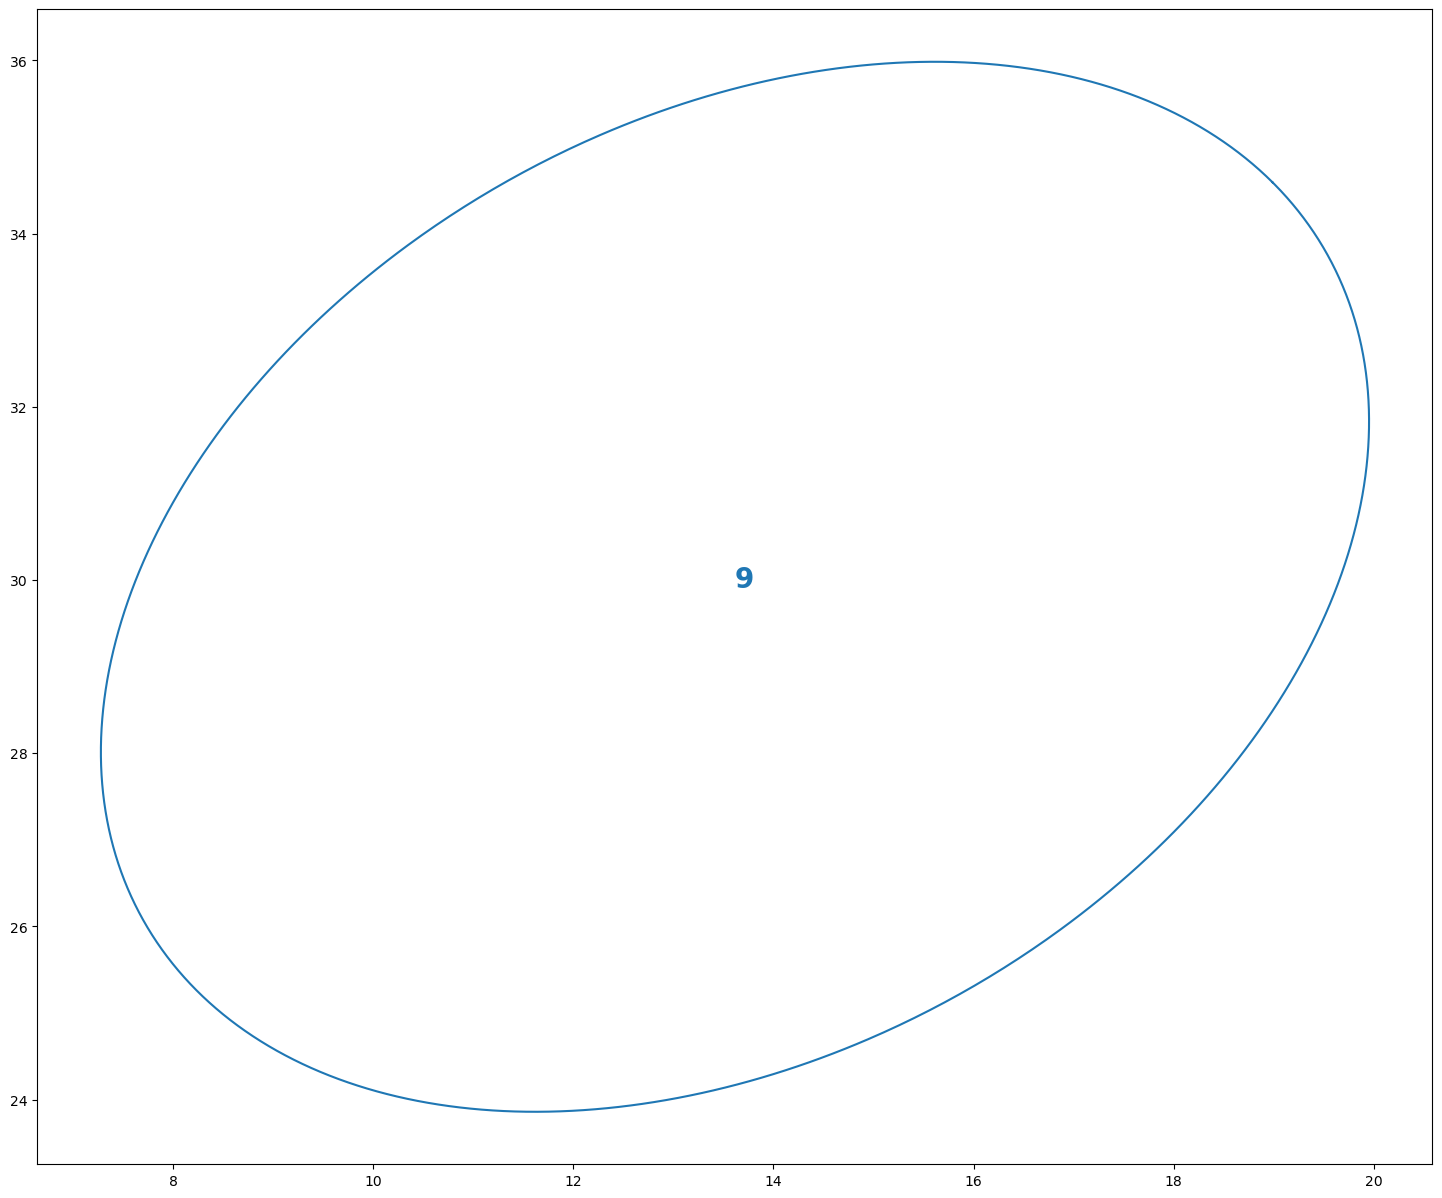

In [3811]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the ellipse and get the color automatically
plot_handle, = plt.plot(*(rot @ (scaling_factor * val * xy).T + center))  # Get handle

# Extract the color used by `plt.plot()`
ellipse_color = plot_handle.get_color()  

# Use the same color for annotation
plt.annotate(i, xy=center, color=ellipse_color, size=20, weight='bold', backgroundcolor='#FFFFFF')

plt.show()


In [3812]:
len(covariance_matrices)

10

In [3813]:
len(cluster_centers)

10

In [3814]:
an_df

Coordinates  Cluster Index  Chunk1  Chunk2  \
0     [20.015346273035533, 7.339478356510949]            1.0   3.144   3.314   
1      [9.703454272608736, 49.34772859602885]            8.0     NaN   3.484   
2    [10.121096052693968, 48.753501125450825]            8.0     NaN   3.149   
3     [20.24089523855905, 40.046938906477024]            8.0     NaN   3.124   
4   [-1.4640755918800137, 11.217716705172323]            5.0     NaN     NaN   
5                                [0.0, 30.02]            9.0     NaN     NaN   
6      [4.147240647852756, 21.85288676775457]            2.0     NaN     NaN   
7     [11.214690039460002, 51.90420857016623]            8.0     NaN     NaN   
8      [20.51928525871285, 37.32426225262073]            8.0     NaN     NaN   
9                                 [4.2, 30.0]            2.0     NaN     NaN   
10    [6.447504131887701, 17.360731009351465]            9.0     NaN     NaN   
11    [9.524158557296264, 50.328104638375486]            8.0     NaN     NaN   
12                              [22.05, 35.1]            8.0     NaN     NaN   
13    [21.018051062166457, 40.02264657591962]            8.0     NaN     NaN   
14     [7.017290243434317, 51.62560840587737]            8.0     NaN     NaN   
15                                [3.0, 29.7]            2.0     NaN     NaN   
16                               [16.0, 22.0]            1.0     NaN     NaN   
17    [19.81210223643309, 7.8496141863958835]            1.0     NaN     NaN   
18    [22.079957194205846, 39.50825521584187]            8.0     NaN     NaN   
19     [21.15218388763627, 38.40052281084861]            8.0     NaN     NaN   
20     [6.753671129746948, 48.41227419334808]            8.0     NaN     NaN   
21     [6.558456404176639, 49.61479479298255]            8.0     NaN     NaN   
22     [3.51782774358535, 49.965773691713736]            8.0     NaN     NaN   
23                                [18.2, 0.6]            5.0     NaN     NaN   
24    [7.2043104183481805, 52.23180274861675]            8.0     NaN     NaN   
25   [-0.6395335884967066, 20.84919451177214]            2.0     NaN     NaN   
26      [23.49056810612297, 6.58703747709075]            1.0     NaN     NaN   
27     [7.06158234090888, 52.501996996858914]            8.0     NaN     NaN   
28                                [3.0, 15.0]            2.0     NaN     NaN   

    Chunk3  Chunk4  Chunk5  Chunk6  Chunk7  Chunk8  Chunk9  Chunk10  Chunk11  \
0    3.327   3.396   3.274   3.288   3.350   3.371   3.362    3.285    3.398   
1    3.856   3.192   2.973   2.960   2.939   2.753   2.738    2.616    2.488   
2    3.483   2.878   2.683   2.661   2.643   2.474   2.456    2.349    2.228   
3    3.519   3.067   2.867   3.006   2.992   2.848   2.906    2.722    2.698   
4    3.061   3.110   3.097   3.330   3.428   3.418   3.356    3.324    3.231   
5    4.412   4.878   5.267   5.271   5.379   5.494   5.507    5.484    5.316   
6      NaN   3.815   3.799   3.843   3.812   3.726   3.726    3.759    3.735   
7      NaN   3.609   3.380   3.360   3.314   3.145   3.141    3.017    2.895   
8      NaN     NaN   3.771   3.926   3.889   3.711   3.787    3.567    3.523   
9      NaN     NaN   9.103   9.227   9.230   8.968   8.998    9.023    9.038   
10     NaN     NaN     NaN   5.111   5.410   5.766   5.876    5.518    5.066   
11     NaN     NaN     NaN   3.298   3.271   3.068   3.059    2.922    2.785   
12     NaN     NaN     NaN     NaN   5.014   4.779   4.866    4.592    4.521   
13     NaN     NaN     NaN     NaN   3.251   3.092   3.148    2.949    2.919   
14     NaN     NaN     NaN     NaN     NaN   4.157   4.152    3.953    3.786   
15     NaN     NaN     NaN     NaN     NaN  10.283  10.313   10.338   10.359   
16     NaN     NaN     NaN     NaN     NaN   3.212   3.089    3.108    2.966   
17     NaN     NaN     NaN     NaN     NaN     NaN   3.157    3.084    3.193   
18     NaN     NaN     NaN     NaN     NaN     NaN     NaN    3.385    3.343   
19     NaN     NaN     NaN     Na

In [3815]:
x_cord = an_df["Coordinates"].apply(lambda x: x[0])
y_cord = an_df["Coordinates"].apply(lambda x: x[1])

In [3816]:
concept_drift

[[20, 29, 41, 7, 42, 22, 16, 2],
 [54, 60, 85, 7, 42, 49, 27, 6, 28],
 [74, 81, 138, 7, 42, 74, 27, 6, 65, 23],
 [86, 107, 187, 7, 42, 97, 27, 6, 114, 43],
 [105, 137, 230, 7, 42, 125, 27, 6, 157, 59],
 [124, 161, 273, 7, 42, 153, 27, 6, 201, 80],
 [141, 184, 316, 7, 42, 183, 27, 6, 244, 103],
 [153, 215, 358, 7, 42, 211, 27, 6, 293, 120],
 [167, 231, 400, 7, 42, 240, 27, 6, 349, 142],
 [181, 257, 455, 7, 42, 267, 27, 6, 396, 152],
 [197, 282, 499, 7, 42, 293, 27, 6, 447, 169],
 [211, 312, 544, 7, 42, 316, 39, 6, 497, 174],
 [226, 342, 582, 7, 42, 336, 39, 6, 550, 197],
 [245, 371, 626, 7, 42, 369, 39, 6, 591, 210],
 [262, 399, 670, 7, 42, 396, 39, 6, 642, 222],
 [271, 434, 722, 7, 42, 422, 39, 6, 688, 233],
 [290, 466, 767, 7, 42, 452, 59, 6, 721, 233],
 [308, 491, 805, 7, 42, 486, 59, 6, 770, 248]]

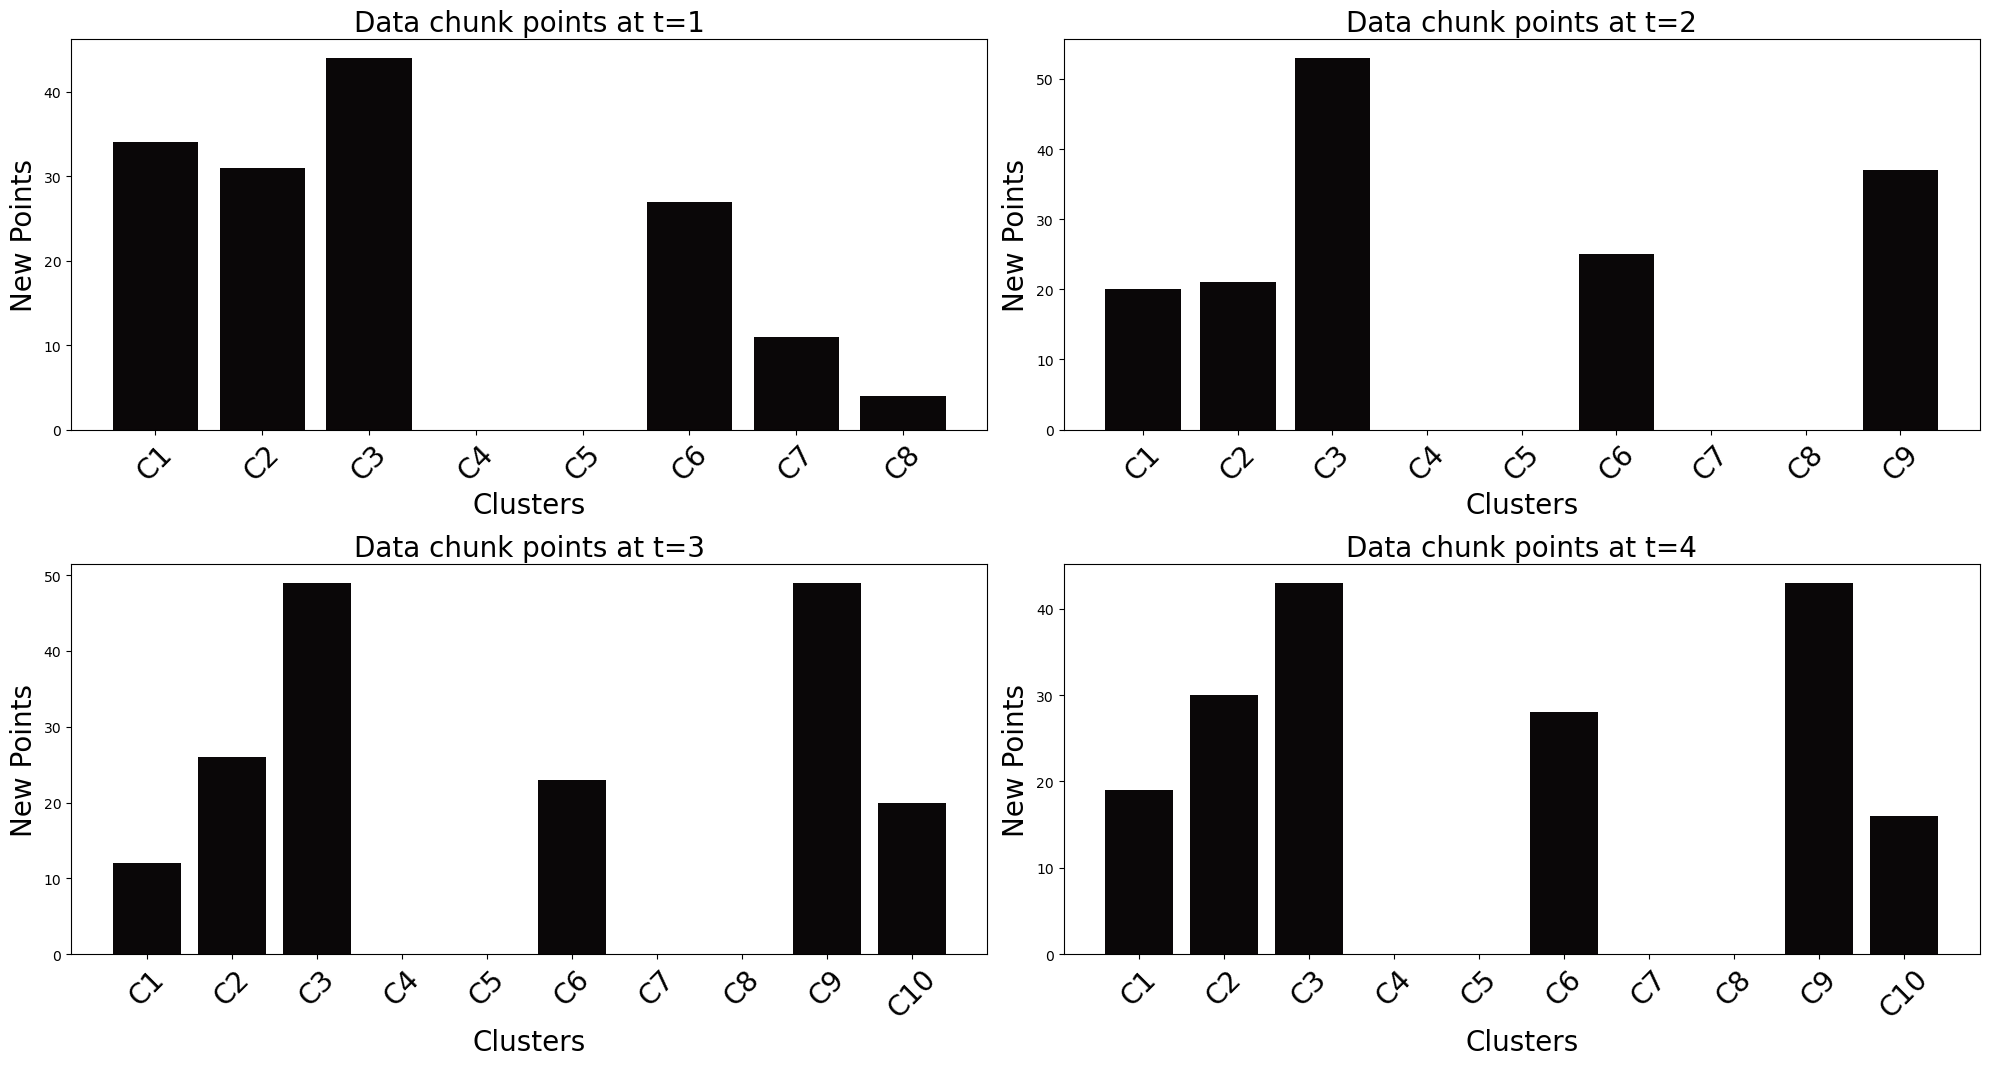

In [3868]:
import matplotlib.pyplot as plt
import numpy as np

# Matrix representing the number of points in each cluster over time
data = [[20, 29, 41, 7, 42, 22, 16, 2],
 [54, 60, 85, 7, 42, 49, 27, 6, 28],
 [74, 81, 138, 7, 42, 74, 27, 6, 65, 23],
 [86, 107, 187, 7, 42, 97, 27, 6, 114, 43],
 [105, 137, 230, 7, 42, 125, 27, 6, 157, 59],
 [124, 161, 273, 7, 42, 153, 27, 6, 201, 80],
 [141, 184, 316, 7, 42, 183, 27, 6, 244, 103],
 [153, 215, 358, 7, 42, 211, 27, 6, 293, 120],
 [167, 231, 400, 7, 42, 240, 27, 6, 349, 142],
 [181, 257, 455, 7, 42, 267, 27, 6, 396, 152],
 [197, 282, 499, 7, 42, 293, 27, 6, 447, 169],
 [211, 312, 544, 7, 42, 316, 39, 6, 497, 174],
 [226, 342, 582, 7, 42, 336, 39, 6, 550, 197],
 [245, 371, 626, 7, 42, 369, 39, 6, 591, 210],
 [262, 399, 670, 7, 42, 396, 39, 6, 642, 222],
 [271, 434, 722, 7, 42, 422, 39, 6, 688, 233],
 [290, 466, 767, 7, 42, 452, 59, 6, 721, 233],
 [308, 491, 805, 7, 42, 486, 59, 6, 770, 248]]

# Create subplots grid
num_time_frames = 5
cols = 2  # Number of columns for the grid
rows = (num_time_frames // cols) + (num_time_frames % cols > 0)  # Calculate rows based on the number of time frames

fig, axes = plt.subplots(rows, cols, figsize=(20, 15))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the 2D array of axes

# Plot bar plots for each time frame
for t in range(1, num_time_frames):  # Start from t=1 (since t=0 has no prior data)
    ax = axes[t-1]  # Align t=1 with the first subplot (axes[0])
    
    num_points_per_cluster = data[t]
    previous_points = data[t-1]
    
    # Calculate the minimum length of the clusters to avoid shape mismatch
    min_length = min(len(num_points_per_cluster), len(previous_points))
    
    # Calculate the new points (difference from t-1)
    new_points = np.array(num_points_per_cluster[:min_length]) - np.array(previous_points[:min_length])
    new_points[new_points < 0] = 0  # Ensure no negative values
    
    # Create bar plot for new points only
    x_positions = np.arange(min_length)
    ax.bar(x_positions, new_points, color='#0A0708', label='New Points')
    
    # Set titles and labels
    ax.set_title(f'Data chunk points at t={t}', size=20)
    ax.set_xlabel('Clusters', size=20)
    ax.set_ylabel('New Points', size=20)
    ax.set_xticks(x_positions)
    ax.set_xticklabels([f'C{i+1}' for i in x_positions], size=20, rotation=45)

# Hide any unused subplots (if there are more than required)
for t in range(num_time_frames-1, len(axes)):
    fig.delaxes(axes[t])
# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

import matplotlib.pyplot as plt
import numpy as np

# Matrix representing the number of points in each cluster over time
data = [[20, 29, 41, 7, 42, 22, 16, 2],
 [54, 60, 85, 7, 42, 49, 27, 6, 28],
 [74, 81, 138, 7, 42, 74, 27, 6, 65, 23],
 [86, 107, 187, 7, 42, 97, 27, 6, 114, 43],
 [105, 137, 230, 7, 42, 125, 27, 6, 157, 59],
 [124, 161, 273, 7, 42, 153, 27, 6, 201, 80],
 [141, 184, 316, 7, 42, 183, 27, 6, 244, 103],
 [153, 215, 358, 7, 42, 211, 27, 6, 293, 120],
 [167, 231, 400, 7, 42, 240, 27, 6, 349, 142],
 [181, 257, 455, 7, 42, 267, 27, 6, 396, 152],
 [197, 282, 499, 7, 42, 293, 27, 6, 447, 169],
 [211, 312, 544, 7, 42, 316, 39, 6, 497, 174],
 [226, 342, 582, 7, 42, 336, 39, 6, 550, 197],
 [245, 371, 626, 7, 42, 369, 39, 6, 591, 210],
 [262, 399, 670, 7, 42, 396, 39, 6, 642, 222],
 [271, 434, 722, 7, 42, 422, 39, 6, 688, 233],
 [290, 466, 767, 7, 42, 452, 59, 6, 721, 233],
 [308, 491, 805, 7, 42, 486, 59, 6, 770, 248]]
# Create subplots grid
num_time_frames = len(data)
cols = 4  # Number of columns for the grid
rows = (num_time_frames // cols) + (num_time_frames % cols > 0)  # Calculate rows based on the number of time frames

fig, axes = plt.subplots(rows, cols, figsize=(20, 15))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the 2D array of axes

# Plot bar plots for each time frame
for t in range(num_time_frames):
    ax = axes[t]
    num_points_per_cluster = data[t]
    x_positions = np.arange(len(num_points_per_cluster))
    
    # Create bar plot
    ax.bar(x_positions, num_points_per_cluster, color='skyblue')
    
    # Set titles and labels
    ax.set_title(f'Time t={t}')
    ax.set_xlabel('Clusters')
    ax.set_ylabel('Points')
    ax.set_xticks(x_positions)
    ax.set_xticklabels([f'C{i+1}' for i in x_positions], rotation=45)

# Hide any unused subplots
for t in range(num_time_frames, len(axes)):
    fig.delaxes(axes[t])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


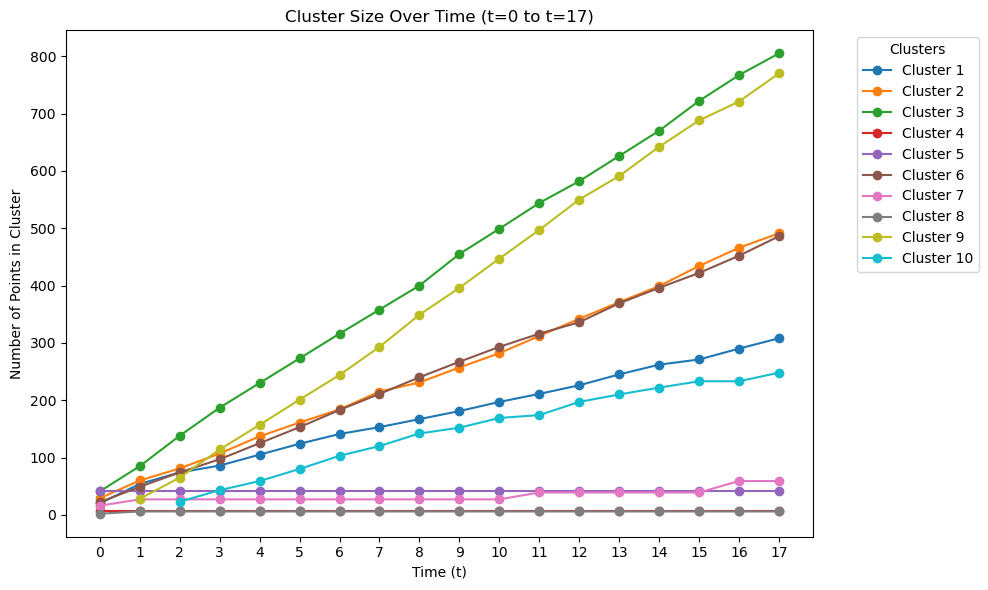

In [3707]:
import matplotlib.pyplot as plt
import numpy as np

# Matrix representing the number of points in each cluster over time
data = concept_drift

# Number of time frames (t=0 to t=17, so 18 time frames)
time_frames = range(len(data))

# Determine the maximum number of clusters over all time frames
max_num_clusters = max(len(frame) for frame in data)

# Initialize an array with None values to store cluster time series
cluster_series = np.full((max_num_clusters, len(time_frames)), None)

# Populate the cluster_series array with the number of points for each cluster across time
for t, time_frame in enumerate(data):
    for cluster_id, points in enumerate(time_frame):
        cluster_series[cluster_id, t] = points

# Create a time series plot for each cluster
plt.figure(figsize=(10, 6))

for cluster_id in range(max_num_clusters):
    cluster_points = cluster_series[cluster_id]
    if np.any(cluster_points):  # Only plot clusters that have data
        plt.plot(time_frames, cluster_points, label=f'Cluster {cluster_id + 1}', marker='o')

# Set plot labels and title
plt.xlabel('Time (t)')
plt.ylabel('Number of Points in Cluster')
plt.title('Cluster Size Over Time (t=0 to t=17)')
plt.xticks(time_frames)  # Show all time frames as x-ticks
plt.legend(title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left')

# Tight layout to adjust spacing
plt.tight_layout()

# Show the plot
plt.show()

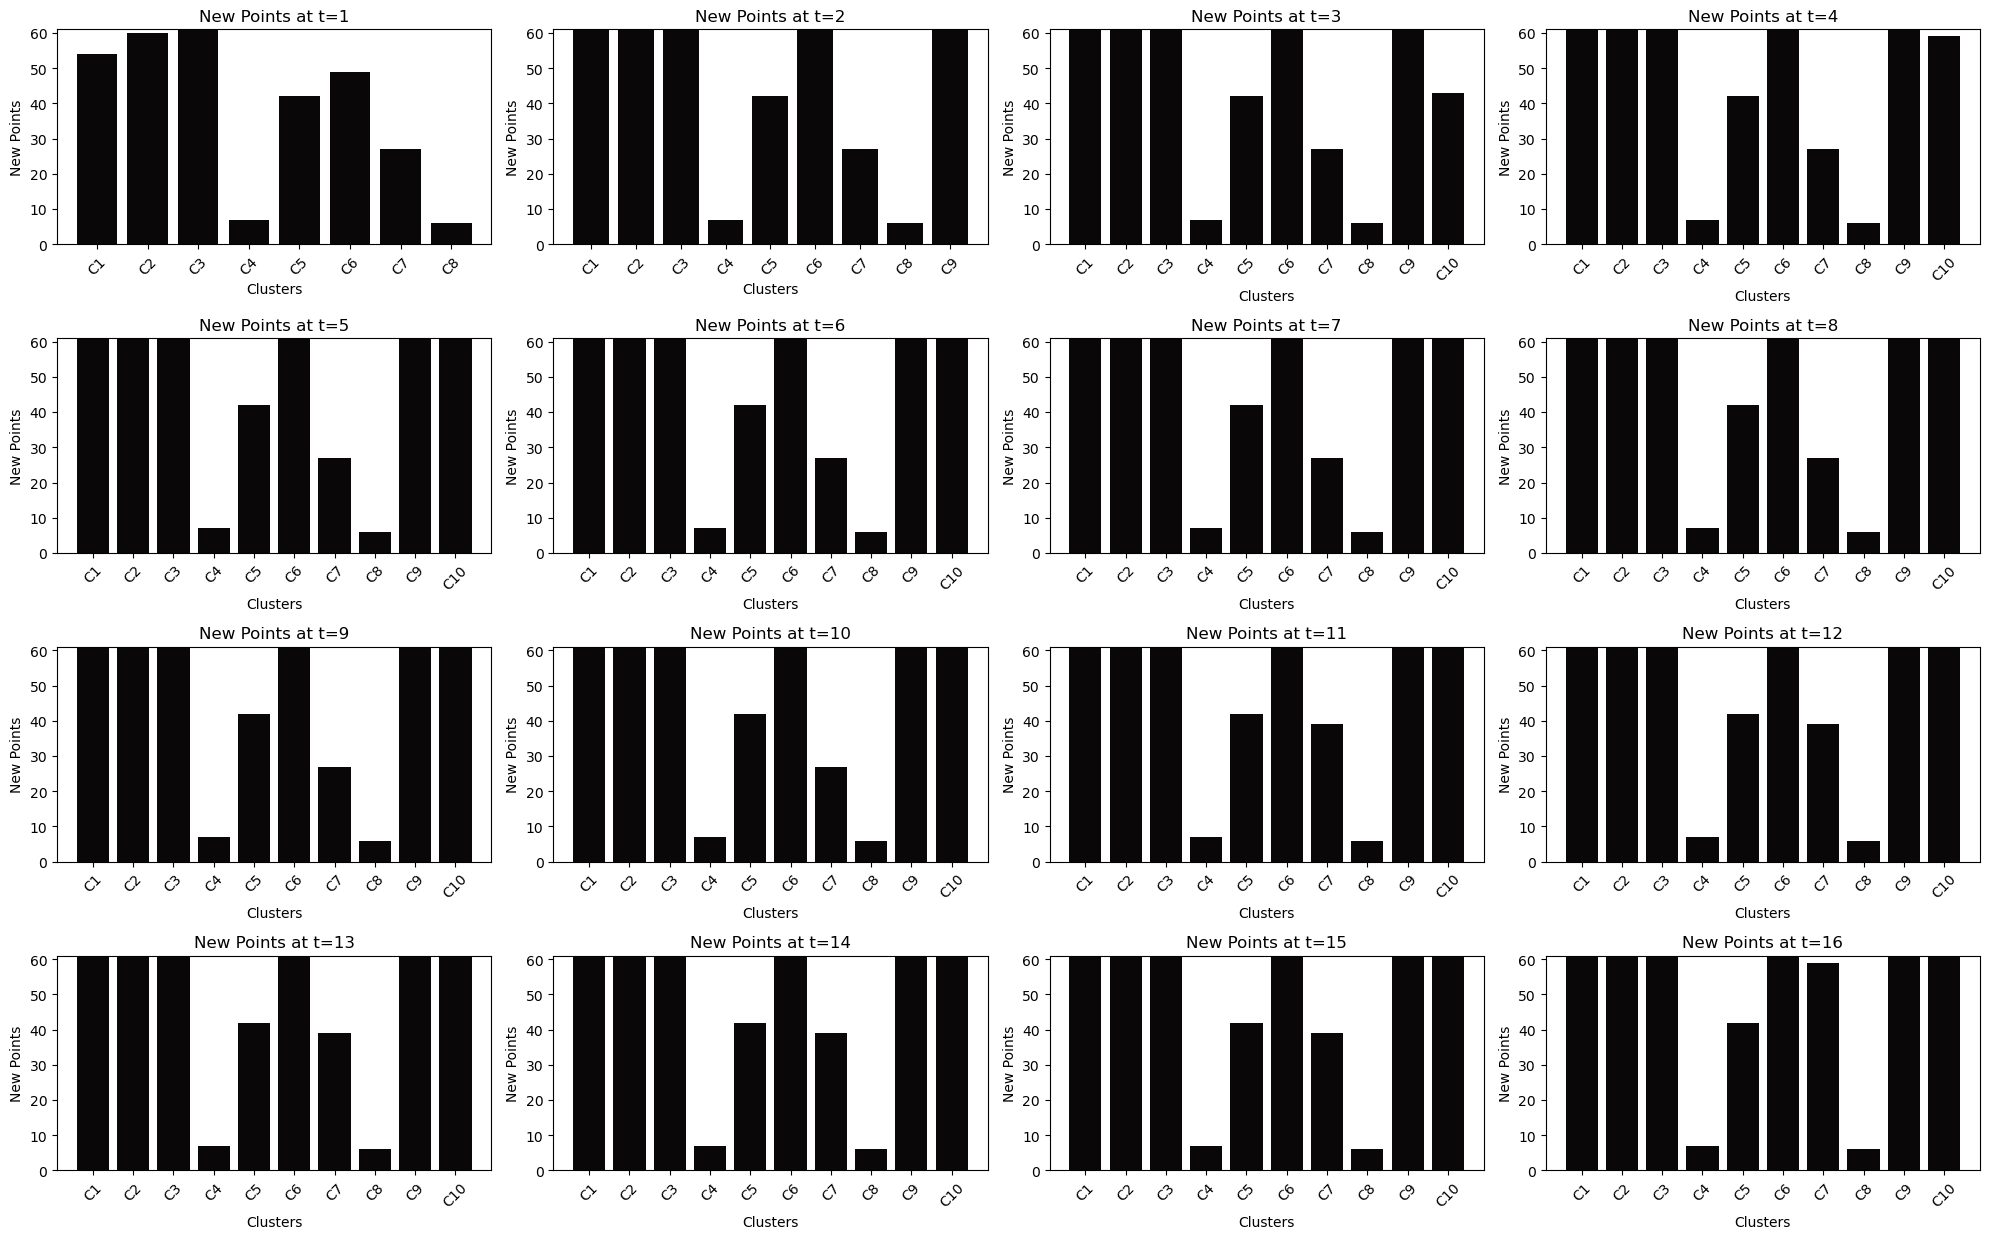

In [3708]:
import matplotlib.pyplot as plt
import numpy as np

# Matrix representing the number of points in each cluster over time
data = [
    [20, 29, 41, 7, 42, 22, 16, 2],
    [54, 60, 85, 7, 42, 49, 27, 6, 28],
    [74, 81, 138, 7, 42, 74, 27, 6, 65, 23],
    [86, 107, 187, 7, 42, 97, 27, 6, 114, 43],
    [105, 137, 230, 7, 42, 125, 27, 6, 157, 59],
    [124, 161, 273, 7, 42, 153, 27, 6, 201, 80],
    [141, 184, 316, 7, 42, 183, 27, 6, 244, 103],
    [153, 215, 358, 7, 42, 211, 27, 6, 293, 120],
    [167, 231, 400, 7, 42, 240, 27, 6, 349, 142],
    [181, 257, 455, 7, 42, 267, 27, 6, 396, 152],
    [197, 282, 499, 7, 42, 293, 27, 6, 447, 169],
    [211, 312, 544, 7, 42, 316, 39, 6, 497, 174],
    [226, 342, 582, 7, 42, 336, 39, 6, 550, 197],
    [245, 371, 626, 7, 42, 369, 39, 6, 591, 210],
    [262, 399, 670, 7, 42, 396, 39, 6, 642, 222],
    [271, 434, 722, 7, 42, 422, 39, 6, 688, 233],
    [290, 466, 767, 7, 42, 452, 59, 6, 721, 233]
]

# Determine the maximum new points for y-axis limit
max_new_points = 0
for t in range(1, len(data)):
    min_length = min(len(data[t]), len(data[t-1]))
    new_points = np.array(data[t][:min_length]) - np.array(data[t-1][:min_length])
    max_new_points = max(max_new_points, np.max(new_points))

# Create subplots grid
num_time_frames = len(data)
cols = 4  # Number of columns for the grid
rows = (num_time_frames // cols) + (num_time_frames % cols > 0)  # Calculate rows based on the number of time frames

fig, axes = plt.subplots(rows, cols, figsize=(20, 15))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the 2D array of axes

# Plot bar plots for each time frame
for t in range(1, num_time_frames):  # Start from t=1 (since t=0 has no prior data)
    ax = axes[t-1]  # Align t=1 with the first subplot (axes[0])
    
    num_points_per_cluster = data[t]
    previous_points = data[t-1]
    
    # Calculate the minimum length of the clusters to avoid shape mismatch
    min_length = min(len(num_points_per_cluster), len(previous_points))
    
    # Calculate the new points (difference from t-1)
    new_points = np.array(num_points_per_cluster[:min_length]) #- np.array(previous_points[:min_length])
    new_points[new_points < 0] = 0  # Ensure no negative values
    
    # Create bar plot for new points only
    x_positions = np.arange(min_length)
    ax.bar(x_positions, new_points, color='#0A0708', label='New Points')
    
    # Set a fixed y-axis limit for consistent scale
    ax.set_ylim(0, max_new_points + 5)  # Add a little buffer to max value for better visualization
    
    # Set titles and labels
    ax.set_title(f'New Points at t={t}')
    ax.set_xlabel('Clusters')
    ax.set_ylabel('New Points')
    ax.set_xticks(x_positions)
    ax.set_xticklabels([f'C{i+1}' for i in x_positions], rotation=45)

# Hide any unused subplots (if there are more than required)
for t in range(num_time_frames-1, len(axes)):
    fig.delaxes(axes[t])

# Adjust layout to prevent overlap
plt.tight_layout()

#


In [3709]:
cluster_centers

array([[ 5.50941667, 44.89540564],
       [15.23293177, 14.74300471],
       [ 4.9694452 , 24.9977119 ],
       [17.87431758, 42.03994825],
       [14.87611087, 46.10462395],
       [ 4.89400868,  5.27309331],
       [14.25552533, 29.37649853],
       [ 2.7686313 , 17.82824294],
       [14.81954718, 44.99339203],
       [13.61510428, 29.92233961]])

In [3710]:
#x_sorted_cluster_center = sorted(cluster_centers, key = lambda x: x[0])

In [3711]:
#y_sorted_cluster_center = sorted(cluster_centers, key = lambda x: x[1])

In [3712]:
#x_sorted_cluster_center

In [3713]:
#y_sorted_cluster_center

In [3714]:
cluster_counts

array([308, 491, 805,   7,  42, 486,  59,   6, 770, 248], dtype=int64)

In [3715]:
sum(cluster_counts)

3222

In [3716]:
an_df

Coordinates  Cluster Index  Chunk1  Chunk2  \
0     [20.015346273035533, 7.339478356510949]            1.0   3.144   3.314   
1      [9.703454272608736, 49.34772859602885]            8.0     NaN   3.484   
2    [10.121096052693968, 48.753501125450825]            8.0     NaN   3.149   
3     [20.24089523855905, 40.046938906477024]            8.0     NaN   3.124   
4   [-1.4640755918800137, 11.217716705172323]            5.0     NaN     NaN   
5                                [0.0, 30.02]            9.0     NaN     NaN   
6      [4.147240647852756, 21.85288676775457]            2.0     NaN     NaN   
7     [11.214690039460002, 51.90420857016623]            8.0     NaN     NaN   
8      [20.51928525871285, 37.32426225262073]            8.0     NaN     NaN   
9                                 [4.2, 30.0]            2.0     NaN     NaN   
10    [6.447504131887701, 17.360731009351465]            9.0     NaN     NaN   
11    [9.524158557296264, 50.328104638375486]            8.0     NaN     NaN   
12                              [22.05, 35.1]            8.0     NaN     NaN   
13    [21.018051062166457, 40.02264657591962]            8.0     NaN     NaN   
14     [7.017290243434317, 51.62560840587737]            8.0     NaN     NaN   
15                                [3.0, 29.7]            2.0     NaN     NaN   
16                               [16.0, 22.0]            1.0     NaN     NaN   
17    [19.81210223643309, 7.8496141863958835]            1.0     NaN     NaN   
18    [22.079957194205846, 39.50825521584187]            8.0     NaN     NaN   
19     [21.15218388763627, 38.40052281084861]            8.0     NaN     NaN   
20     [6.753671129746948, 48.41227419334808]            8.0     NaN     NaN   
21     [6.558456404176639, 49.61479479298255]            8.0     NaN     NaN   
22     [3.51782774358535, 49.965773691713736]            8.0     NaN     NaN   
23                                [18.2, 0.6]            5.0     NaN     NaN   
24    [7.2043104183481805, 52.23180274861675]            8.0     NaN     NaN   
25   [-0.6395335884967066, 20.84919451177214]            2.0     NaN     NaN   
26      [23.49056810612297, 6.58703747709075]            1.0     NaN     NaN   
27     [7.06158234090888, 52.501996996858914]            8.0     NaN     NaN   
28                                [3.0, 15.0]            2.0     NaN     NaN   

    Chunk3  Chunk4  Chunk5  Chunk6  Chunk7  Chunk8  Chunk9  Chunk10  Chunk11  \
0    3.327   3.396   3.274   3.288   3.350   3.371   3.362    3.285    3.398   
1    3.856   3.192   2.973   2.960   2.939   2.753   2.738    2.616    2.488   
2    3.483   2.878   2.683   2.661   2.643   2.474   2.456    2.349    2.228   
3    3.519   3.067   2.867   3.006   2.992   2.848   2.906    2.722    2.698   
4    3.061   3.110   3.097   3.330   3.428   3.418   3.356    3.324    3.231   
5    4.412   4.878   5.267   5.271   5.379   5.494   5.507    5.484    5.316   
6      NaN   3.815   3.799   3.843   3.812   3.726   3.726    3.759    3.735   
7      NaN   3.609   3.380   3.360   3.314   3.145   3.141    3.017    2.895   
8      NaN     NaN   3.771   3.926   3.889   3.711   3.787    3.567    3.523   
9      NaN     NaN   9.103   9.227   9.230   8.968   8.998    9.023    9.038   
10     NaN     NaN     NaN   5.111   5.410   5.766   5.876    5.518    5.066   
11     NaN     NaN     NaN   3.298   3.271   3.068   3.059    2.922    2.785   
12     NaN     NaN     NaN     NaN   5.014   4.779   4.866    4.592    4.521   
13     NaN     NaN     NaN     NaN   3.251   3.092   3.148    2.949    2.919   
14     NaN     NaN     NaN     NaN     NaN   4.157   4.152    3.953    3.786   
15     NaN     NaN     NaN     NaN     NaN  10.283  10.313   10.338   10.359   
16     NaN     NaN     NaN     NaN     NaN   3.212   3.089    3.108    2.966   
17     NaN     NaN     NaN     NaN     NaN     NaN   3.157    3.084    3.193   
18     NaN     NaN     NaN     NaN     NaN     NaN     NaN    3.385    3.343   
19     NaN     NaN     NaN     Na

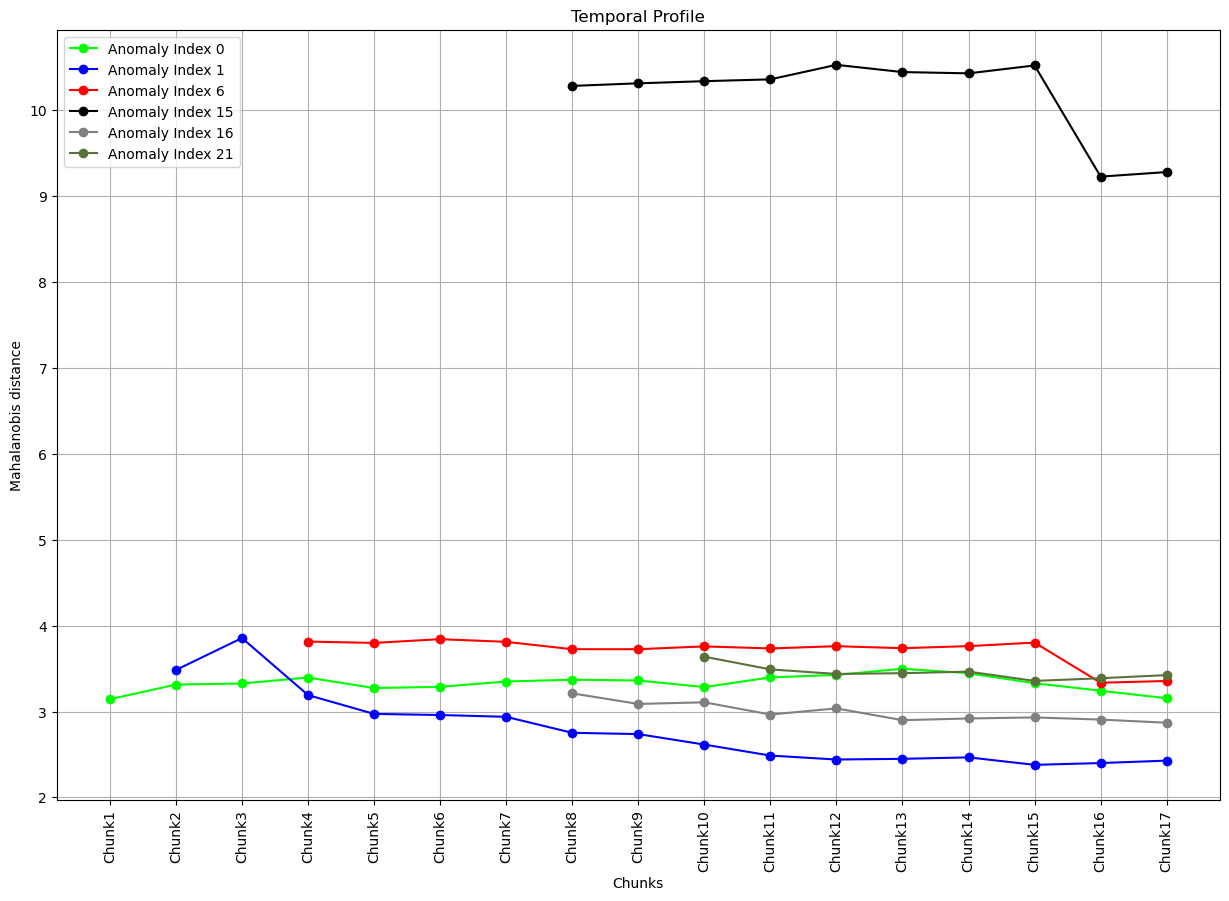

In [3717]:
cols_data = an_df.columns[2:]
anomaly_index = 0
x_array = an_df.values[anomaly_index]
rows_data = x_array[2:-2]

# Create a line chart with time series data
#row_data = an_df.values[0][2:-2]

plt.figure(figsize=(15,10))

plt.xticks(rotation='vertical')
#plt.plot(cols_data, rows_data, marker='o', linestyle='-', color='purple', label='Anomaly Index 0')
plt.plot(cols_data, an_df.values[0][2:], marker='o', linestyle='-', color='#00FF00', label='Anomaly Index 0')
plt.plot(cols_data, an_df.values[1][2:], marker='o', linestyle='-', color='blue', label='Anomaly Index 1')
plt.plot(cols_data, an_df.values[6][2:], marker='o', linestyle='-', color='red', label='Anomaly Index 6')
plt.plot(cols_data, an_df.values[15][2:], marker='o', linestyle='-', color='black', label='Anomaly Index 15')
# plt.plot(cols_data, an_df.values[36][2:], marker='o', linestyle='-', color='y', label='Anomaly Index 36')
plt.plot(cols_data, an_df.values[16][2:], marker='o', linestyle='-', color='#808080', label='Anomaly Index 16')
plt.plot(cols_data, an_df.values[21][2:], marker='o', linestyle='-', color='#597239', label='Anomaly Index 21')
# plt.plot(cols_data, an_df.values[30][2:], marker='o', linestyle='-', color='c', label='Anomaly Index 30')
plt.xlabel('Chunks')
plt.ylabel('Mahalanobis distance')
plt.title('Temporal Profile')
plt.legend()
plt.grid(True)
plt.savefig('AnomaliesTemporalPhase.jpg')
plt.show()

In [3718]:
len(global_cluster_assignment)

3202

In [3719]:
an_df["Coordinatex"] = an_df["Coordinates"].str[0]

In [3720]:
an_df["Coordinatey"] = an_df["Coordinates"].str[1]

In [3721]:
filename = 'Anomalies.xlsx'
an_df.to_excel(filename,index=False)

In [3722]:
type(cluster_centers)

numpy.ndarray

In [3723]:
len(cluster_entropies)

10

In [3724]:
#Centers
#Counts
#Covariance
#entropy
an_compression = pd.DataFrame({"Coordinatex" : an_df['Coordinatex'].tolist() ,
                             "Coordinatey" :an_df['Coordinatey'].tolist()  })

clusters = { "Centers": cluster_centers.tolist(),
    "Counts": cluster_counts.tolist(),
    "Covariance": covariance_matrices.tolist(),
    "Entropy": cluster_entropies.tolist()
   }
cluster_df = pd.DataFrame(clusters)

In [3725]:
cluster_df["Cluster Index"] = cluster_df.index

In [3726]:
for val in cluster_df["Cluster Index"]:
    val = list(map(int, str(val)))

In [3727]:
cluster_df['Cluster Index'] = cluster_df['Cluster Index'].apply(lambda x: [x])

In [3728]:
cluster_df

Centers  Counts  \
0    [5.509416668804831, 44.89540564108935]     308   
1   [15.23293176926568, 14.743004708917999]     491   
2   [4.969445202620834, 24.997711903798095]     805   
3   [17.874317578673754, 42.03994825184666]       7   
4   [14.876110871451164, 46.10462394900992]      42   
5    [4.894008681359713, 5.273093312183352]     486   
6  [14.255525329112954, 29.376498527558567]      59   
7  [2.7686312991419073, 17.828242943440944]       6   
8    [14.81954718073518, 44.99339203456151]     770   
9  [13.615104279267005, 29.922339605223062]     248   

                                          Covariance    Entropy Cluster Index  
0  [[14.695860231546154, 7.132864709840608], [7.1...  11.488567           [0]  
1  [[5.865416084725774, -1.2308557857838018], [-1...   9.404003           [1]  
2  [[4.654226516008969, 4.393451912990311], [4.39...   5.326509           [2]  
3  [[0.5524209962275939, -0.25394216070444403], [...   3.368771           [3]  
4  [[2.2068313678986806, -0.9679053944773187], [-...   5.563770           [4]  
5  [[5.018460693694337, -1.7942919097677854], [-1...   8.342048           [5]  
6  [[2.568076961679575, 0.2047895631124507], [0.2...   7.064975           [6]  
7  [[3.3694078067607856, 4.449955549913567], [4.4...  10.189250           [7]  
8  [[7.4399991282656615, -0.27522019157751143], [...   9.853599           [8]  
9  [[6.700966489332892, 2.0191816263203433], [2.0...   9.304570           [9]

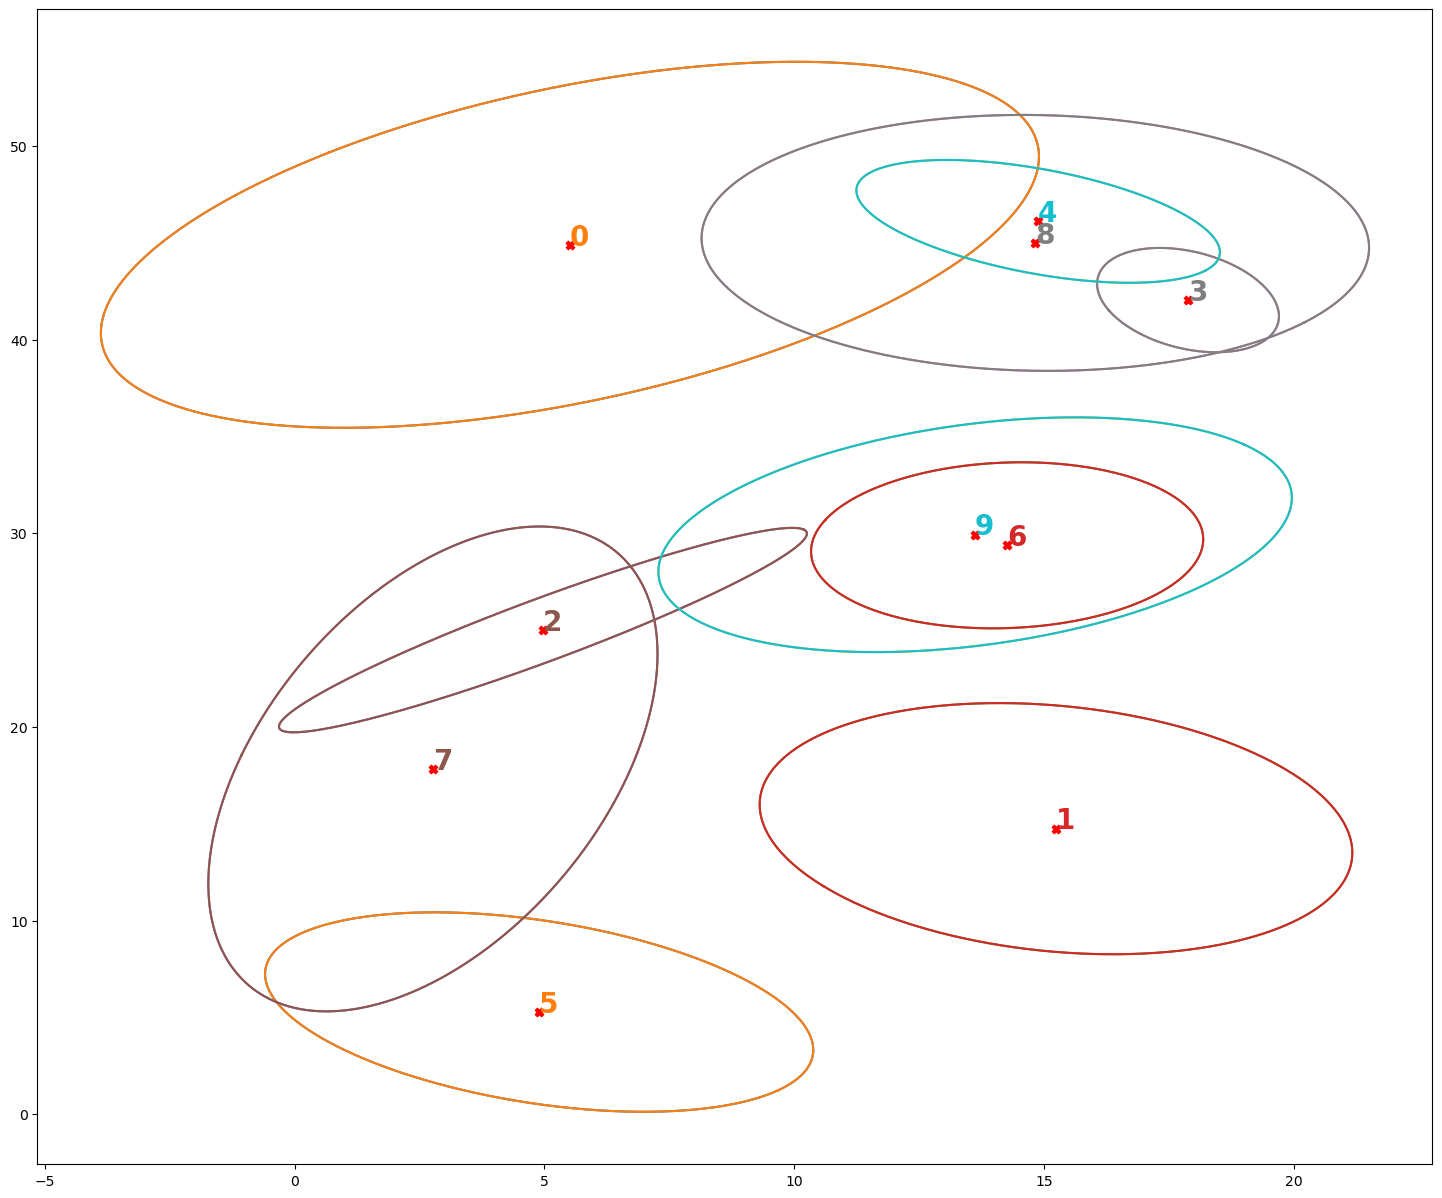

In [3729]:
# ploting ellipse function
plt.rcParams["figure.figsize"] = (18,15)

for i in cluster_df.index:
    
    #There is no cluster data
    
    cov = np.array(cluster_df['Covariance'].loc[i])
    val, rot = np.linalg.eig(cov)
    val = np.sqrt(val)
    center = np.array(cluster_df['Centers'].loc[i])
    center = center.reshape(2,1)
    plt.scatter(center[0], center[1], c='red', marker='X', label='Center')
    t = np.linspace(0, 2.0 * np.pi, 1000)
    xy = np.stack((np.cos(t), np.sin(t)), axis=-1)
    scaling_factor = np.sqrt(5.991)  # For a 2D ellipse and 95% confidence
    plt.plot(*(rot @ (scaling_factor* val * xy).T + center))
    plot_handle, = plt.plot(*(rot @ (scaling_factor * val * xy).T + center))  # Get handle
    
    # Extract the color used by `plt.plot()`
    ellipse_color = plot_handle.get_color() 
    plt.annotate(i, xy=center, size=20,color=ellipse_color, weight='bold')

In [3730]:
an_df

Coordinates  Cluster Index  Chunk1  Chunk2  \
0     [20.015346273035533, 7.339478356510949]            1.0   3.144   3.314   
1      [9.703454272608736, 49.34772859602885]            8.0     NaN   3.484   
2    [10.121096052693968, 48.753501125450825]            8.0     NaN   3.149   
3     [20.24089523855905, 40.046938906477024]            8.0     NaN   3.124   
4   [-1.4640755918800137, 11.217716705172323]            5.0     NaN     NaN   
5                                [0.0, 30.02]            9.0     NaN     NaN   
6      [4.147240647852756, 21.85288676775457]            2.0     NaN     NaN   
7     [11.214690039460002, 51.90420857016623]            8.0     NaN     NaN   
8      [20.51928525871285, 37.32426225262073]            8.0     NaN     NaN   
9                                 [4.2, 30.0]            2.0     NaN     NaN   
10    [6.447504131887701, 17.360731009351465]            9.0     NaN     NaN   
11    [9.524158557296264, 50.328104638375486]            8.0     NaN     NaN   
12                              [22.05, 35.1]            8.0     NaN     NaN   
13    [21.018051062166457, 40.02264657591962]            8.0     NaN     NaN   
14     [7.017290243434317, 51.62560840587737]            8.0     NaN     NaN   
15                                [3.0, 29.7]            2.0     NaN     NaN   
16                               [16.0, 22.0]            1.0     NaN     NaN   
17    [19.81210223643309, 7.8496141863958835]            1.0     NaN     NaN   
18    [22.079957194205846, 39.50825521584187]            8.0     NaN     NaN   
19     [21.15218388763627, 38.40052281084861]            8.0     NaN     NaN   
20     [6.753671129746948, 48.41227419334808]            8.0     NaN     NaN   
21     [6.558456404176639, 49.61479479298255]            8.0     NaN     NaN   
22     [3.51782774358535, 49.965773691713736]            8.0     NaN     NaN   
23                                [18.2, 0.6]            5.0     NaN     NaN   
24    [7.2043104183481805, 52.23180274861675]            8.0     NaN     NaN   
25   [-0.6395335884967066, 20.84919451177214]            2.0     NaN     NaN   
26      [23.49056810612297, 6.58703747709075]            1.0     NaN     NaN   
27     [7.06158234090888, 52.501996996858914]            8.0     NaN     NaN   
28                                [3.0, 15.0]            2.0     NaN     NaN   

    Chunk3  Chunk4  Chunk5  Chunk6  Chunk7  Chunk8  ...  Chunk10  Chunk11  \
0    3.327   3.396   3.274   3.288   3.350   3.371  ...    3.285    3.398   
1    3.856   3.192   2.973   2.960   2.939   2.753  ...    2.616    2.488   
2    3.483   2.878   2.683   2.661   2.643   2.474  ...    2.349    2.228   
3    3.519   3.067   2.867   3.006   2.992   2.848  ...    2.722    2.698   
4    3.061   3.110   3.097   3.330   3.428   3.418  ...    3.324    3.231   
5    4.412   4.878   5.267   5.271   5.379   5.494  ...    5.484    5.316   
6      NaN   3.815   3.799   3.843   3.812   3.726  ...    3.759    3.735   
7      NaN   3.609   3.380   3.360   3.314   3.145  ...    3.017    2.895   
8      NaN     NaN   3.771   3.926   3.889   3.711  ...    3.567    3.523   
9      NaN     NaN   9.103   9.227   9.230   8.968  ...    9.023    9.038   
10     NaN     NaN     NaN   5.111   5.410   5.766  ...    5.518    5.066   
11     NaN     NaN     NaN   3.298   3.271   3.068  ...    2.922    2.785   
12     NaN     NaN     NaN     NaN   5.014   4.779  ...    4.592    4.521   
13     NaN     NaN     NaN     NaN   3.251   3.092  ...    2.949    2.919   
14     NaN     NaN     NaN     NaN     NaN   4.157  ...    3.953    3.786   
15     NaN     NaN     NaN     NaN     NaN  10.283  ...   10.338   10.359   
16     NaN     NaN     NaN     NaN     NaN   3.212  ...    3.108    2.966   
17     NaN     NaN     NaN     NaN     NaN     NaN  ...    3.084    3.193   
18     NaN     NaN     NaN     NaN     NaN     NaN  ...    3.385    3.343   
19     NaN     NaN     NaN     NaN     NaN     NaN  ...    3.409    3.365   
20     NaN     N

In [3731]:
total_cluster_len =  len(cluster_df)


an_compression[f"Cluster Indices:{total_cluster_len}"] = an_df['Cluster Index'].tolist()
an_compression[f"M_Distance Clusters:{total_cluster_len}"] = an_df['Chunk17'].tolist()



In [3732]:
an_compression

Coordinatex  Coordinatey  Cluster Indices:10  M_Distance Clusters:10
0     20.015346     7.339478                 1.0                   3.155
1      9.703454    49.347729                 8.0                   2.429
2     10.121096    48.753501                 8.0                   2.176
3     20.240895    40.046939                 8.0                   2.654
4     -1.464076    11.217717                 5.0                   3.408
5      0.000000    30.020000                 9.0                   5.555
6      4.147241    21.852887                 2.0                   3.356
7     11.214690    51.904209                 8.0                   2.838
8     20.519285    37.324262                 8.0                   3.465
9      4.200000    30.000000                 2.0                   8.071
10     6.447504    17.360731                 9.0                   5.220
11     9.524159    50.328105                 8.0                   2.720
12    22.050000    35.100000                 8.0                   4.444
13    21.018051    40.022647                 8.0                   2.873
14     7.017290    51.625608                 8.0                   3.703
15     3.000000    29.700000                 2.0                   9.280
16    16.000000    22.000000                 1.0                   2.870
17    19.812102     7.849614                 1.0                   2.963
18    22.079957    39.508255                 8.0                   3.290
19    21.152184    38.400523                 8.0                   3.308
20     6.753671    48.412274                 8.0                   3.175
21     6.558456    49.614795                 8.0                   3.425
22     3.517828    49.965774                 8.0                   4.474
23    18.200000     0.600000                 5.0                   5.940
24     7.204310    52.231803                 8.0                   3.800
25    -0.639534    20.849195                 2.0                   3.060
26    23.490568     6.587037                 1.0                   4.210
27     7.061582    52.501997                 8.0                   3.905
28     3.000000    15.000000                 2.0                  11.491

In [3733]:
#Functions

def calculate_entropy_after_merge(cluster1, cluster2):
    ''' A function to calculate entropy of clusters after merging and 
    return entropy, center, covariance matrix, total number of elements'''
    n1 = cluster_df["Counts"].loc[cluster1]
    n2 = cluster_df["Counts"].loc[cluster2]
    m1 = cluster_df["Centers"].loc[cluster1]
    m2 = cluster_df["Centers"].loc[cluster2]
    covariance1 = cluster_df["Covariance"].loc[cluster1]
    covariance2 = cluster_df["Covariance"].loc[cluster2]
    n=n1+n2
    m = (n1*np.array(m1) + n2*np.array(m2)) / n

    merged_cov = (n1*np.array(covariance1) + n2*np.array(covariance2) + n1 * np.dot(np.transpose(m1-m) , (m1-m)) + n2 * np.dot(np.transpose(m2-m),(m2-m))) / n
    # Calculate the determinant of the covariance matrix
    covariance_det = np.linalg.det(merged_cov)
    # Calculate the entropy
    merged_entropy = 0.5 * (len(merged_cov)) * np.log2(2 * np.pi * np.exp(1)) + np.log2(abs(covariance_det))
    return merged_entropy, m, merged_cov, n

def merge_clusters():
    global cluster_df
    n_clusters = len(cluster_df) 
    combined_clusters = []
    
    def distance(center1, center2): return math.sqrt(sum((x1 - x2) ** 2 for x1, x2 in zip(center1, center2)))
    
    def find_nearest_clusters(center_index):
        distances = []
        for i in range(89):
            try:
                distances_val = distance(cluster_df["Centers"].loc[center_index], cluster_df["Centers"].loc[i])
                distances.append((distances_val,i))
            except:
                continue
        distances.sort(key=lambda x: x[0])
        return [i for _, i in distances[1:5]]
    
    merged_centers = []
    merged_covariance = []
    merged_entropies = []
    merged_cluster_counts = []
    
    nearest_clusters = []
    
    for i in range(n_clusters):
        nearest_clusters = find_nearest_clusters(i)
        
        try:
            current_entropy = cluster_df["Entropy"].loc[i]
        except:
            continue
        best_merge_candidate = None   
        for j in nearest_clusters: # j is index of nearest cluster
            current_entropy2 = cluster_df["Entropy"].loc[j]
            counts_2 = cluster_df["Counts"].loc[j]
            merged_entropy , merged_center, merged_cov, num = calculate_entropy_after_merge(i,j)
            e1 = cluster_df["Entropy"].loc[i]
            e2 = cluster_df["Entropy"].loc[j]
            delta_e1 = ((merged_entropy - e1)/e1)*100
            delta_e2 = ((merged_entropy - e2)/e2) * 100
            #   ((merged_entropy <= current_entropy) and (counts_2 < 100))
            
            '''Second merge criteria ith index has a big cluster and jth index has small cluster,
            and mahalanobis distancee betweeen both center is less than 2.5 then merge small cluster into the big'''
            n2 = cluster_df["Counts"].loc[j]
            point = np.array( cluster_df["Centers"].loc[j] )
            center = np.array( cluster_df["Centers"].loc[i] )
            # Calculate the inverse of the covariance matrix
            inv_covariance_matrix = np.linalg.inv(cluster_df["Covariance"].loc[i])
            diff = point - center
            maha_distance = np.sqrt(np.dot(diff.T, np.dot(inv_covariance_matrix, diff)))
            # (mahalonobis distance of cluster center[j] with covariance_matrix[i] < 2 and cluster_counts[j]<100) then merge
            if(maha_distance < 2 and n2 < 10):
                #Update cluster_df at ith index 
                #delete row in cluster_df at jth index
                cluster_df.at[i, "Centers"] = merged_center
                cluster_df.at[i, "Counts"] = num
                cluster_df.at[i, "Covariance"] = merged_cov
                cluster_df.at[i, "Entropy"] = merged_entropy
                print("Second Criteria Merged...!")
                print(i, end=" ")
                print(j)
                best_merge_candidate = j
                cluster_df.at[i , "Cluster Index"].extend(cluster_df.at[j , "Cluster Index"]) # append j to i th index
                #delete row at jth index
                cluster_df = cluster_df.drop(j)
                continue
                
            if ((merged_entropy <= current_entropy) and (merged_entropy <= current_entropy2)):
                #Update cluster_df at ith index 
                #delete row in cluster_df at jth index
                cluster_df.at[i, "Centers"] = merged_center
                cluster_df.at[i, "Counts"] = num
                cluster_df.at[i, "Covariance"] = merged_cov
                cluster_df.at[i, "Entropy"] = merged_entropy
                print("Frist Criteria Merged...!")
                print(i, end=" ")
                print(j)
                best_merge_candidate = j
                cluster_df.at[i , "Cluster Index"].extend(cluster_df.at[j , "Cluster Index"]) # append j to i th index
                #delete row at jth index
                cluster_df = cluster_df.drop(j)
                
                continue   

           
            
# cluster_centers = cluster_centers[]  
# cluster_entropies = cluster_entropies2[]
import math

In [3734]:
merge_clusters()

Second Criteria Merged...!
8 3


In [3735]:
# Convert the integer lists to string lists
cluster_df['Cluster Index'] = cluster_df['Cluster Index'].apply(lambda x: [str(i) for i in x])

In [3736]:
len(cluster_df)

9

In [3737]:
cluster_df

Centers  Counts  \
0    [5.509416668804831, 44.89540564108935]     308   
1   [15.23293176926568, 14.743004708917999]     491   
2   [4.969445202620834, 24.997711903798095]     805   
4   [14.876110871451164, 46.10462394900992]      42   
5    [4.894008681359713, 5.273093312183352]     486   
6  [14.255525329112954, 29.376498527558567]      59   
7  [2.7686312991419073, 17.828242943440944]       6   
8   [14.847067634770664, 44.96678443291543]     777   
9  [13.615104279267005, 29.922339605223062]     248   

                                          Covariance    Entropy Cluster Index  
0  [[14.695860231546154, 7.132864709840608], [7.1...  11.488567           [0]  
1  [[5.865416084725774, -1.2308557857838018], [-1...   9.404003           [1]  
2  [[4.654226516008969, 4.393451912990311], [4.39...   5.326509           [2]  
4  [[2.2068313678986806, -0.9679053944773187], [-...   5.563770           [4]  
5  [[5.018460693694337, -1.7942919097677854], [-1...   8.342048           [5]  
6  [[2.568076961679575, 0.2047895631124507], [0.2...   7.064975           [6]  
7  [[3.3694078067607856, 4.449955549913567], [4.4...  10.189250           [7]  
8  [[7.53913625894819, -0.11384111348136845], [-0...   9.895281        [8, 3]  
9  [[6.700966489332892, 2.0191816263203433], [2.0...   9.304570           [9]

In [3738]:
an_df

Coordinates  Cluster Index  Chunk1  Chunk2  \
0     [20.015346273035533, 7.339478356510949]            1.0   3.144   3.314   
1      [9.703454272608736, 49.34772859602885]            8.0     NaN   3.484   
2    [10.121096052693968, 48.753501125450825]            8.0     NaN   3.149   
3     [20.24089523855905, 40.046938906477024]            8.0     NaN   3.124   
4   [-1.4640755918800137, 11.217716705172323]            5.0     NaN     NaN   
5                                [0.0, 30.02]            9.0     NaN     NaN   
6      [4.147240647852756, 21.85288676775457]            2.0     NaN     NaN   
7     [11.214690039460002, 51.90420857016623]            8.0     NaN     NaN   
8      [20.51928525871285, 37.32426225262073]            8.0     NaN     NaN   
9                                 [4.2, 30.0]            2.0     NaN     NaN   
10    [6.447504131887701, 17.360731009351465]            9.0     NaN     NaN   
11    [9.524158557296264, 50.328104638375486]            8.0     NaN     NaN   
12                              [22.05, 35.1]            8.0     NaN     NaN   
13    [21.018051062166457, 40.02264657591962]            8.0     NaN     NaN   
14     [7.017290243434317, 51.62560840587737]            8.0     NaN     NaN   
15                                [3.0, 29.7]            2.0     NaN     NaN   
16                               [16.0, 22.0]            1.0     NaN     NaN   
17    [19.81210223643309, 7.8496141863958835]            1.0     NaN     NaN   
18    [22.079957194205846, 39.50825521584187]            8.0     NaN     NaN   
19     [21.15218388763627, 38.40052281084861]            8.0     NaN     NaN   
20     [6.753671129746948, 48.41227419334808]            8.0     NaN     NaN   
21     [6.558456404176639, 49.61479479298255]            8.0     NaN     NaN   
22     [3.51782774358535, 49.965773691713736]            8.0     NaN     NaN   
23                                [18.2, 0.6]            5.0     NaN     NaN   
24    [7.2043104183481805, 52.23180274861675]            8.0     NaN     NaN   
25   [-0.6395335884967066, 20.84919451177214]            2.0     NaN     NaN   
26      [23.49056810612297, 6.58703747709075]            1.0     NaN     NaN   
27     [7.06158234090888, 52.501996996858914]            8.0     NaN     NaN   
28                                [3.0, 15.0]            2.0     NaN     NaN   

    Chunk3  Chunk4  Chunk5  Chunk6  Chunk7  Chunk8  ...  Chunk10  Chunk11  \
0    3.327   3.396   3.274   3.288   3.350   3.371  ...    3.285    3.398   
1    3.856   3.192   2.973   2.960   2.939   2.753  ...    2.616    2.488   
2    3.483   2.878   2.683   2.661   2.643   2.474  ...    2.349    2.228   
3    3.519   3.067   2.867   3.006   2.992   2.848  ...    2.722    2.698   
4    3.061   3.110   3.097   3.330   3.428   3.418  ...    3.324    3.231   
5    4.412   4.878   5.267   5.271   5.379   5.494  ...    5.484    5.316   
6      NaN   3.815   3.799   3.843   3.812   3.726  ...    3.759    3.735   
7      NaN   3.609   3.380   3.360   3.314   3.145  ...    3.017    2.895   
8      NaN     NaN   3.771   3.926   3.889   3.711  ...    3.567    3.523   
9      NaN     NaN   9.103   9.227   9.230   8.968  ...    9.023    9.038   
10     NaN     NaN     NaN   5.111   5.410   5.766  ...    5.518    5.066   
11     NaN     NaN     NaN   3.298   3.271   3.068  ...    2.922    2.785   
12     NaN     NaN     NaN     NaN   5.014   4.779  ...    4.592    4.521   
13     NaN     NaN     NaN     NaN   3.251   3.092  ...    2.949    2.919   
14     NaN     NaN     NaN     NaN     NaN   4.157  ...    3.953    3.786   
15     NaN     NaN     NaN     NaN     NaN  10.283  ...   10.338   10.359   
16     NaN     NaN     NaN     NaN     NaN   3.212  ...    3.108    2.966   
17     NaN     NaN     NaN     NaN     NaN     NaN  ...    3.084    3.193   
18     NaN     NaN     NaN     NaN     NaN     NaN  ...    3.385    3.343   
19     NaN     NaN     NaN     NaN     NaN     NaN  ...    3.409    3.365   
20     NaN     N

In [3739]:
cluster_df["Cluster Index"]

0       [0]
1       [1]
2       [2]
4       [4]
5       [5]
6       [6]
7       [7]
8    [8, 3]
9       [9]
Name: Cluster Index, dtype: object

In [3740]:
cluster_df["Cluster Index"].apply(lambda x:str(int(5.0)) in x)

0    False
1    False
2    False
4    False
5     True
6    False
7    False
8    False
9    False
Name: Cluster Index, dtype: bool

In [3741]:
len(cluster_df)

9

In [3742]:
covariance_matrix

array([[4.65422652, 4.39345191],
       [4.39345191, 4.65208596]])

In [3743]:
# Code for Updating Anomaly Compression table
total_cluster_len =  len(cluster_df)
for x in an_df.index:
    c_index = an_df["Cluster Index"][x]
    df_temp1 = cluster_df["Cluster Index"].apply(lambda x:str(int(c_index)) in x) # Added int on Feb 10 to convert 1.0 to 1 
    df_temp = cluster_df[df_temp1]
    print(c_index)
    covariance_matrix = df_temp["Covariance"]
    inverse_cov_matrix = np.linalg.inv(covariance_matrix.values[0])
    cluster_center = df_temp["Centers"]
    
    point = [ int(an_df.loc[x]["Coordinatex"]) , int(an_df.loc[x]["Coordinatey"]) ]
    
    maha_distance = mahalanobis(point, cluster_center.values[0], inverse_cov_matrix)
    
    df_temp3 = an_compression[(an_compression["Coordinatex"] == point[0]) & (an_compression["Coordinatey"] == point[1])]

    if len(df_temp3) != 0:
        # add using at index of an_compression
        index_temp = df_temp3.index.values.astype(int)[0]
        an_compression.at[index_temp , f"Total Clusters:{total_cluster_len}"] = float('%.3f'%(maha_distance))
        an_compression.at[index_temp , f"Cluster Indices:{total_cluster_len}"] = df_temp.loc[df_temp.index[0]]["Cluster Index"]
    else:
        # create new anomaly series
        # add series to anomaly compression dataframe
        anomaly = pd.Series({"Coordinatex" : int(an_df.loc[x]["Coordinatex"]) ,"Coordinatey" : int(an_df.loc[x]["Coordinatey"]) ,f"Cluster Indices:{total_cluster_len}": df_temp.loc[df_temp.index[0]]["Cluster Index"], f"M_Distance Clusters:{total_cluster_len}" : float('%.3f'%(maha_distance))})
        # an_compression = an_compression.append(anomaly,ignore_index = True)
        # an_compression = pd.DataFrame(an_compression).append(anomaly, ignore_index=True)
        an_compression = pd.concat([an_compression, pd.DataFrame([anomaly])], ignore_index=True)


1.0
8.0
8.0
8.0
5.0
9.0
2.0
8.0
8.0
2.0
9.0
8.0
8.0
8.0
8.0
2.0
1.0
1.0
8.0
8.0
8.0
8.0
8.0
5.0
8.0
2.0
1.0
8.0
2.0


# Code for Updating Anomaly Compression table
total_cluster_len =  len(cluster_df)
for x in an_df.index:
    c_index = an_df["Cluster Index"][x]
    #print(str(c_index))
    df_temp1 = cluster_df["Cluster Index"].apply(lambda x:str(int(c_index)) in x)
    df_temp = cluster_df[df_temp1]
    covariance_matrix = df_temp["Covariance"]
    inverse_cov_matrix = np.linalg.inv(covariance_matrix.values[0])
    cluster_center = df_temp["Centers"]
    
    point = [ int(an_df.loc[x]["Coordinatex"]) , int(an_df.loc[x]["Coordinatey"]) ]
    
    maha_distance = mahalanobis(point, cluster_center.values[0], inverse_cov_matrix)
    
    df_temp3 = an_compression[(an_compression["Coordinatex"] == point[0]) & (an_compression["Coordinatey"] == point[1])]
    if len(df_temp3) != 0:
        # add using at index of an_compression
        index_temp = df_temp3.index.values.astype(int)[0]
        print(index_temp)
        an_compression.at[index_temp , f"Total Clusters:{total_cluster_len}"] = float('%.3f'%(maha_distance))
        an_compression.at[index_temp , f"Cluster Indices:{total_cluster_len}"] = df_temp.loc[df_temp.index[0]]["Cluster Index"]
    else:
        # create new anomaly series
        # add series to anomaly compression dataframe
        anomaly = pd.Series({"Coordinatex" : int(an_df.loc[x]["Coordinatex"]) ,"Coordinatey" : int(an_df.loc[x]["Coordinatey"]) ,f"Cluster Indices:{total_cluster_len}": df_temp.loc[df_temp.index[0]]["Cluster Index"], f"M_Distance Clusters:{total_cluster_len}" : float('%.3f'%(maha_distance))})
        an_compression = pd.concat([an_compression, pd.DataFrame([anomaly])],ignore_index = True)

In [3745]:
an_compression

Coordinatex  Coordinatey  Cluster Indices:10  M_Distance Clusters:10  \
0     20.015346     7.339478                 1.0                   3.155   
1      9.703454    49.347729                 8.0                   2.429   
2     10.121096    48.753501                 8.0                   2.176   
3     20.240895    40.046939                 8.0                   2.654   
4     -1.464076    11.217717                 5.0                   3.408   
5      0.000000    30.020000                 9.0                   5.555   
6      4.147241    21.852887                 2.0                   3.356   
7     11.214690    51.904209                 8.0                   2.838   
8     20.519285    37.324262                 8.0                   3.465   
9      4.200000    30.000000                 2.0                   8.071   
10     6.447504    17.360731                 9.0                   5.220   
11     9.524159    50.328105                 8.0                   2.720   
12    22.050000    35.100000                 8.0                   4.444   
13    21.018051    40.022647                 8.0                   2.873   
14     7.017290    51.625608                 8.0                   3.703   
15     3.000000    29.700000                 2.0                   9.280   
16    16.000000    22.000000                 1.0                   2.870   
17    19.812102     7.849614                 1.0                   2.963   
18    22.079957    39.508255                 8.0                   3.290   
19    21.152184    38.400523                 8.0                   3.308   
20     6.753671    48.412274                 8.0                   3.175   
21     6.558456    49.614795                 8.0                   3.425   
22     3.517828    49.965774                 8.0                   4.474   
23    18.200000     0.600000                 5.0                   5.940   
24     7.204310    52.231803                 8.0                   3.800   
25    -0.639534    20.849195                 2.0                   3.060   
26    23.490568     6.587037                 1.0                   4.210   
27     7.061582    52.501997                 8.0                   3.905   
28     3.000000    15.000000                 2.0                  11.491   
29    20.000000     7.000000                 NaN                     NaN   
30     9.000000    49.000000                 NaN                     NaN   
31    10.000000    48.000000                 NaN                     NaN   
32    20.000000    40.000000                 NaN                     NaN   
33    -1.000000    11.000000                 NaN                     NaN   
34     0.000000    30.000000                 NaN                     NaN   
35     4.000000    21.000000                 NaN                     NaN   
36    11.000000    51.000000                 NaN                     NaN   
37    20.000000    37.000000                 NaN                     NaN   
38     4.000000    30.000000                 NaN                     NaN   
39     6.000000    17.000000                 NaN                     NaN   
40     9.000000    50.000000                 NaN                     NaN   
41    22.000000    35.000000                 NaN                     NaN   
42    21.000000    40.000000                 NaN                     NaN   
43     7.000000    51.000000                 NaN                     NaN   
44     3.000000    29.000000                 NaN                     NaN   
45    19.000000     7.000000                 NaN                     NaN   
46    22.000000    39.000000                 NaN                     NaN   
47    21.000000    38.000000                 NaN                     NaN   
48     6.000000    48.000000                 NaN                     NaN   
49     6.000000    49.000000                 NaN                     NaN   
50     3.000000    49.000000                 NaN                     NaN   
51    18.000000     0.000000                 NaN    

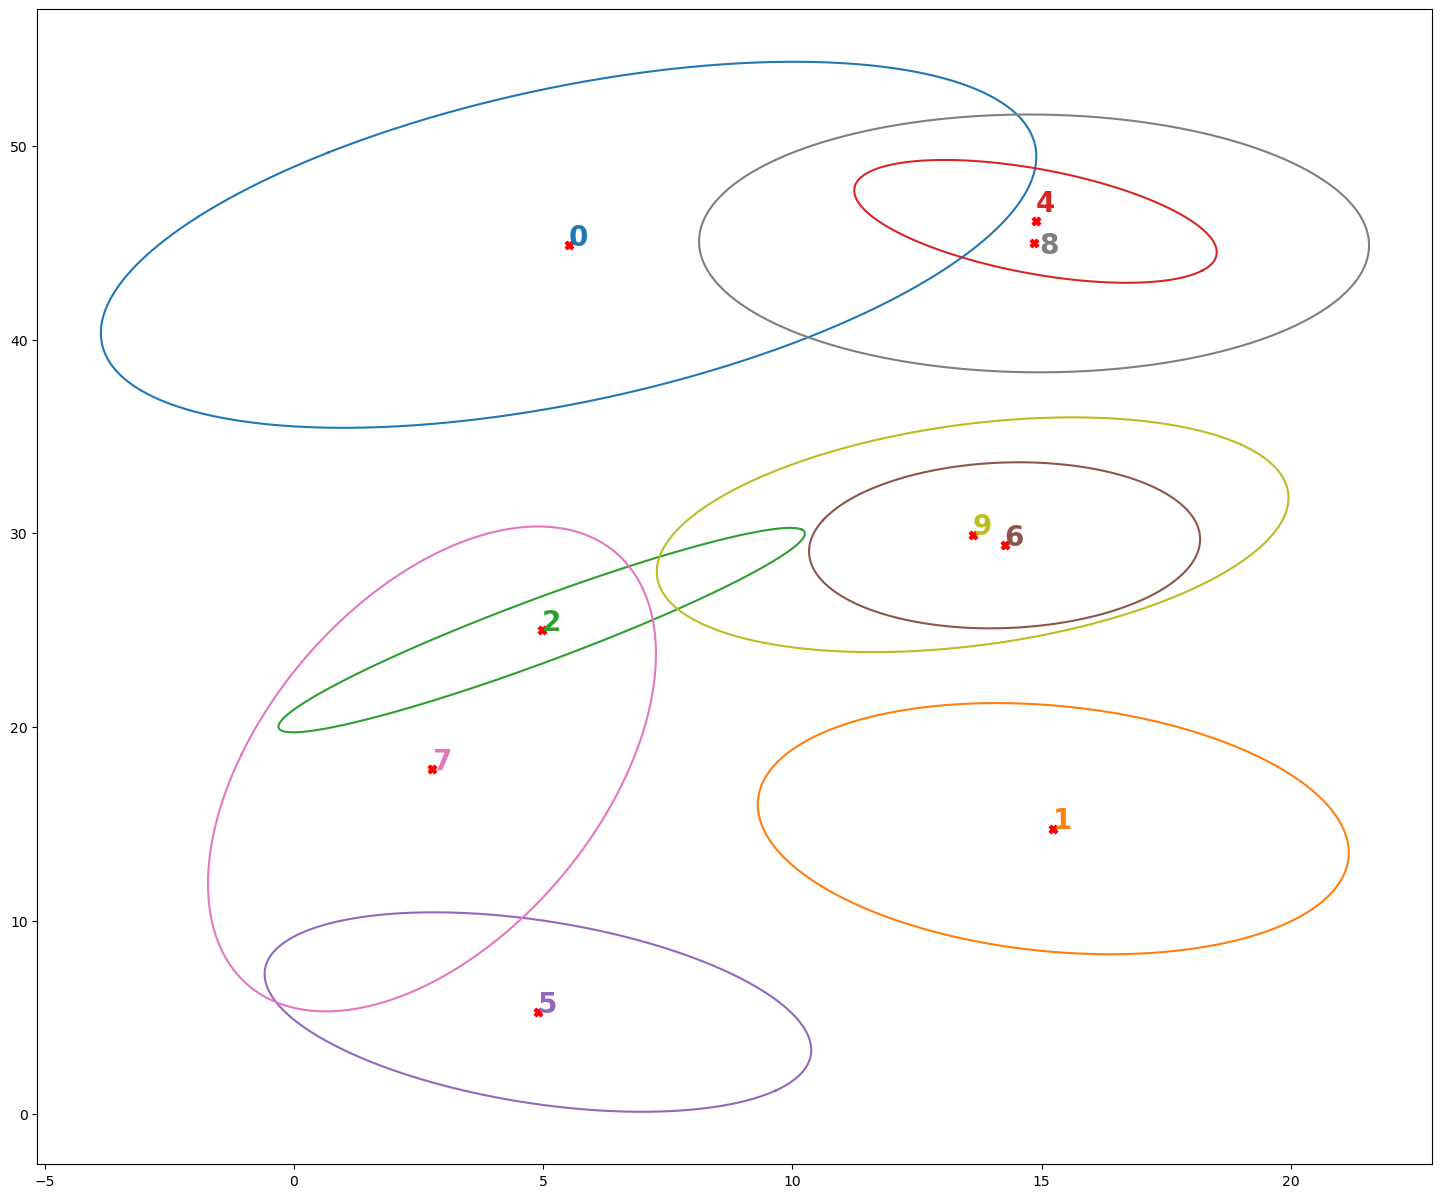

In [3746]:
# ploting ellipse function
plt.rcParams["figure.figsize"] = (18,15)

for i in cluster_df.index:
    
    #There is no cluster data
    
    cov = np.array(cluster_df['Covariance'].loc[i])
    val, rot = np.linalg.eig(cov)
    val = np.sqrt(val)
    center = np.array(cluster_df['Centers'].loc[i])
    center = center.reshape(2,1)
    plt.scatter(center[0], center[1], c='red', marker='X', label='Center')
    t = np.linspace(0, 2.0 * np.pi, 1000)
    xy = np.stack((np.cos(t), np.sin(t)), axis=-1)
    scaling_factor = np.sqrt(5.991)  # For a 2D ellipse and 95% confidence
    plot_handle, = plt.plot(*(rot @ (scaling_factor * val * xy).T + center))  # Get handle
    
    # Extract the color used by `plt.plot()`
    ellipse_color = plot_handle.get_color()  
    if(i==4):
        center[1]+=0.5
    if(i==8):
        center[0]+=0.1
        center[1]-=0.5
    plt.annotate(i, xy=center, size=20, color=ellipse_color, weight='bold')

In [3747]:
an_compression

Coordinatex  Coordinatey  Cluster Indices:10  M_Distance Clusters:10  \
0     20.015346     7.339478                 1.0                   3.155   
1      9.703454    49.347729                 8.0                   2.429   
2     10.121096    48.753501                 8.0                   2.176   
3     20.240895    40.046939                 8.0                   2.654   
4     -1.464076    11.217717                 5.0                   3.408   
5      0.000000    30.020000                 9.0                   5.555   
6      4.147241    21.852887                 2.0                   3.356   
7     11.214690    51.904209                 8.0                   2.838   
8     20.519285    37.324262                 8.0                   3.465   
9      4.200000    30.000000                 2.0                   8.071   
10     6.447504    17.360731                 9.0                   5.220   
11     9.524159    50.328105                 8.0                   2.720   
12    22.050000    35.100000                 8.0                   4.444   
13    21.018051    40.022647                 8.0                   2.873   
14     7.017290    51.625608                 8.0                   3.703   
15     3.000000    29.700000                 2.0                   9.280   
16    16.000000    22.000000                 1.0                   2.870   
17    19.812102     7.849614                 1.0                   2.963   
18    22.079957    39.508255                 8.0                   3.290   
19    21.152184    38.400523                 8.0                   3.308   
20     6.753671    48.412274                 8.0                   3.175   
21     6.558456    49.614795                 8.0                   3.425   
22     3.517828    49.965774                 8.0                   4.474   
23    18.200000     0.600000                 5.0                   5.940   
24     7.204310    52.231803                 8.0                   3.800   
25    -0.639534    20.849195                 2.0                   3.060   
26    23.490568     6.587037                 1.0                   4.210   
27     7.061582    52.501997                 8.0                   3.905   
28     3.000000    15.000000                 2.0                  11.491   
29    20.000000     7.000000                 NaN                     NaN   
30     9.000000    49.000000                 NaN                     NaN   
31    10.000000    48.000000                 NaN                     NaN   
32    20.000000    40.000000                 NaN                     NaN   
33    -1.000000    11.000000                 NaN                     NaN   
34     0.000000    30.000000                 NaN                     NaN   
35     4.000000    21.000000                 NaN                     NaN   
36    11.000000    51.000000                 NaN                     NaN   
37    20.000000    37.000000                 NaN                     NaN   
38     4.000000    30.000000                 NaN                     NaN   
39     6.000000    17.000000                 NaN                     NaN   
40     9.000000    50.000000                 NaN                     NaN   
41    22.000000    35.000000                 NaN                     NaN   
42    21.000000    40.000000                 NaN                     NaN   
43     7.000000    51.000000                 NaN                     NaN   
44     3.000000    29.000000                 NaN                     NaN   
45    19.000000     7.000000                 NaN                     NaN   
46    22.000000    39.000000                 NaN                     NaN   
47    21.000000    38.000000                 NaN                     NaN   
48     6.000000    48.000000                 NaN                     NaN   
49     6.000000    49.000000                 NaN                     NaN   
50     3.000000    49.000000                 NaN                     NaN   
51    18.000000     0.000000                 NaN    

In [3748]:
#Functions

def calculate_entropy_after_merge(cluster1, cluster2):
    # mreged covariance of two different data window
    n1 = cluster_df["Counts"].loc[cluster1]
    n2 = cluster_df["Counts"].loc[cluster2]
    m1 = cluster_df["Centers"].loc[cluster1]
    m2 = cluster_df["Centers"].loc[cluster2]
    covariance1 = cluster_df["Covariance"].loc[cluster1]
    covariance2 = cluster_df["Covariance"].loc[cluster2]
    n=n1+n2
    m = (n1*np.array(m1) + n2*np.array(m2)) / n

    merged_cov = (n1*np.array(covariance1) + n2*np.array(covariance2) + n1 * np.dot(np.transpose(m1-m) , (m1-m)) + n2 * np.dot(np.transpose(m2-m),(m2-m))) / n
    # Calculate the determinant of the covariance matrix
    covariance_det = np.linalg.det(merged_cov)
    # Calculate the entropy
    merged_entropy = 0.5 * (len(merged_cov)) * np.log2(2 * np.pi * np.exp(1)) + np.log2(abs(covariance_det))
    return merged_entropy, m, merged_cov, n

def merge_clusters():
    global cluster_df
    n_clusters = len(cluster_df) 
    combined_clusters = []
    
    def distance(center1, center2): return math.sqrt(sum((x1 - x2) ** 2 for x1, x2 in zip(center1, center2)))
    
    def find_nearest_clusters(center_index):
        distances = []
        for i in range(89):
            try:
                distances_val = distance(cluster_df["Centers"].loc[center_index], cluster_df["Centers"].loc[i])
                distances.append((distances_val,i))
            except:
                continue
        distances.sort(key=lambda x: x[0])
        return [i for _, i in distances[1:5]]
    
    merged_centers = []
    merged_covariance = []
    merged_entropies = []
    merged_cluster_counts = []
    
    nearest_clusters = []
    
    for i in range(n_clusters):
        nearest_clusters = find_nearest_clusters(i)
        
        try:
            current_entropy = cluster_df["Entropy"].loc[i]
        except:
            continue
        best_merge_candidate = None   
        for j in nearest_clusters: # j is index of nearest cluster
            current_entropy2 = cluster_df["Entropy"].loc[j]
            counts_2 = cluster_df["Counts"].loc[j]
            merged_entropy , merged_center, merged_cov, num = calculate_entropy_after_merge(i,j)
            e1 = cluster_df["Entropy"].loc[i]
            e2 = cluster_df["Entropy"].loc[j]
            delta_e1 = ((merged_entropy - e1)/e1)*100
            delta_e2 = ((merged_entropy - e2)/e2) * 100
            #   ((merged_entropy <= current_entropy) and (counts_2 < 100))
                        
            n2 = cluster_df["Counts"].loc[i]
            point = np.array( cluster_df["Centers"].loc[j] )
            center = np.array( cluster_df["Centers"].loc[i] )
            # Calculate the inverse of the covariance matrix
            inv_covariance_matrix = np.linalg.inv(cluster_df["Covariance"].loc[i])
            diff = point - center
            maha_distance = np.sqrt(np.dot(diff.T, np.dot(inv_covariance_matrix, diff)))
            # (mahalonobis distance of cluster center[j] with covariance_matrix[i] < 2 and cluster_counts[j]<100) then merge
            if(maha_distance < 2.5 and n2 < 10):
                #Update cluster_df at ith index 
                #delete row in cluster_df at jth index
                cluster_df.at[i, "Centers"] = merged_center
                cluster_df.at[i, "Counts"] = num
                cluster_df.at[i, "Covariance"] = merged_cov
                cluster_df.at[i, "Entropy"] = merged_entropy
                print("Second Criteria Merged...!")
                print(i, end=" ")
                print(j)
                best_merge_candidate = j
                cluster_df.at[i , "Cluster Index"].extend(cluster_df.at[j , "Cluster Index"]) # append j to i th index
                #delete row at jth index
                cluster_df = cluster_df.drop(j)
                continue
                #  or(delta_e2<5 and n2 < 5)
            if ((merged_entropy <= current_entropy) and (merged_entropy <= current_entropy2))or(delta_e1 < 10 and delta_e2 < 10):
                #Update cluster_df at ith index 
                #delete row in cluster_df at jth index
                cluster_df.at[i, "Centers"] = merged_center
                cluster_df.at[i, "Counts"] = num
                cluster_df.at[i, "Covariance"] = merged_cov
                cluster_df.at[i, "Entropy"] = merged_entropy
                print("Frist Criteria Merged...!")
                print(i, end=" ")
                print(j)
                best_merge_candidate = j
                cluster_df.at[i , "Cluster Index"].extend(cluster_df.at[j , "Cluster Index"]) # append j to i th index
                #delete row at jth index
                cluster_df = cluster_df.drop(j)
                
                continue   

           
            
# cluster_centers = cluster_centers[]  
# cluster_entropies = cluster_entropies2[]
import math

In [3749]:
merge_clusters()

Frist Criteria Merged...!
1 7


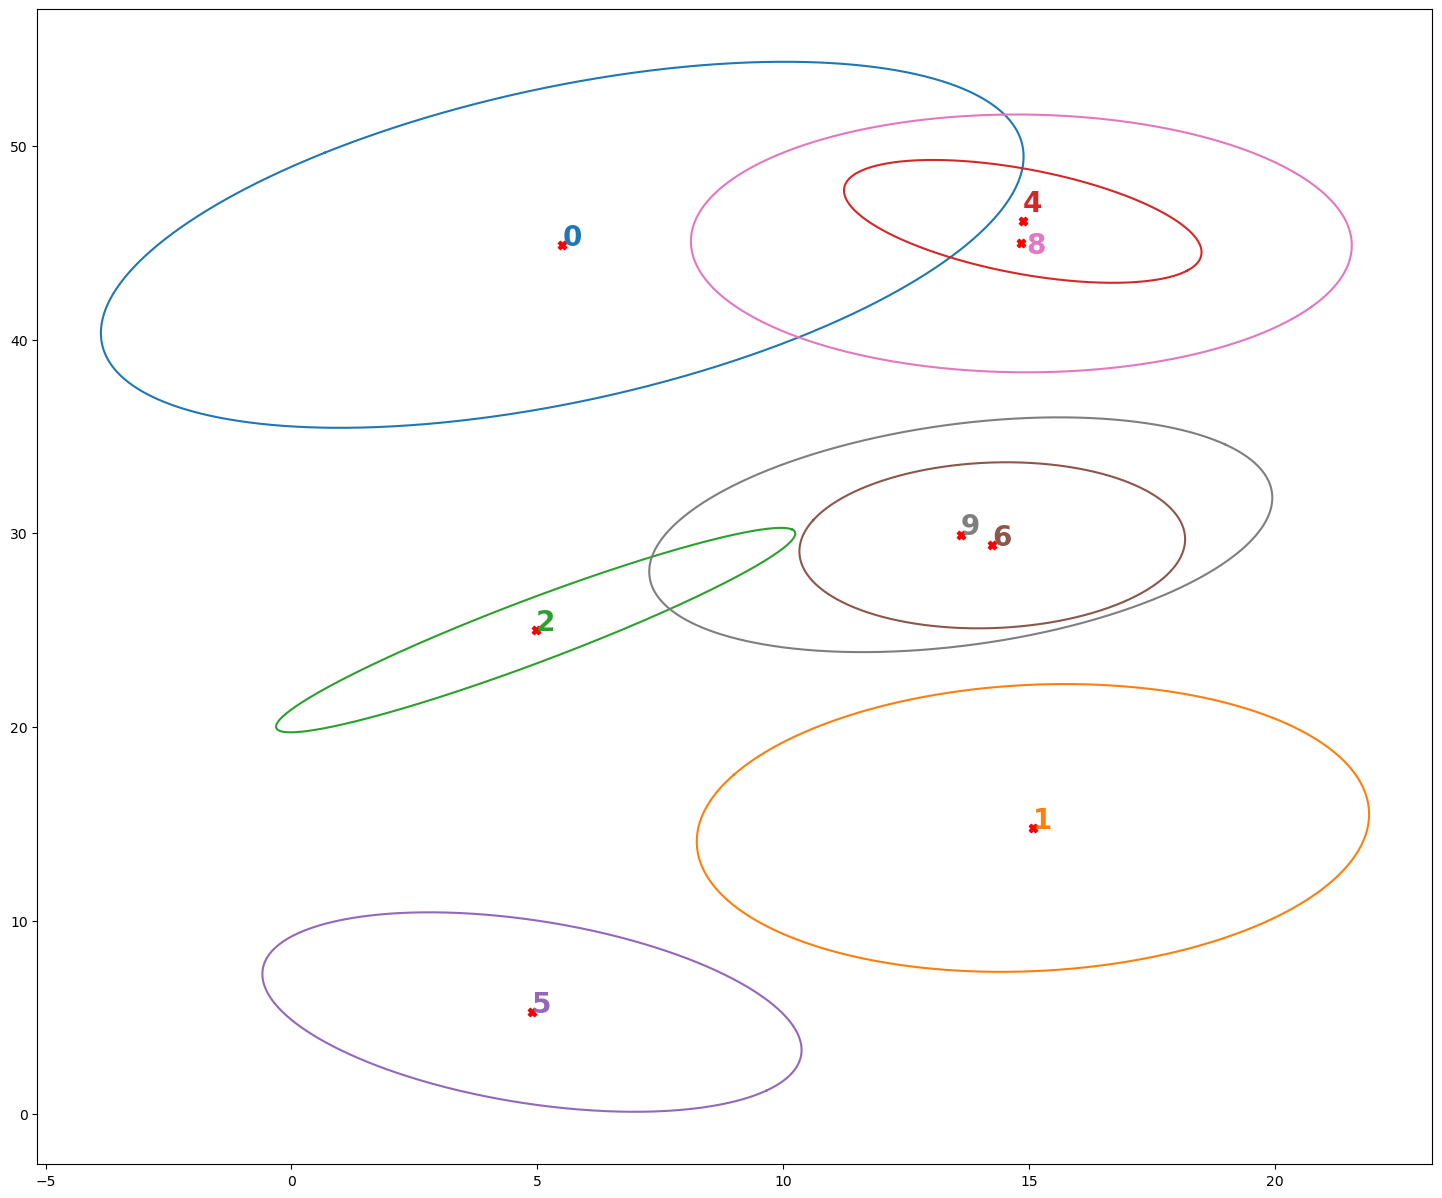

In [3750]:
# ploting ellipse function
plt.rcParams["figure.figsize"] = (18,15)

for i in cluster_df.index:
    
    #There is no cluster data
    
    cov = np.array(cluster_df['Covariance'].loc[i])
    val, rot = np.linalg.eig(cov)
    val = np.sqrt(val)
    center = np.array(cluster_df['Centers'].loc[i])
    center = center.reshape(2,1)
    plt.scatter(center[0], center[1], c='red', marker='X', label='Center')
    t = np.linspace(0, 2.0 * np.pi, 1000)
    xy = np.stack((np.cos(t), np.sin(t)), axis=-1)
    scaling_factor = np.sqrt(5.991)  # For a 2D ellipse and 95% confidence
    plot_handle, = plt.plot(*(rot @ (scaling_factor * val * xy).T + center))  # Get handle
    
    # Extract the color used by `plt.plot()`
    ellipse_color = plot_handle.get_color()  
    if(i==4):
        center[1]+=0.5
    if(i==8):
        center[0]+=0.1
        center[1]-=0.5
    plt.annotate(i, xy=center, size=20, color=ellipse_color, weight='bold')

In [3751]:
len(cluster_df)

8

In [3752]:
cluster_df

Centers  Counts  \
0    [5.509416668804831, 44.89540564108935]     308   
1   [15.08245731691006, 14.780251045753285]     497   
2   [4.969445202620834, 24.997711903798095]     805   
4   [14.876110871451164, 46.10462394900992]      42   
5    [4.894008681359713, 5.273093312183352]     486   
6  [14.255525329112954, 29.376498527558567]      59   
8   [14.847067634770664, 44.96678443291543]     777   
9  [13.615104279267005, 29.922339605223062]     248   

                                          Covariance    Entropy Cluster Index  
0  [[14.695860231546154, 7.132864709840608], [7.1...  11.488567           [0]  
1  [[7.8017259473284355, 0.8041681969033138], [0....  10.249479        [1, 7]  
2  [[4.654226516008969, 4.393451912990311], [4.39...   5.326509           [2]  
4  [[2.2068313678986806, -0.9679053944773187], [-...   5.563770           [4]  
5  [[5.018460693694337, -1.7942919097677854], [-1...   8.342048           [5]  
6  [[2.568076961679575, 0.2047895631124507], [0.2...   7.064975           [6]  
8  [[7.53913625894819, -0.11384111348136845], [-0...   9.895281        [8, 3]  
9  [[6.700966489332892, 2.0191816263203433], [2.0...   9.304570           [9]

In [3753]:
covariance_matrix

2    [[4.654226516008969, 4.393451912990311], [4.39...
Name: Covariance, dtype: object

In [3754]:
# Code for Updating Anomaly Compression table
total_cluster_len =  len(cluster_df)
for x in an_df.index:
    c_index = an_df["Cluster Index"][x]
    df_temp1 = cluster_df["Cluster Index"].apply(lambda x:str(int(c_index)) in x)
    df_temp = cluster_df[df_temp1]
    covariance_matrix = df_temp["Covariance"]
    inverse_cov_matrix = np.linalg.inv(covariance_matrix.values[0])
    cluster_center = df_temp["Centers"]
    
    point = [ int(an_df.loc[x]["Coordinatex"]) , int(an_df.loc[x]["Coordinatey"]) ]
    
    maha_distance = mahalanobis(point, cluster_center.values[0], inverse_cov_matrix)
    
    df_temp3 = an_compression[(an_compression["Coordinatex"] == point[0]) & (an_compression["Coordinatey"] == point[1])]

    if len(df_temp3) != 0:
        # add using at index of an_compression
        index_temp = df_temp3.index.values.astype(int)[0]
        an_compression.at[index_temp , f"Total Clusters:{total_cluster_len}"] = float('%.3f'%(maha_distance))
    else:
        # create new anomaly series
        # add series to anomaly compression dataframe
        anomaly = pd.Series({"Coordinatex" : int(an_df.loc[x]["Coordinatex"]) ,"Coordinatey" : int(an_df.loc[x]["Coordinatey"]) ,f"Cluster Indices:{total_cluster_len}": df_temp.loc[df_temp.index[0]]["Cluster Index"], f"M_Distance Clusters:{total_cluster_len}" : float('%.3f'%(maha_distance))})
        an_compression = an_compression.append(anomaly,ignore_index = True)

In [3755]:
len(cluster_df)

8

In [3756]:
an_compression

Coordinatex  Coordinatey  Cluster Indices:10  M_Distance Clusters:10  \
0     20.015346     7.339478                 1.0                   3.155   
1      9.703454    49.347729                 8.0                   2.429   
2     10.121096    48.753501                 8.0                   2.176   
3     20.240895    40.046939                 8.0                   2.654   
4     -1.464076    11.217717                 5.0                   3.408   
5      0.000000    30.020000                 9.0                   5.555   
6      4.147241    21.852887                 2.0                   3.356   
7     11.214690    51.904209                 8.0                   2.838   
8     20.519285    37.324262                 8.0                   3.465   
9      4.200000    30.000000                 2.0                   8.071   
10     6.447504    17.360731                 9.0                   5.220   
11     9.524159    50.328105                 8.0                   2.720   
12    22.050000    35.100000                 8.0                   4.444   
13    21.018051    40.022647                 8.0                   2.873   
14     7.017290    51.625608                 8.0                   3.703   
15     3.000000    29.700000                 2.0                   9.280   
16    16.000000    22.000000                 1.0                   2.870   
17    19.812102     7.849614                 1.0                   2.963   
18    22.079957    39.508255                 8.0                   3.290   
19    21.152184    38.400523                 8.0                   3.308   
20     6.753671    48.412274                 8.0                   3.175   
21     6.558456    49.614795                 8.0                   3.425   
22     3.517828    49.965774                 8.0                   4.474   
23    18.200000     0.600000                 5.0                   5.940   
24     7.204310    52.231803                 8.0                   3.800   
25    -0.639534    20.849195                 2.0                   3.060   
26    23.490568     6.587037                 1.0                   4.210   
27     7.061582    52.501997                 8.0                   3.905   
28     3.000000    15.000000                 2.0                  11.491   
29    20.000000     7.000000                 NaN                     NaN   
30     9.000000    49.000000                 NaN                     NaN   
31    10.000000    48.000000                 NaN                     NaN   
32    20.000000    40.000000                 NaN                     NaN   
33    -1.000000    11.000000                 NaN                     NaN   
34     0.000000    30.000000                 NaN                     NaN   
35     4.000000    21.000000                 NaN                     NaN   
36    11.000000    51.000000                 NaN                     NaN   
37    20.000000    37.000000                 NaN                     NaN   
38     4.000000    30.000000                 NaN                     NaN   
39     6.000000    17.000000                 NaN                     NaN   
40     9.000000    50.000000                 NaN                     NaN   
41    22.000000    35.000000                 NaN                     NaN   
42    21.000000    40.000000                 NaN                     NaN   
43     7.000000    51.000000                 NaN                     NaN   
44     3.000000    29.000000                 NaN                     NaN   
45    19.000000     7.000000                 NaN                     NaN   
46    22.000000    39.000000                 NaN                     NaN   
47    21.000000    38.000000                 NaN                     NaN   
48     6.000000    48.000000                 NaN                     NaN   
49     6.000000    49.000000                 NaN                     NaN   
50     3.000000    49.000000                 NaN                     NaN   
51    18.000000     0.000000                 NaN    

In [3757]:
#Functions

def calculate_entropy_after_merge(cluster1, cluster2):
    # mreged covariance of two different data window
    n1 = cluster_df["Counts"].loc[cluster1]
    n2 = cluster_df["Counts"].loc[cluster2]
    m1 = cluster_df["Centers"].loc[cluster1]
    m2 = cluster_df["Centers"].loc[cluster2]
    covariance1 = cluster_df["Covariance"].loc[cluster1]
    covariance2 = cluster_df["Covariance"].loc[cluster2]
    n=n1+n2
    m = (n1*np.array(m1) + n2*np.array(m2)) / n

    merged_cov = (n1*np.array(covariance1) + n2*np.array(covariance2) + n1 * np.dot(np.transpose(m1-m) , (m1-m)) + n2 * np.dot(np.transpose(m2-m),(m2-m))) / n
    # Calculate the determinant of the covariance matrix
    covariance_det = np.linalg.det(merged_cov)
    # Calculate the entropy
    merged_entropy =  0.5 * (len(merged_cov)) * np.log2(2 * np.pi * np.exp(1)) + np.log2(abs(covariance_det))
    return merged_entropy, m, merged_cov, n

def merge_clusters():
    global cluster_df
    n_clusters = len(cluster_df) 
    combined_clusters = []
    
    def distance(center1, center2): return math.sqrt(sum((x1 - x2) ** 2 for x1, x2 in zip(center1, center2)))
    
    def find_nearest_clusters(center_index):
        distances = []
        for i in range(89):
            try:
                distances_val = distance(cluster_df["Centers"].loc[center_index], cluster_df["Centers"].loc[i])
                distances.append((distances_val,i))
            except:
                continue
        distances.sort(key=lambda x: x[0])
        return [i for _, i in distances[1:5]]
    
    merged_centers = []
    merged_covariance = []
    merged_entropies = []
    merged_cluster_counts = []
    
    nearest_clusters = []
    
    for i in range(n_clusters):
        nearest_clusters = find_nearest_clusters(i)
        
        try:
            current_entropy = cluster_df["Entropy"].loc[i]
        except:
            continue
        best_merge_candidate = None   
        for j in nearest_clusters: # j is index of nearest cluster
            current_entropy2 = cluster_df["Entropy"].loc[j]
            counts_2 = cluster_df["Counts"].loc[j]
            merged_entropy , merged_center, merged_cov, num = calculate_entropy_after_merge(i,j)
            e1 = cluster_df["Entropy"].loc[i]
            e2 = cluster_df["Entropy"].loc[j]
            delta_e1 = ((merged_entropy - e1)/e1)*100
            delta_e2 = ((merged_entropy - e2)/e2) * 100
            #   ((merged_entropy <= current_entropy) and (counts_2 < 100))
                        
            n2 = cluster_df["Counts"].loc[i]
            point = np.array( cluster_df["Centers"].loc[j] )
            center = np.array( cluster_df["Centers"].loc[i] )
            # Calculate the inverse of the covariance matrix
            inv_covariance_matrix = np.linalg.inv(cluster_df["Covariance"].loc[i])
            diff = point - center
            maha_distance = np.sqrt(np.dot(diff.T, np.dot(inv_covariance_matrix, diff)))
            # (mahalonobis distance of cluster center[j] with covariance_matrix[i] < 2 and cluster_counts[j]<100) then merge
            if ((merged_entropy <= current_entropy) and (merged_entropy <= current_entropy2)) or(delta_e1 < 15 and delta_e2 < 15):
                #Update cluster_df at ith index 
                #delete row in cluster_df at jth index
                cluster_df.at[i, "Centers"] = merged_center
                cluster_df.at[i, "Counts"] = num
                cluster_df.at[i, "Covariance"] = merged_cov
                cluster_df.at[i, "Entropy"] = merged_entropy
                print("Frist Criteria Merged...!")
                print(i, end=" ")
                print(j)
                best_merge_candidate = j
                cluster_df.at[i , "Cluster Index"].extend(cluster_df.at[j , "Cluster Index"]) # append j to i th index
                #delete row at jth index
                cluster_df = cluster_df.drop(j)
                
                continue   

           
            
# cluster_centers = cluster_centers[]  
# cluster_entropies = cluster_entropies2[]
import math

#Functions

def calculate_entropy_after_merge(cluster1, cluster2):
    # mreged covariance of two different data window
    n1 = cluster_df["Counts"].loc[cluster1]
    n2 = cluster_df["Counts"].loc[cluster2]
    m1 = cluster_df["Centers"].loc[cluster1]
    m2 = cluster_df["Centers"].loc[cluster2]
    covariance1 = cluster_df["Covariance"].loc[cluster1]
    covariance2 = cluster_df["Covariance"].loc[cluster2]
    n=n1+n2
    m = (n1*np.array(m1) + n2*np.array(m2)) / n

    merged_cov = (n1*np.array(covariance1) + n2*np.array(covariance2) + n1 * np.dot(np.transpose(m1-m) , (m1-m)) + n2 * np.dot(np.transpose(m2-m),(m2-m))) / n
    # Calculate the determinant of the covariance matrix
    covariance_det = np.linalg.det(merged_cov)
    # Calculate the entropy
    merged_entropy =  0.5 * (len(merged_cov)) * np.log2(2 * np.pi * np.exp(1)) + np.log2(abs(covariance_det))
    return merged_entropy, m, merged_cov, n

def merge_clusters():
    global cluster_df
    n_clusters = len(cluster_df) 
    combined_clusters = []
    
    def distance(center1, center2): return math.sqrt(sum((x1 - x2) ** 2 for x1, x2 in zip(center1, center2)))
    
    def find_nearest_clusters(center_index):
        distances = []
        for i in range(89):
            try:
                distances_val = distance(cluster_df["Centers"].loc[center_index], cluster_df["Centers"].loc[i])
                distances.append((distances_val,i))
            except:
                continue
        distances.sort(key=lambda x: x[0])
        return [i for _, i in distances[1:5]]
    
    merged_centers = []
    merged_covariance = []
    merged_entropies = []
    merged_cluster_counts = []
    
    nearest_clusters = []
    
    for i in range(n_clusters):
        nearest_clusters = find_nearest_clusters(i)
        
        try:
            current_entropy = cluster_df["Entropy"].loc[i]
        except:
            continue
        best_merge_candidate = None   
        for j in nearest_clusters: # j is index of nearest cluster
            current_entropy2 = cluster_df["Entropy"].loc[j]
            counts_2 = cluster_df["Counts"].loc[j]
            merged_entropy , merged_center, merged_cov, num = calculate_entropy_after_merge(i,j)
            e1 = cluster_df["Entropy"].loc[i]
            e2 = cluster_df["Entropy"].loc[j]
            delta_e1 = ((merged_entropy - e1)/e1)*100
            delta_e2 = ((merged_entropy - e2)/e2) * 100
            #   ((merged_entropy <= current_entropy) and (counts_2 < 100))
                        
            n2 = cluster_df["Counts"].loc[i]
            point = np.array( cluster_df["Centers"].loc[j] )
            center = np.array( cluster_df["Centers"].loc[i] )
            # Calculate the inverse of the covariance matrix
            inv_covariance_matrix = np.linalg.inv(cluster_df["Covariance"].loc[i])
            diff = point - center
            maha_distance = np.sqrt(np.dot(diff.T, np.dot(inv_covariance_matrix, diff)))
            # (mahalonobis distance of cluster center[j] with covariance_matrix[i] < 2 and cluster_counts[j]<100) then merge
            if(maha_distance < 2.5 and n2 < 100):
                #Update cluster_df at ith index 
                #delete row in cluster_df at jth index
                cluster_df.at[i, "Centers"] = merged_center
                cluster_df.at[i, "Counts"] = num
                cluster_df.at[i, "Covariance"] = merged_cov
                cluster_df.at[i, "Entropy"] = merged_entropy
                print("Second Criteria Merged...!")
                print(i, end=" ")
                print(j)
                best_merge_candidate = j
                cluster_df.at[i , "Cluster Index"].extend(cluster_df.at[j , "Cluster Index"]) # append j to i th index
                #delete row at jth index
                cluster_df = cluster_df.drop(j)
                continue
                #  or(delta_e2<5 and n2 < 5)
            if ((merged_entropy <= current_entropy) and (merged_entropy <= current_entropy2))or(delta_e1 < 5 and delta_e2 < 5):
                #Update cluster_df at ith index 
                #delete row in cluster_df at jth index
                cluster_df.at[i, "Centers"] = merged_center
                cluster_df.at[i, "Counts"] = num
                cluster_df.at[i, "Covariance"] = merged_cov
                cluster_df.at[i, "Entropy"] = merged_entropy
                print("Frist Criteria Merged...!")
                print(i, end=" ")
                print(j)
                best_merge_candidate = j
                cluster_df.at[i , "Cluster Index"].extend(cluster_df.at[j , "Cluster Index"]) # append j to i th index
                #delete row at jth index
                cluster_df = cluster_df.drop(j)
                
                continue   

           
            
# cluster_centers = cluster_centers[]  
# cluster_entropies = cluster_entropies2[]
import math

In [3759]:
merge_clusters()

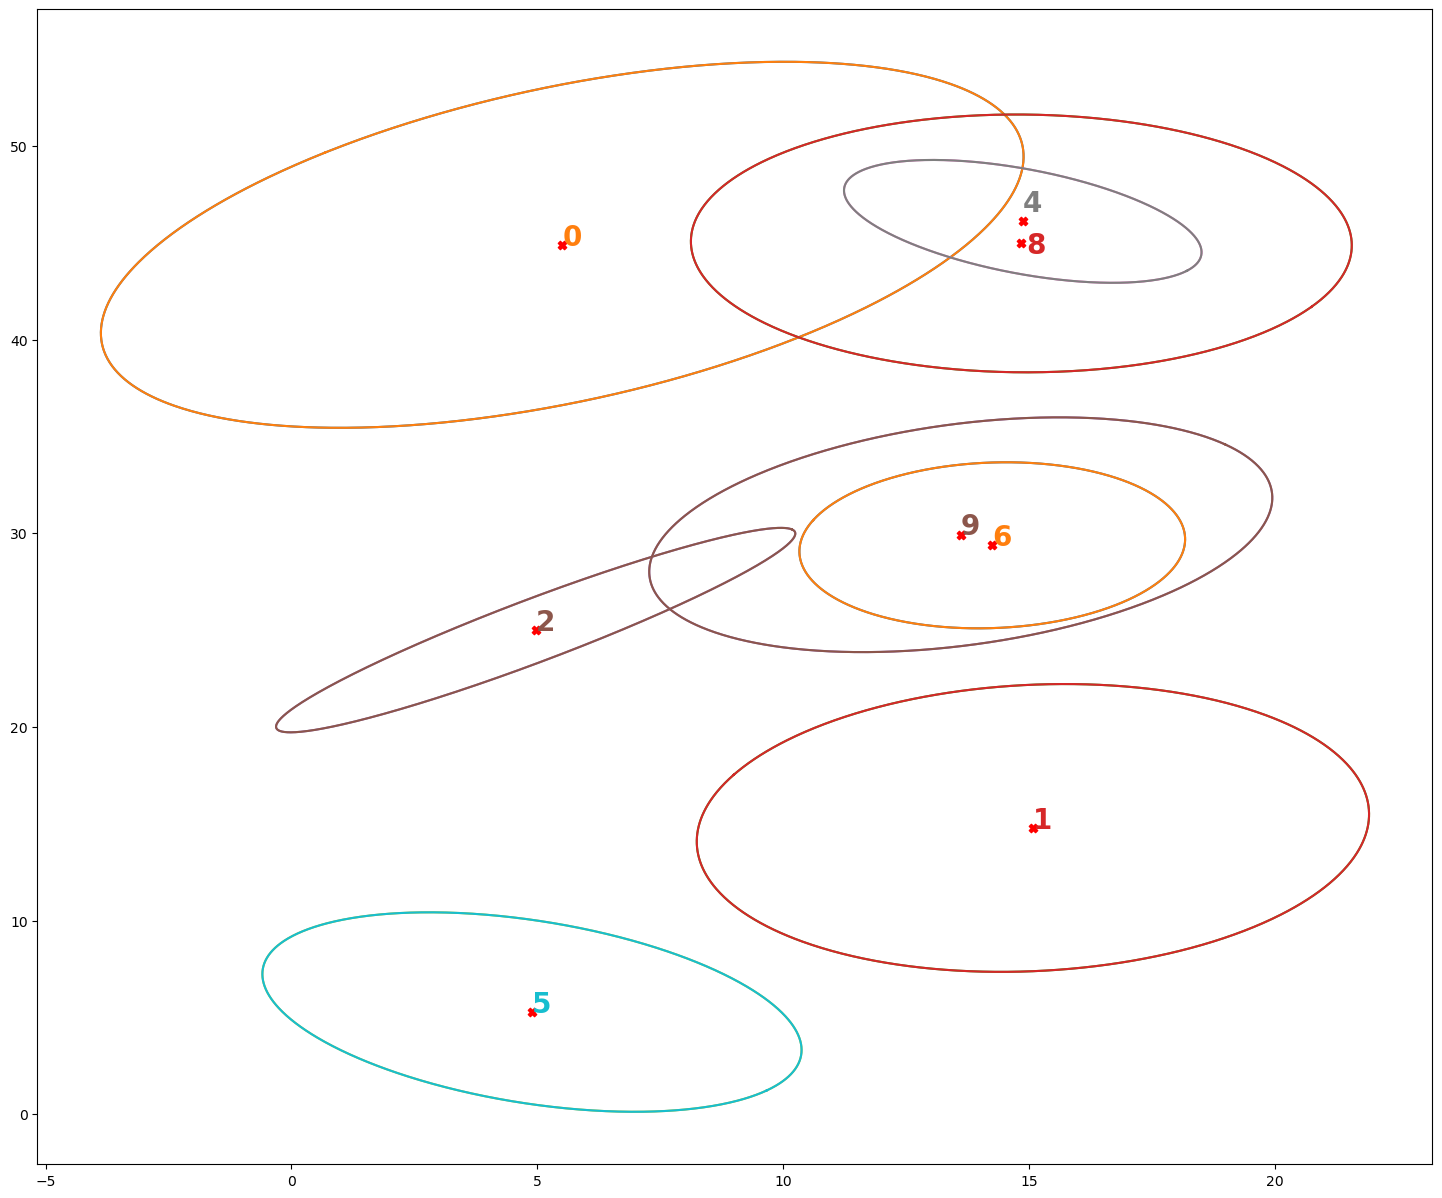

In [3760]:
# ploting ellipse function
plt.rcParams["figure.figsize"] = (18,15)

for i in cluster_df.index:
    
    #There is no cluster data
    
    cov = np.array(cluster_df['Covariance'].loc[i])
    val, rot = np.linalg.eig(cov)
    val = np.sqrt(val)
    center = np.array(cluster_df['Centers'].loc[i])
    center = center.reshape(2,1)
    plt.scatter(center[0], center[1], c='red', marker='X', label='Center')
    t = np.linspace(0, 2.0 * np.pi, 1000)
    xy = np.stack((np.cos(t), np.sin(t)), axis=-1)
    scaling_factor = np.sqrt(5.991)  # For a 2D ellipse and 95% confidence
    plt.plot(*(rot @ (scaling_factor* val * xy).T + center))
    plot_handle, = plt.plot(*(rot @ (scaling_factor * val * xy).T + center))  # Get handle
    
    # Extract the color used by `plt.plot()`
    ellipse_color = plot_handle.get_color()  
    if(i==4):
        center[1]+=0.5
    if(i==8):
        center[0]+=0.1
        center[1]-=0.5
    plt.annotate(i, xy=center, size=20, color=ellipse_color, weight='bold')

In [3761]:
an_compression

Coordinatex  Coordinatey  Cluster Indices:10  M_Distance Clusters:10  \
0     20.015346     7.339478                 1.0                   3.155   
1      9.703454    49.347729                 8.0                   2.429   
2     10.121096    48.753501                 8.0                   2.176   
3     20.240895    40.046939                 8.0                   2.654   
4     -1.464076    11.217717                 5.0                   3.408   
5      0.000000    30.020000                 9.0                   5.555   
6      4.147241    21.852887                 2.0                   3.356   
7     11.214690    51.904209                 8.0                   2.838   
8     20.519285    37.324262                 8.0                   3.465   
9      4.200000    30.000000                 2.0                   8.071   
10     6.447504    17.360731                 9.0                   5.220   
11     9.524159    50.328105                 8.0                   2.720   
12    22.050000    35.100000                 8.0                   4.444   
13    21.018051    40.022647                 8.0                   2.873   
14     7.017290    51.625608                 8.0                   3.703   
15     3.000000    29.700000                 2.0                   9.280   
16    16.000000    22.000000                 1.0                   2.870   
17    19.812102     7.849614                 1.0                   2.963   
18    22.079957    39.508255                 8.0                   3.290   
19    21.152184    38.400523                 8.0                   3.308   
20     6.753671    48.412274                 8.0                   3.175   
21     6.558456    49.614795                 8.0                   3.425   
22     3.517828    49.965774                 8.0                   4.474   
23    18.200000     0.600000                 5.0                   5.940   
24     7.204310    52.231803                 8.0                   3.800   
25    -0.639534    20.849195                 2.0                   3.060   
26    23.490568     6.587037                 1.0                   4.210   
27     7.061582    52.501997                 8.0                   3.905   
28     3.000000    15.000000                 2.0                  11.491   
29    20.000000     7.000000                 NaN                     NaN   
30     9.000000    49.000000                 NaN                     NaN   
31    10.000000    48.000000                 NaN                     NaN   
32    20.000000    40.000000                 NaN                     NaN   
33    -1.000000    11.000000                 NaN                     NaN   
34     0.000000    30.000000                 NaN                     NaN   
35     4.000000    21.000000                 NaN                     NaN   
36    11.000000    51.000000                 NaN                     NaN   
37    20.000000    37.000000                 NaN                     NaN   
38     4.000000    30.000000                 NaN                     NaN   
39     6.000000    17.000000                 NaN                     NaN   
40     9.000000    50.000000                 NaN                     NaN   
41    22.000000    35.000000                 NaN                     NaN   
42    21.000000    40.000000                 NaN                     NaN   
43     7.000000    51.000000                 NaN                     NaN   
44     3.000000    29.000000                 NaN                     NaN   
45    19.000000     7.000000                 NaN                     NaN   
46    22.000000    39.000000                 NaN                     NaN   
47    21.000000    38.000000                 NaN                     NaN   
48     6.000000    48.000000                 NaN                     NaN   
49     6.000000    49.000000                 NaN                     NaN   
50     3.000000    49.000000                 NaN                     NaN   
51    18.000000     0.000000                 NaN    

In [3762]:
# Code for Updating Anomaly Compression table
total_cluster_len =  len(cluster_df)
for x in an_df.index:
    c_index = an_df["Cluster Index"][x]
    df_temp1 = cluster_df["Cluster Index"].apply(lambda x:str(int(c_index)) in x)
    df_temp = cluster_df[df_temp1]
    covariance_matrix = df_temp["Covariance"]
    inverse_cov_matrix = np.linalg.inv(covariance_matrix.values[0])
    cluster_center = df_temp["Centers"]
    
    point = [ int(an_df.loc[x]["Coordinatex"]) , int(an_df.loc[x]["Coordinatey"]) ]
    
    maha_distance = mahalanobis(point, cluster_center.values[0], inverse_cov_matrix)
    
    df_temp3 = an_compression[(an_compression["Coordinatex"] == point[0]) & (an_compression["Coordinatey"] == point[1])]

    if len(df_temp3) != 0:
        # add using at index of an_compression
        index_temp = df_temp3.index.values.astype(int)[0]
        an_compression.at[index_temp , f"Total Clusters:{total_cluster_len}"] = float('%.3f'%(maha_distance))
        an_compression.at[index_temp , f"Cluster Indices:{total_cluster_len}"] = str(df_temp.loc[df_temp.index[0]]["Cluster Index"])
    else:
        # create new anomaly series
        # add series to anomaly compression dataframe
        anomaly = pd.Series({"Coordinatex" : int(an_df.loc[x]["Coordinatex"]) ,"Coordinatey" : int(an_df.loc[x]["Coordinatey"]) ,f"Cluster Indices:{total_cluster_len}": df_temp.loc[df_temp.index[0]]["Cluster Index"], f"M_Distance Clusters:{total_cluster_len}" : float('%.3f'%(maha_distance))})
        an_compression = an_compression.append(anomaly,ignore_index = True)

In [3763]:
#Functions

def calculate_entropy_after_merge(cluster1, cluster2):
    # mreged covariance of two different data window
    n1 = cluster_df["Counts"].loc[cluster1]
    n2 = cluster_df["Counts"].loc[cluster2]
    m1 = cluster_df["Centers"].loc[cluster1]
    m2 = cluster_df["Centers"].loc[cluster2]
    covariance1 = cluster_df["Covariance"].loc[cluster1]
    covariance2 = cluster_df["Covariance"].loc[cluster2]
    n=n1+n2
    m = (n1*np.array(m1) + n2*np.array(m2)) / n

    merged_cov = (n1*np.array(covariance1) + n2*np.array(covariance2) + n1 * np.dot(np.transpose(m1-m) , (m1-m)) + n2 * np.dot(np.transpose(m2-m),(m2-m))) / n
    # Calculate the determinant of the covariance matrix
    covariance_det = np.linalg.det(merged_cov)
    # Calculate the entropy
    merged_entropy =  0.5 * (len(merged_cov)) * np.log2(2 * np.pi * np.exp(1)) + np.log2(abs(covariance_det))
    return merged_entropy, m, merged_cov, n

def merge_clusters():
    global cluster_df
    n_clusters = len(cluster_df) 
    combined_clusters = []
    
    def distance(center1, center2): return math.sqrt(sum((x1 - x2) ** 2 for x1, x2 in zip(center1, center2)))
    
    def find_nearest_clusters(center_index):
        distances = []
        for i in range(89):
            try:
                distances_val = distance(cluster_df["Centers"].loc[center_index], cluster_df["Centers"].loc[i])
                distances.append((distances_val,i))
            except:
                continue
        distances.sort(key=lambda x: x[0])
        return [i for _, i in distances[1:5]]
    
    merged_centers = []
    merged_covariance = []
    merged_entropies = []
    merged_cluster_counts = []
    
    nearest_clusters = []
    
    for i in range(n_clusters):
        nearest_clusters = find_nearest_clusters(i)
        
        try:
            current_entropy = cluster_df["Entropy"].loc[i]
        except:
            continue
        best_merge_candidate = None   
        for j in nearest_clusters: # j is index of nearest cluster
            current_entropy2 = cluster_df["Entropy"].loc[j]
            counts_2 = cluster_df["Counts"].loc[j]
            merged_entropy , merged_center, merged_cov, num = calculate_entropy_after_merge(i,j)
            e1 = cluster_df["Entropy"].loc[i]
            e2 = cluster_df["Entropy"].loc[j]
            delta_e1 = ((merged_entropy - e1)/e1)*100
            delta_e2 = ((merged_entropy - e2)/e2) * 100
            #   ((merged_entropy <= current_entropy) and (counts_2 < 100))
                        
            n2 = cluster_df["Counts"].loc[i]
            point = np.array( cluster_df["Centers"].loc[j] )
            center = np.array( cluster_df["Centers"].loc[i] )
            # Calculate the inverse of the covariance matrix
            inv_covariance_matrix = np.linalg.inv(cluster_df["Covariance"].loc[i])
            diff = point - center
            maha_distance = np.sqrt(np.dot(diff.T, np.dot(inv_covariance_matrix, diff)))
            # (mahalonobis distance of cluster center[j] with covariance_matrix[i] < 2 and cluster_counts[j]<100) then merge
            if(maha_distance < 2.5 and n2 < 10):
                #Update cluster_df at ith index 
                #delete row in cluster_df at jth index
                cluster_df.at[i, "Centers"] = merged_center
                cluster_df.at[i, "Counts"] = num
                cluster_df.at[i, "Covariance"] = merged_cov
                cluster_df.at[i, "Entropy"] = merged_entropy
                print("Second Criteria Merged...!")
                print(i, end=" ")
                print(j)
                best_merge_candidate = j
                cluster_df.at[i , "Cluster Index"].extend(cluster_df.at[j , "Cluster Index"]) # append j to i th index
                #delete row at jth index
                cluster_df = cluster_df.drop(j)
                continue
                #  or(delta_e2<5 and n2 < 5)
            if ((merged_entropy <= current_entropy) and (merged_entropy <= current_entropy2))or(delta_e1 < 20 and delta_e2 < 15):
                #Update cluster_df at ith index 
                #delete row in cluster_df at jth index
                cluster_df.at[i, "Centers"] = merged_center
                cluster_df.at[i, "Counts"] = num
                cluster_df.at[i, "Covariance"] = merged_cov
                cluster_df.at[i, "Entropy"] = merged_entropy
                print("Frist Criteria Merged...!")
                print(i, end=" ")
                print(j)
                best_merge_candidate = j
                cluster_df.at[i , "Cluster Index"].extend(cluster_df.at[j , "Cluster Index"]) # append j to i th index
                #delete row at jth index
                cluster_df = cluster_df.drop(j)
                
                continue   

           
            
# cluster_centers = cluster_centers[]  
# cluster_entropies = cluster_entropies2[]
import math

In [3764]:
merge_clusters()

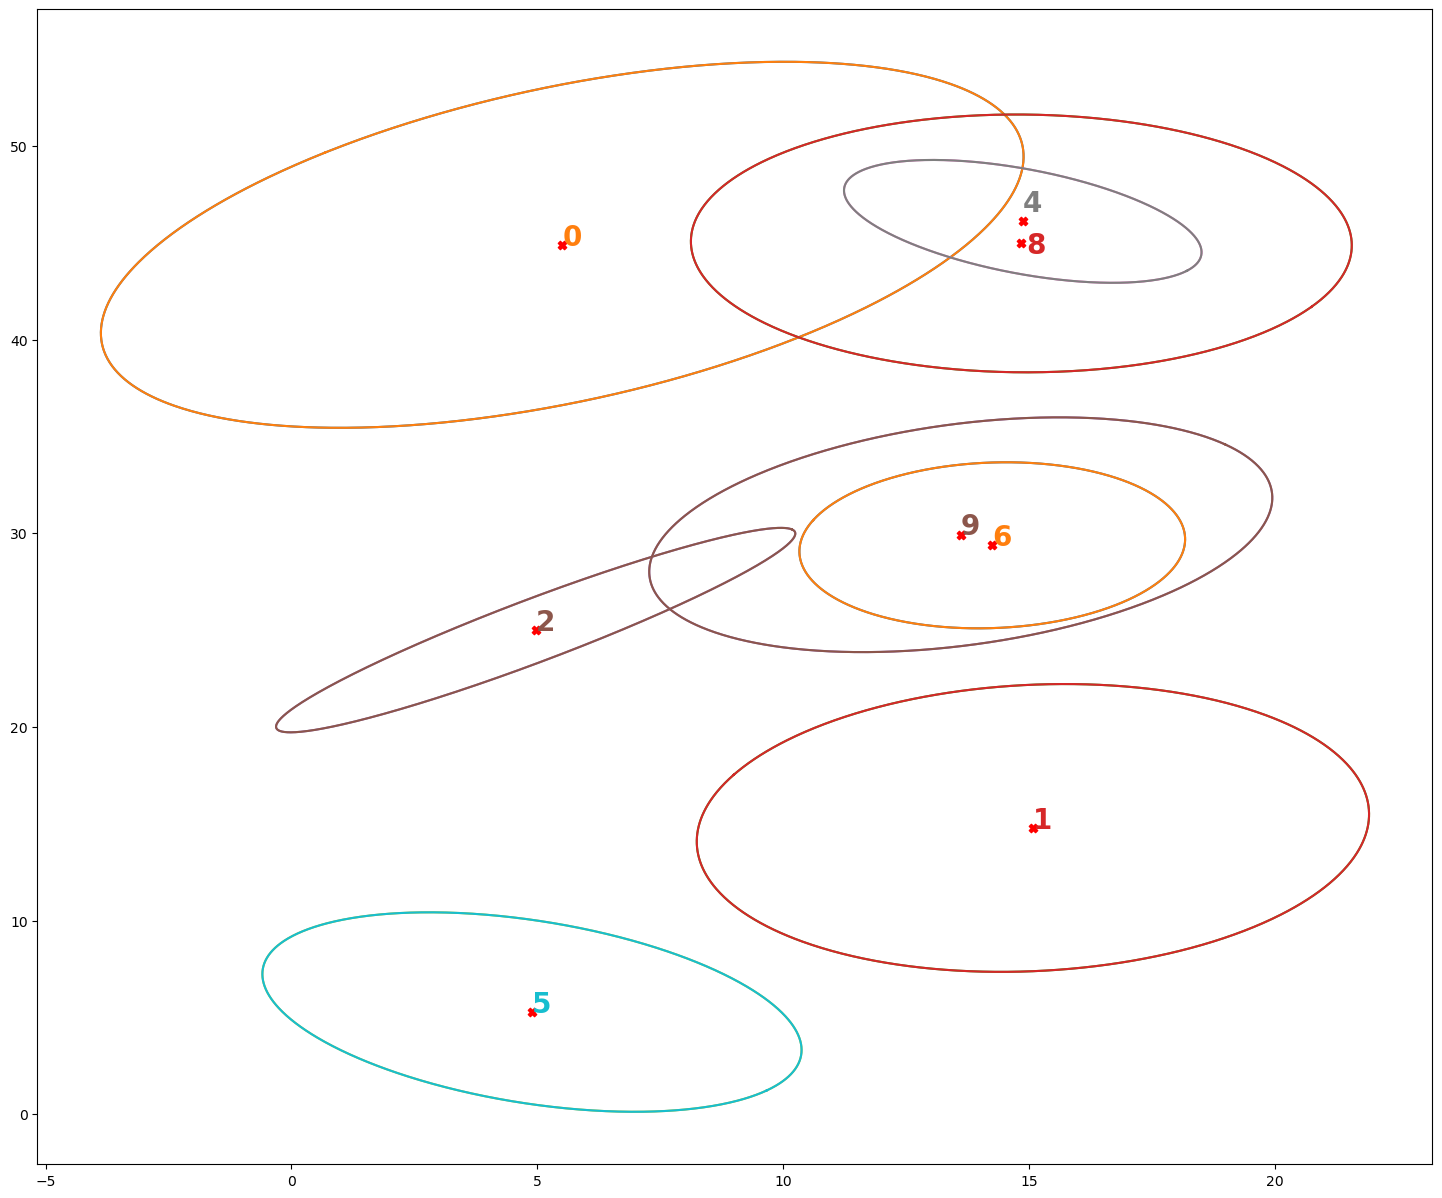

In [3765]:
# ploting ellipse function
plt.rcParams["figure.figsize"] = (18,15)

for i in cluster_df.index:
    
    #There is no cluster data
    
    cov = np.array(cluster_df['Covariance'].loc[i])
    val, rot = np.linalg.eig(cov)
    val = np.sqrt(val)
    center = np.array(cluster_df['Centers'].loc[i])
    center = center.reshape(2,1)
    plt.scatter(center[0], center[1], c='red', marker='X', label='Center')
    t = np.linspace(0, 2.0 * np.pi, 1000)
    xy = np.stack((np.cos(t), np.sin(t)), axis=-1)
    scaling_factor = np.sqrt(5.991)  # For a 2D ellipse and 95% confidence
    plt.plot(*(rot @ (scaling_factor* val * xy).T + center))
    plot_handle, = plt.plot(*(rot @ (scaling_factor * val * xy).T + center))  # Get handle
    
    # Extract the color used by `plt.plot()`
    ellipse_color = plot_handle.get_color()  
    if(i==4):
        center[1]+=0.5
    if(i==8):
        center[0]+=0.1
        center[1]-=0.5
    plt.annotate(i, xy=center, size=20, color=ellipse_color, weight='bold')

In [3766]:
# Code for Updating Anomaly Compression table
total_cluster_len =  len(cluster_df)
for x in an_df.index:
    c_index = an_df["Cluster Index"][x]
    df_temp1 = cluster_df["Cluster Index"].apply(lambda x:str(int(c_index)) in x)
    df_temp = cluster_df[df_temp1]
    covariance_matrix = df_temp["Covariance"]
    inverse_cov_matrix = np.linalg.inv(covariance_matrix.values[0])
    cluster_center = df_temp["Centers"]
    
    point = [ int(an_df.loc[x]["Coordinatex"]) , int(an_df.loc[x]["Coordinatey"]) ]
    
    maha_distance = mahalanobis(point, cluster_center.values[0], inverse_cov_matrix)
    
    df_temp3 = an_compression[(an_compression["Coordinatex"] == point[0]) & (an_compression["Coordinatey"] == point[1])]

    if len(df_temp3) != 0:
        # add using at index of an_compression
        index_temp = df_temp3.index.values.astype(int)[0]
        an_compression.at[index_temp , f"Total Clusters:{total_cluster_len}"] = float('%.3f'%(maha_distance))
        an_compression.at[index_temp , f"Cluster Indices:{total_cluster_len}"] = str(df_temp.loc[df_temp.index[0]]["Cluster Index"])
    else:
        # create new anomaly series
        # add series to anomaly compression dataframe
        anomaly = pd.Series({"Coordinatex" : int(an_df.loc[x]["Coordinatex"]) ,"Coordinatey" : int(an_df.loc[x]["Coordinatey"]) ,f"Cluster Indices:{total_cluster_len}": df_temp.loc[df_temp.index[0]]["Cluster Index"], f"M_Distance Clusters:{total_cluster_len}" : float('%.3f'%(maha_distance))})
        an_compression = an_compression.append(anomaly,ignore_index = True)

In [3767]:
#Functions

def calculate_entropy_after_merge(cluster1, cluster2):
    # mreged covariance of two different data window
    n1 = cluster_df["Counts"].loc[cluster1]
    n2 = cluster_df["Counts"].loc[cluster2]
    m1 = cluster_df["Centers"].loc[cluster1]
    m2 = cluster_df["Centers"].loc[cluster2]
    covariance1 = cluster_df["Covariance"].loc[cluster1]
    covariance2 = cluster_df["Covariance"].loc[cluster2]
    n=n1+n2
    m = (n1*np.array(m1) + n2*np.array(m2)) / n

    merged_cov = (n1*np.array(covariance1) + n2*np.array(covariance2) + n1 * np.dot(np.transpose(m1-m) , (m1-m)) + n2 * np.dot(np.transpose(m2-m),(m2-m))) / n
    # Calculate the determinant of the covariance matrix
    covariance_det = np.linalg.det(merged_cov)
    # Calculate the entropy
    merged_entropy =  0.5 * (len(merged_cov)) * np.log2(2 * np.pi * np.exp(1)) + np.log2(abs(covariance_det))
    return merged_entropy, m, merged_cov, n

def merge_clusters():
    global cluster_df
    n_clusters = len(cluster_df) 
    combined_clusters = []
    
    def distance(center1, center2): return math.sqrt(sum((x1 - x2) ** 2 for x1, x2 in zip(center1, center2)))
    
    def find_nearest_clusters(center_index):
        distances = []
        for i in range(89):
            try:
                distances_val = distance(cluster_df["Centers"].loc[center_index], cluster_df["Centers"].loc[i])
                distances.append((distances_val,i))
            except:
                continue
        distances.sort(key=lambda x: x[0])
        return [i for _, i in distances[1:5]]
    
    merged_centers = []
    merged_covariance = []
    merged_entropies = []
    merged_cluster_counts = []
    
    nearest_clusters = []
    
    for i in range(n_clusters):
        nearest_clusters = find_nearest_clusters(i)
        
        try:
            current_entropy = cluster_df["Entropy"].loc[i]
        except:
            continue
        best_merge_candidate = None   
        for j in nearest_clusters: # j is index of nearest cluster
            current_entropy2 = cluster_df["Entropy"].loc[j]
            counts_2 = cluster_df["Counts"].loc[j]
            merged_entropy , merged_center, merged_cov, num = calculate_entropy_after_merge(i,j)
            e1 = cluster_df["Entropy"].loc[i]
            e2 = cluster_df["Entropy"].loc[j]
            delta_e1 = ((merged_entropy - e1)/e1)*100
            delta_e2 = ((merged_entropy - e2)/e2) * 100
            #   ((merged_entropy <= current_entropy) and (counts_2 < 100))
                        
            n2 = cluster_df["Counts"].loc[i]
            point = np.array( cluster_df["Centers"].loc[j] )
            center = np.array( cluster_df["Centers"].loc[i] )
            # Calculate the inverse of the covariance matrix
            inv_covariance_matrix = np.linalg.inv(cluster_df["Covariance"].loc[i])
            diff = point - center
            maha_distance = np.sqrt(np.dot(diff.T, np.dot(inv_covariance_matrix, diff)))
            # (mahalonobis distance of cluster center[j] with covariance_matrix[i] < 2 and cluster_counts[j]<100) then merge
            if ((merged_entropy <= current_entropy) and (merged_entropy <= current_entropy2))or(delta_e1 < 30 and delta_e2 < 20):
                #Update cluster_df at ith index 
                #delete row in cluster_df at jth index
                cluster_df.at[i, "Centers"] = merged_center
                cluster_df.at[i, "Counts"] = num
                cluster_df.at[i, "Covariance"] = merged_cov
                cluster_df.at[i, "Entropy"] = merged_entropy
                print("Frist Criteria Merged...!")
                print(i, end=" ")
                print(j)
                best_merge_candidate = j
                cluster_df.at[i , "Cluster Index"].extend(cluster_df.at[j , "Cluster Index"]) # append j to i th index
                #delete row at jth index
                cluster_df = cluster_df.drop(j)
                
                continue   

# cluster_centers = cluster_centers[]  
# cluster_entropies = cluster_entropies2[]
import math

In [3768]:
merge_clusters()

Frist Criteria Merged...!
6 9


In [3769]:
from math import degrees

In [3770]:
clusterx = an_compression["Coordinatex"]
clustery = an_compression["Coordinatey"]

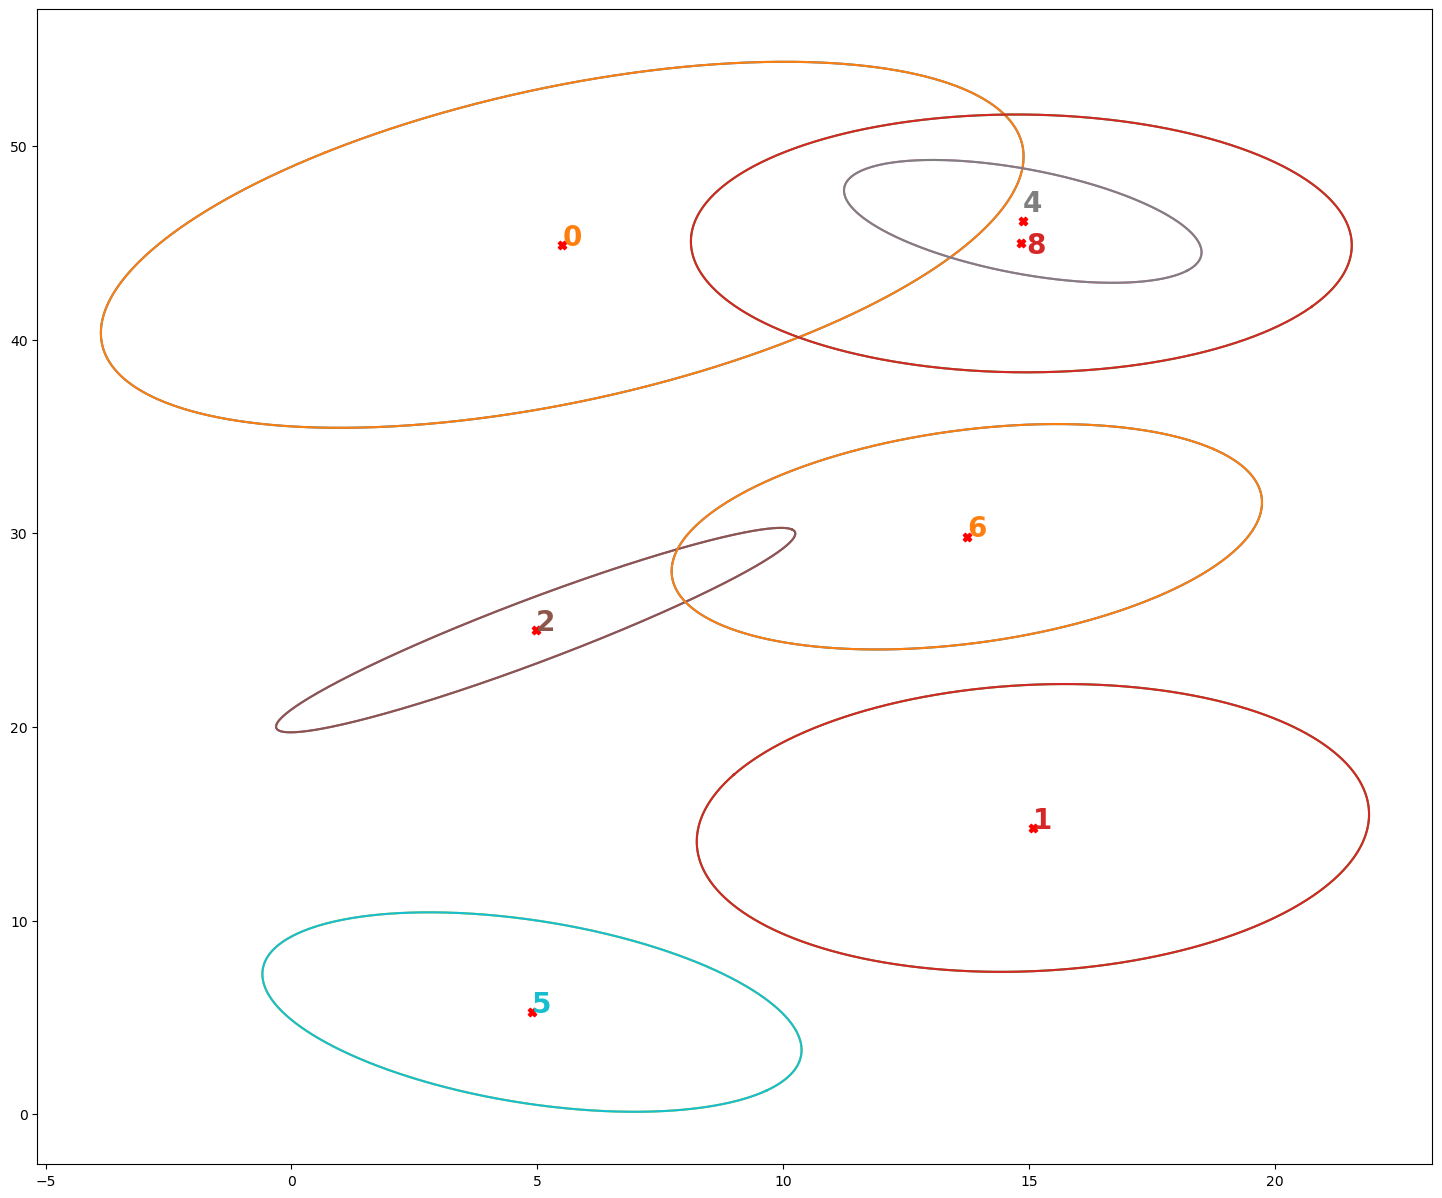

In [3771]:
# ploting ellipse function
plt.rcParams["figure.figsize"] = (18,15)

for i in cluster_df.index:
    #Anomalies
    # plt.scatter(clusterx,clustery,color='#0f0f0f')
    
    #There is no cluster data
    
    cov = np.array(cluster_df['Covariance'].loc[i])
    val, rot = np.linalg.eig(cov)
    val = np.sqrt(val)
    center = np.array(cluster_df['Centers'].loc[i])
    center = center.reshape(2,1)
    plt.scatter(center[0], center[1], c='red', marker='X', label='Center')
    t = np.linspace(0, 2.0 * np.pi, 1000)
    xy = np.stack((np.cos(t), np.sin(t)), axis=-1)
    scaling_factor = np.sqrt(5.991)  # For a 2D ellipse and 95% confidence
    plt.plot(*(rot @ (scaling_factor* val * xy).T + center))
    # plt.annotate(degrees(np.arctan2(rot[1, 0], rot[0, 0])), xy=center)
    # Plot the ellipse and get the color automatically
    plot_handle, = plt.plot(*(rot @ (scaling_factor * val * xy).T + center))  # Get handle
    
    # Extract the color used by `plt.plot()`
    ellipse_color = plot_handle.get_color()  
    if(i==4):
        center[1]+=0.5
    if(i==8):
        center[0]+=0.1
        center[1]-=0.5
    plt.annotate(i, xy=center, size=20, color=ellipse_color, weight='bold')

In [3772]:
an_compression

Coordinatex  Coordinatey  Cluster Indices:10  M_Distance Clusters:10  \
0     20.015346     7.339478                 1.0                   3.155   
1      9.703454    49.347729                 8.0                   2.429   
2     10.121096    48.753501                 8.0                   2.176   
3     20.240895    40.046939                 8.0                   2.654   
4     -1.464076    11.217717                 5.0                   3.408   
5      0.000000    30.020000                 9.0                   5.555   
6      4.147241    21.852887                 2.0                   3.356   
7     11.214690    51.904209                 8.0                   2.838   
8     20.519285    37.324262                 8.0                   3.465   
9      4.200000    30.000000                 2.0                   8.071   
10     6.447504    17.360731                 9.0                   5.220   
11     9.524159    50.328105                 8.0                   2.720   
12    22.050000    35.100000                 8.0                   4.444   
13    21.018051    40.022647                 8.0                   2.873   
14     7.017290    51.625608                 8.0                   3.703   
15     3.000000    29.700000                 2.0                   9.280   
16    16.000000    22.000000                 1.0                   2.870   
17    19.812102     7.849614                 1.0                   2.963   
18    22.079957    39.508255                 8.0                   3.290   
19    21.152184    38.400523                 8.0                   3.308   
20     6.753671    48.412274                 8.0                   3.175   
21     6.558456    49.614795                 8.0                   3.425   
22     3.517828    49.965774                 8.0                   4.474   
23    18.200000     0.600000                 5.0                   5.940   
24     7.204310    52.231803                 8.0                   3.800   
25    -0.639534    20.849195                 2.0                   3.060   
26    23.490568     6.587037                 1.0                   4.210   
27     7.061582    52.501997                 8.0                   3.905   
28     3.000000    15.000000                 2.0                  11.491   
29    20.000000     7.000000                 NaN                     NaN   
30     9.000000    49.000000                 NaN                     NaN   
31    10.000000    48.000000                 NaN                     NaN   
32    20.000000    40.000000                 NaN                     NaN   
33    -1.000000    11.000000                 NaN                     NaN   
34     0.000000    30.000000                 NaN                     NaN   
35     4.000000    21.000000                 NaN                     NaN   
36    11.000000    51.000000                 NaN                     NaN   
37    20.000000    37.000000                 NaN                     NaN   
38     4.000000    30.000000                 NaN                     NaN   
39     6.000000    17.000000                 NaN                     NaN   
40     9.000000    50.000000                 NaN                     NaN   
41    22.000000    35.000000                 NaN                     NaN   
42    21.000000    40.000000                 NaN                     NaN   
43     7.000000    51.000000                 NaN                     NaN   
44     3.000000    29.000000                 NaN                     NaN   
45    19.000000     7.000000                 NaN                     NaN   
46    22.000000    39.000000                 NaN                     NaN   
47    21.000000    38.000000                 NaN                     NaN   
48     6.000000    48.000000                 NaN                     NaN   
49     6.000000    49.000000                 NaN                     NaN   
50     3.000000    49.000000                 NaN                     NaN   
51    18.000000     0.000000                 NaN    

In [3773]:
an_compression

Coordinatex  Coordinatey  Cluster Indices:10  M_Distance Clusters:10  \
0     20.015346     7.339478                 1.0                   3.155   
1      9.703454    49.347729                 8.0                   2.429   
2     10.121096    48.753501                 8.0                   2.176   
3     20.240895    40.046939                 8.0                   2.654   
4     -1.464076    11.217717                 5.0                   3.408   
5      0.000000    30.020000                 9.0                   5.555   
6      4.147241    21.852887                 2.0                   3.356   
7     11.214690    51.904209                 8.0                   2.838   
8     20.519285    37.324262                 8.0                   3.465   
9      4.200000    30.000000                 2.0                   8.071   
10     6.447504    17.360731                 9.0                   5.220   
11     9.524159    50.328105                 8.0                   2.720   
12    22.050000    35.100000                 8.0                   4.444   
13    21.018051    40.022647                 8.0                   2.873   
14     7.017290    51.625608                 8.0                   3.703   
15     3.000000    29.700000                 2.0                   9.280   
16    16.000000    22.000000                 1.0                   2.870   
17    19.812102     7.849614                 1.0                   2.963   
18    22.079957    39.508255                 8.0                   3.290   
19    21.152184    38.400523                 8.0                   3.308   
20     6.753671    48.412274                 8.0                   3.175   
21     6.558456    49.614795                 8.0                   3.425   
22     3.517828    49.965774                 8.0                   4.474   
23    18.200000     0.600000                 5.0                   5.940   
24     7.204310    52.231803                 8.0                   3.800   
25    -0.639534    20.849195                 2.0                   3.060   
26    23.490568     6.587037                 1.0                   4.210   
27     7.061582    52.501997                 8.0                   3.905   
28     3.000000    15.000000                 2.0                  11.491   
29    20.000000     7.000000                 NaN                     NaN   
30     9.000000    49.000000                 NaN                     NaN   
31    10.000000    48.000000                 NaN                     NaN   
32    20.000000    40.000000                 NaN                     NaN   
33    -1.000000    11.000000                 NaN                     NaN   
34     0.000000    30.000000                 NaN                     NaN   
35     4.000000    21.000000                 NaN                     NaN   
36    11.000000    51.000000                 NaN                     NaN   
37    20.000000    37.000000                 NaN                     NaN   
38     4.000000    30.000000                 NaN                     NaN   
39     6.000000    17.000000                 NaN                     NaN   
40     9.000000    50.000000                 NaN                     NaN   
41    22.000000    35.000000                 NaN                     NaN   
42    21.000000    40.000000                 NaN                     NaN   
43     7.000000    51.000000                 NaN                     NaN   
44     3.000000    29.000000                 NaN                     NaN   
45    19.000000     7.000000                 NaN                     NaN   
46    22.000000    39.000000                 NaN                     NaN   
47    21.000000    38.000000                 NaN                     NaN   
48     6.000000    48.000000                 NaN                     NaN   
49     6.000000    49.000000                 NaN                     NaN   
50     3.000000    49.000000                 NaN                     NaN   
51    18.000000     0.000000                 NaN    

In [3774]:
an_compression

Coordinatex  Coordinatey  Cluster Indices:10  M_Distance Clusters:10  \
0     20.015346     7.339478                 1.0                   3.155   
1      9.703454    49.347729                 8.0                   2.429   
2     10.121096    48.753501                 8.0                   2.176   
3     20.240895    40.046939                 8.0                   2.654   
4     -1.464076    11.217717                 5.0                   3.408   
5      0.000000    30.020000                 9.0                   5.555   
6      4.147241    21.852887                 2.0                   3.356   
7     11.214690    51.904209                 8.0                   2.838   
8     20.519285    37.324262                 8.0                   3.465   
9      4.200000    30.000000                 2.0                   8.071   
10     6.447504    17.360731                 9.0                   5.220   
11     9.524159    50.328105                 8.0                   2.720   
12    22.050000    35.100000                 8.0                   4.444   
13    21.018051    40.022647                 8.0                   2.873   
14     7.017290    51.625608                 8.0                   3.703   
15     3.000000    29.700000                 2.0                   9.280   
16    16.000000    22.000000                 1.0                   2.870   
17    19.812102     7.849614                 1.0                   2.963   
18    22.079957    39.508255                 8.0                   3.290   
19    21.152184    38.400523                 8.0                   3.308   
20     6.753671    48.412274                 8.0                   3.175   
21     6.558456    49.614795                 8.0                   3.425   
22     3.517828    49.965774                 8.0                   4.474   
23    18.200000     0.600000                 5.0                   5.940   
24     7.204310    52.231803                 8.0                   3.800   
25    -0.639534    20.849195                 2.0                   3.060   
26    23.490568     6.587037                 1.0                   4.210   
27     7.061582    52.501997                 8.0                   3.905   
28     3.000000    15.000000                 2.0                  11.491   
29    20.000000     7.000000                 NaN                     NaN   
30     9.000000    49.000000                 NaN                     NaN   
31    10.000000    48.000000                 NaN                     NaN   
32    20.000000    40.000000                 NaN                     NaN   
33    -1.000000    11.000000                 NaN                     NaN   
34     0.000000    30.000000                 NaN                     NaN   
35     4.000000    21.000000                 NaN                     NaN   
36    11.000000    51.000000                 NaN                     NaN   
37    20.000000    37.000000                 NaN                     NaN   
38     4.000000    30.000000                 NaN                     NaN   
39     6.000000    17.000000                 NaN                     NaN   
40     9.000000    50.000000                 NaN                     NaN   
41    22.000000    35.000000                 NaN                     NaN   
42    21.000000    40.000000                 NaN                     NaN   
43     7.000000    51.000000                 NaN                     NaN   
44     3.000000    29.000000                 NaN                     NaN   
45    19.000000     7.000000                 NaN                     NaN   
46    22.000000    39.000000                 NaN                     NaN   
47    21.000000    38.000000                 NaN                     NaN   
48     6.000000    48.000000                 NaN                     NaN   
49     6.000000    49.000000                 NaN                     NaN   
50     3.000000    49.000000                 NaN                     NaN   
51    18.000000     0.000000                 NaN    

In [3775]:
an_compression.values[:][3:]

array([[20.24089523855905, 40.046938906477024, 8.0, 2.654, nan, nan, nan,
        nan, nan],
       [-1.4640755918800137, 11.217716705172323, 5.0, 3.408, nan, nan,
        nan, nan, nan],
       [0.0, 30.02, 9.0, 5.555, nan, nan, nan, nan, nan],
       [4.147240647852756, 21.85288676775457, 2.0, 3.356, nan, nan, nan,
        nan, nan],
       [11.214690039460002, 51.90420857016623, 8.0, 2.838, nan, nan, nan,
        nan, nan],
       [20.51928525871285, 37.32426225262073, 8.0, 3.465, nan, nan, nan,
        nan, nan],
       [4.2, 30.0, 2.0, 8.071, nan, nan, nan, nan, nan],
       [6.447504131887701, 17.360731009351465, 9.0, 5.22, nan, nan, nan,
        nan, nan],
       [9.524158557296264, 50.328104638375486, 8.0, 2.72, nan, nan, nan,
        nan, nan],
       [22.05, 35.1, 8.0, 4.444, nan, nan, nan, nan, nan],
       [21.018051062166457, 40.02264657591962, 8.0, 2.873, nan, nan, nan,
        nan, nan],
       [7.017290243434317, 51.62560840587737, 8.0, 3.703, nan, nan, nan,
        nan

ValueError: x and y must have same first dimension, but have shapes (17,) and (6,)

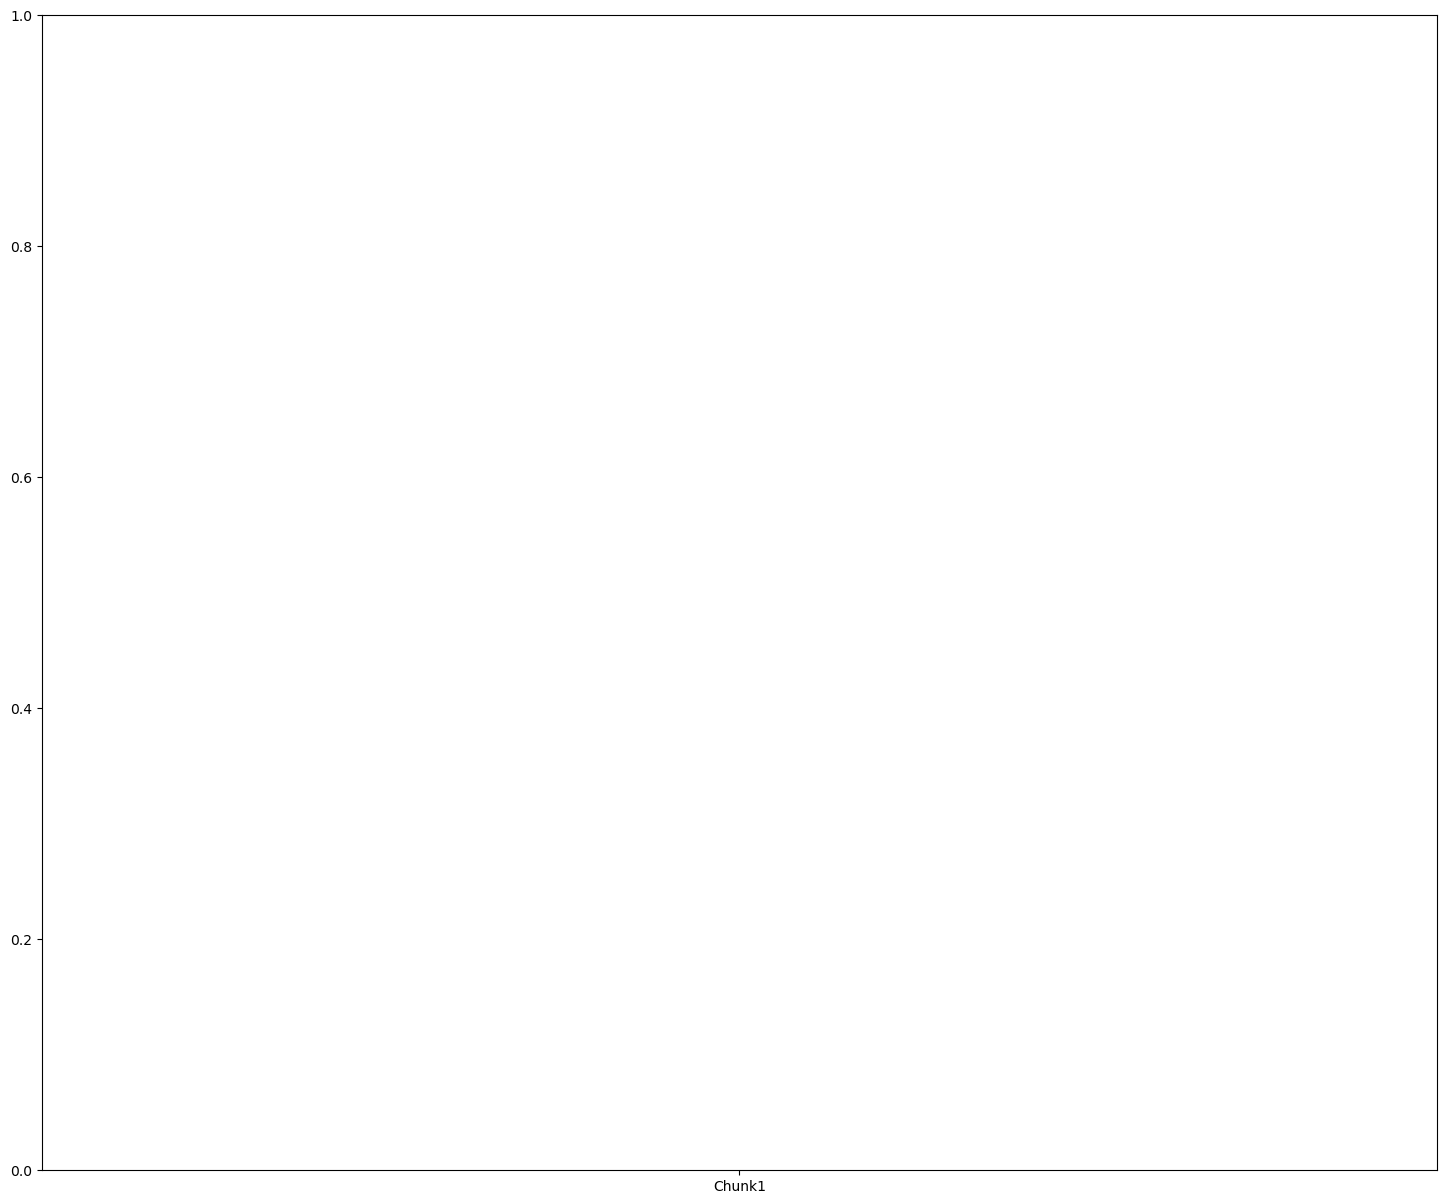

In [3776]:
plt.plot(cols_data, an_compression.values[0][3:], marker='o', linestyle='-', color='purple', label='Anomaly Index 0')

In [ ]:
cols_data = an_compression.columns[3:].to_list()
print(cols_data)

In [ ]:
print(an_compression.values[12][3:])

In [ ]:
# cols_data2 = ['M_Distance Clusters:20','M_Distance Clusters:16', 'M_Distance Clusters:12', 'M_Distance Clusters:9']
# an_compression2 = [None]*3
# an_compression2[0] = [3.7, 2.5, 2.4, 2.3]
# an_compression2[1] = [4.5, 3.8, 3.7, 3.1]
# an_compression2[2] = [3.3, 3.5, 3.6, 3.5]

In [ ]:
# # Create a line chart with time series data
# #row_data = an_df.values[0][2:-2]
# cols_data = an_compression.columns[3:].to_list()

# plt.figure(figsize=(15,10))

# plt.xticks(rotation='vertical')
# plt.plot(cols_data2, an_compression2[2], marker='o', linestyle='-', color='purple', label='Anomaly Index 3')
# plt.plot(cols_data2, an_compression2[0], marker='o', linestyle='-', color='#00FF00', label='Anomaly Index 8')
# plt.plot(cols_data2, an_compression2[1], marker='o', linestyle='-', color='blue', label='Anomaly Index 25')
# #plt.plot(cols_data, an_compression.values[36][3:], marker='o', linestyle='-', color='red', label='Anomaly Index 36')
# # plt.plot(cols_data, an_compression.values[45][3:], marker='o', linestyle='-', color='black', label='Anomaly Index 45')
# # plt.plot(cols_data, an_compression.values[33][3:], marker='o', linestyle='-', color='chocolate', label='Anomaly Index 33')
# # plt.plot(cols_data, an_compression.values[22][3:], marker='o', linestyle='-', color='peru', label='Anomaly Index 22')
# # plt.plot(cols_data, an_compression.values[19][3:], marker='o', linestyle='-', color='c', label='Anomaly Index 19')
# # plt.plot(cols_data, an_compression.values[17][3:], marker='o', linestyle='-', color='maroon', label='Anomaly Index 17')
# # plt.plot(cols_data, an_compression.values[41][3:], marker='o', linestyle='-', color='olive', label='Anomaly Index 41')
# plt.xlabel('Cluster Numbers')
# plt.ylabel('Mahalanobis distance')
# plt.title('Compression Profile')
# plt.legend()
# plt.grid(True)
# plt.savefig('AnomaliesCompressionPhase.jpg')
# plt.show()

In [ ]:
# Create a line chart with time series data
#row_data = an_df.values[0][2:-2]
cols_data = an_compression.columns[3:].to_list()

plt.figure(figsize=(15,10))

plt.xticks(rotation='vertical')
plt.plot(cols_data, an_compression.values[12][3:], marker='o', linestyle='-', color='purple', label='Anomaly Index 3')
plt.plot(cols_data, an_compression.values[10][3:], marker='o', linestyle='-', color='#00FF00', label='Anomaly Index 13')
plt.plot(cols_data, an_compression.values[2][3:], marker='o', linestyle='-', color='blue', label='Anomaly Index 24')
#plt.plot(cols_data, an_compression.values[36][3:], marker='o', linestyle='-', color='red', label='Anomaly Index 36')
# plt.plot(cols_data, an_compression.values[45][3:], marker='o', linestyle='-', color='black', label='Anomaly Index 45')
# plt.plot(cols_data, an_compression.values[33][3:], marker='o', linestyle='-', color='chocolate', label='Anomaly Index 33')
# plt.plot(cols_data, an_compression.values[22][3:], marker='o', linestyle='-', color='peru', label='Anomaly Index 22')
# plt.plot(cols_data, an_compression.values[19][3:], marker='o', linestyle='-', color='c', label='Anomaly Index 19')
# plt.plot(cols_data, an_compression.values[17][3:], marker='o', linestyle='-', color='maroon', label='Anomaly Index 17')
# plt.plot(cols_data, an_compression.values[41][3:], marker='o', linestyle='-', color='olive', label='Anomaly Index 41')
plt.xlabel('Cluster Numbers')
plt.ylabel('Mahalanobis distance')
plt.title('Compression Profile')
plt.legend()
plt.grid(True)
plt.savefig('AnomaliesCompressionPhase.jpg')
plt.show()

In [ ]:
true_cluster_counts

In [ ]:
new_true_counts = np.concatenate([np.full(value, value) for value in true_cluster_counts])

In [ ]:
new_arr = np.concatenate([np.full(value, value) for value in cluster_counts])

In [ ]:
from sklearn.metrics import rand_score
print(rand_score(new_true_counts, new_arr))

In [ ]:
cluster_counts

In [ ]:
y_pred = np.array

In [ ]:
len(new_arr)

In [ ]:
# sklearn_rand_score = rand_score(true_labels, new_arr) # Calculate Rand Score
# print(sklearn_rand_score)

In [ ]:
len(global_cluster_assignment)

In [ ]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import pandas as pd

# Assuming you have your 'an_compression' DataFrame

# Define a function to update the plot based on selected rows
def update_plot(selected_rows):

    selected_data = an_compression.iloc[selected_rows][["M_Distance Clusters:26", "Total Clusters:10", "Total Clusters:9","Total Clusters:6"]]
    selected_data.plot(kind='line', figsize=(12, 6))
    plt.xlabel('Cluster Names')
    plt.ylabel('Values')
    plt.title('Cluster Values')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

# Create a widget for selecting rows
row_selector = widgets.SelectMultiple(
    options=list(range(len(an_compression))),
    description='Select Rows',
    disabled=False
)

# Create an interactive plot
interactive_plot = widgets.interactive(update_plot, selected_rows=row_selector)

# Display the interactive plot
display(interactive_plot)


In [ ]:
# jupyter labextension list

In [ ]:
#!pip uninstall ipywidgets

In [ ]:
# !pip install ipywidgets